In [1]:
import pandas as pd
import os

# Input file path
input_file = "C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/seu_aucell_24hr20c_normalized_matrix_with_gene_names_and_barcodes.csv.gz"

# Extract the input file's directory
input_dir = os.path.dirname(input_file)

# Define output file path to save in the same directory as input file
output_file = os.path.join(input_dir, "TTRUTH_specific_genes_expression_across_all_cells.csv")

# Updated list of genes to extract
genes_to_extract = [
    "COX1", "ND4", "ND1", "ND5", "ATP6", "ND2", "CYTB", "COX3", "COX2", "MBP", "ATP8", 
    "MTATP6P1", "LINC00632", "KIF5A", "MTURN", "SPTBN1", "HIPK2", "DST", "MACF1", "SPTAN1", 
    "SYNE1", "ND3", "ND6", "FTH1", "WNK1", "MAP4", "SRRM2", "ARHGAP21", "MTND2P28", "CHD5", 
    "PLEKHB1", "MAP4K4", "ZEB2", "CIT", "ND4L", "TPT1", "GRIN1", "PTMA", "GOLGB1", "PCLO", 
    "RAPGEF4", "EIF4B", "TULP4", "CTNND2", "PTPN11", "DAAM2", "NCL", "AKT3", "TNIK", "MYH9", 
    "GFAP", "EEF1A1", "FAM107A", "NDRG2", "NCOR2", "BPTF", "CCDC88A"
]

# Initialize an empty list to store filtered chunks
filtered_chunks = []

# Set chunk size
chunk_size = 5000  # Adjust based on available memory

# Process the file in chunks
print("Processing large file in chunks...")
for chunk in pd.read_csv(input_file, index_col=0, chunksize=chunk_size):
    # Filter rows matching the gene list
    filtered_chunk = chunk.loc[chunk.index.intersection(genes_to_extract)]
    if not filtered_chunk.empty:
        filtered_chunks.append(filtered_chunk)

# Combine all filtered chunks
if filtered_chunks:
    final_df = pd.concat(filtered_chunks)
    # Save to output file
    final_df.to_csv(output_file)
    print(f"Extracted genes matrix saved to: {output_file}")
else:
    print("No matching genes were found in the file.")


Processing large file in chunks...
Extracted genes matrix saved to: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024\TTRUTH_specific_genes_updated.csv


In [2]:
### scaling expression of those 50 genes for each gene (row) across all cells (columns) so that a gene with lowest expression get 0 and gene with highest expression get 1 
import pandas as pd
import numpy as np
import os

# Input and output file paths
input_file = "C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/TTRUTH_specific_genes_expression_across_all_cells.csv"
output_file = os.path.join(os.path.dirname(input_file), "TTRUTH_specific_genes_scaled_expression_across_all_cells.csv")

# Define a function to scale values to the range [0, 1]
def scale_row(row):
    min_val = row.min()
    max_val = row.max()
    if max_val - min_val == 0:  # Avoid division by zero for constant rows
        return np.zeros_like(row)
    return (row - min_val) / (max_val - min_val)

# Load the input file
print("Loading the input file...")
df = pd.read_csv(input_file, index_col=0)

# Apply the scaling function to each row (gene)
print("Applying row-wise scaling...")
scaled_df = df.apply(scale_row, axis=1)

# Save the scaled DataFrame to the output file
print("Saving the scaled file...")
scaled_df.to_csv(output_file)

print(f"Row-wise scaled file saved to: {output_file}")

Loading the input file...
Applying row-wise scaling...
Saving the scaled file...
Row-wise scaled file saved to: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024\TTRUTH_specific_genes_scaled_expression_across_all_cells.csv


In [4]:
### sum expression of scaled value to get one value per cells that represent the scaled expression of those 50 genes per cell. 
import pandas as pd
import os

# Input file path (scaled file)
input_file = "C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/TTRUTH_specific_genes_scaled_expression_across_all_cells.csv"

# Define output file path for the sum of selected genes per cell
output_sum_file = os.path.join(os.path.dirname(input_file), "TTRUTH_specific_genes_sum_scaled_expression_across_all_cells.csv")

# Load the scaled input file
print("Loading the scaled input file...")
filtered_df = pd.read_csv(input_file, index_col=0)

# Sum the scaled values of the selected genes for each column (cell)
print("Calculating the sum of scaled values for each cell...")
cell_sums = filtered_df.sum(axis=0)

# Convert the result to a DataFrame for easier handling
cell_sums_df = pd.DataFrame(cell_sums, columns=["Sum_of_Selected_Genes"])

# Save the result to a new CSV file
print("Saving the sum of scaled values per cell...")
cell_sums_df.to_csv(output_sum_file)

print(f"Sum of selected genes for each cell saved to: {output_sum_file}")

Loading the scaled input file...
Calculating the sum of scaled values for each cell...
Saving the sum of scaled values per cell...
Sum of selected genes for each cell saved to: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024\TTRUTH_specific_genes_sum_scaled_expression_across_all_cells.csv


In [4]:
### merging sumed scaled expression value of TTRUTH genes and their umap embeddings and other metadata info in order to be able to plot them on umap or show them using bar plots across multiple cell types
### This step is neccessary for the following step in which I need to plot expression of TTRUTH genes across different cell types at 6h time point and 24 hour time points using bar plot

import pandas as pd
import os

# Base directory
base_dir = "C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/"

# Input file paths
metadata_file = os.path.join(base_dir, "snRNAseq_metadata.csv")
umap_file = os.path.join(base_dir, "snRNAseq_umap_embeddings.csv")
ttruth_sum_file = os.path.join(base_dir, "TTRUTH_specific_genes_sum_scaled_expression_across_all_cells.csv")

# Output file path
output_file = os.path.join(base_dir, "snRNAseq_object_metadata_umap_TTRUTH_genes_sum_scaled_info.csv")

# Load and sort metadata file
print("Loading and sorting metadata file...")
metadata_df = pd.read_csv(metadata_file, index_col=0)
metadata_df = metadata_df.sort_index()  # Sort based on cell barcodes

# Load and sort UMAP embeddings
print("Loading and sorting UMAP embeddings file...")
umap_df = pd.read_csv(umap_file, index_col=0)
umap_df = umap_df.sort_index()  # Sort based on cell barcodes
umap_df.columns = ["umap_1", "umap_2"]  # Rename columns for clarity

# Load and sort TTRUTH-specific gene sums
print("Loading and sorting TTRUTH-specific gene sums file...")
ttruth_df = pd.read_csv(ttruth_sum_file, index_col=0)
ttruth_df = ttruth_df.sort_index()  # Sort based on cell barcodes
ttruth_df.columns = ["TTRUTH_Sum"]

# Ensure all files have the same cell barcodes
print("Identifying common cell barcodes across all files...")
common_cells = (
    metadata_df.index
    .intersection(umap_df.index)
    .intersection(ttruth_df.index)
)

# Filter all DataFrames to keep only common cells
metadata_df = metadata_df.loc[common_cells]
umap_df = umap_df.loc[common_cells]
ttruth_df = ttruth_df.loc[common_cells]

# Merge all DataFrames
print("Merging all files...")
# Start with cell barcodes and selected columns from metadata
merged_df = metadata_df[["orig.ident", "ctd_AIBS_v2_ML1", "PMI"]].copy()
merged_df = merged_df.merge(umap_df, left_index=True, right_index=True, how="inner")
merged_df = merged_df.merge(ttruth_df, left_index=True, right_index=True, how="inner")

# Save the merged output
print("Saving the merged file...")
merged_df.to_csv(output_file)

print(f"Final merged file saved to: {output_file}")



Loading and sorting metadata file...
Loading and sorting UMAP embeddings file...
Loading and sorting TTRUTH-specific gene sums file...
Identifying common cell barcodes across all files...
Merging all files...
Saving the merged file...
Final merged file saved to: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/snRNAseq_object_metadata_umap_TTRUTH_genes_sum_scaled_info.csv


Loading the data...
Unique cell types: ['Astro', 'Endo', 'GABAergic', 'Glutamatergic', 'Micro', 'OPC', 'Oligo']
Bar plot saved to: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024\TTRUTH_AVerage_Expression_6h_PMI_Barplot.png


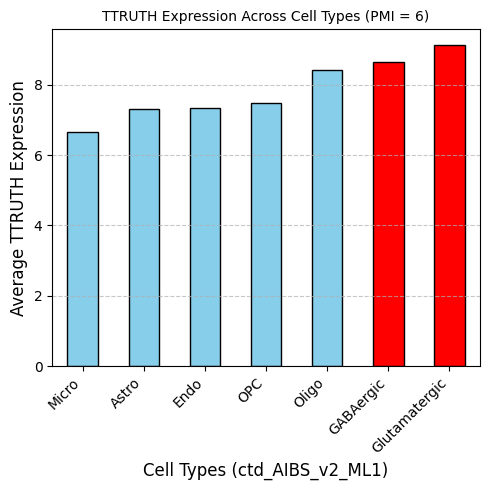

In [31]:
#### Drawing a bar plot for the TTRUTH gene for the PMI = 6. The idea for this plot is to show that at 6 hours at 20 degress Neuronal populations are the main responder 
#### by up regulating the expression of TTRUTH genes. In our prevouso steps by calculating the average expression of top 50 TTRUTH genes and scaling them and normalizing their value
#### to the total number of cells that expression those genes we have effectively negated the impact of cell number on the final results. 

import pandas as pd
import matplotlib.pyplot as plt
import os

# Input file path
input_file = "C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/snRNAseq_object_metadata_umap_TTRUTH_genes_sum_scaled_info.csv"

# Output file path
output_plot_file = os.path.join(
    os.path.dirname(input_file), "TTRUTH_AVerage_Expression_6h_PMI_Barplot.png"
)

# Load the data
print("Loading the data...")
data = pd.read_csv(input_file, index_col=0)

# Filter the data for cells with PMI equal to 6
filtered_data = data[data["PMI"] == 6]

# Group by the cell types in the "ctd_AIBS_v2_ML1" column and calculate the mean of "TTRUTH_Sum"
grouped_data = filtered_data.groupby("ctd_AIBS_v2_ML1")["TTRUTH_Sum"].mean()

# Inspect unique cell types to ensure correct matching
print("Unique cell types:", grouped_data.index.tolist())

# Sort the grouped data
grouped_data_sorted = grouped_data.sort_values()

# Create a color mapping based on the sorted data
colors = [
    "red" if ("GABAergic" in cell_type or "Glutamatergic" in cell_type) else "skyblue"
    for cell_type in grouped_data_sorted.index
]

# Plot the bar chart
plt.figure(figsize=(5, 5))  # Increased size for better readability
grouped_data_sorted.plot(kind="bar", color=colors, edgecolor="black")

# Customize the plot
plt.title("TTRUTH Expression Across Cell Types (PMI = 6)", fontsize=10)
plt.xlabel("Cell Types (ctd_AIBS_v2_ML1)", fontsize=12)
plt.ylabel("Average TTRUTH Expression", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save the plot as a PNG file
plt.tight_layout()
plt.savefig(output_plot_file, dpi=300)  # Increased DPI for better quality
print(f"Bar plot saved to: {output_plot_file}")

# Show the plot
plt.show()

Loading the data...
Unique cell types: ['Astro', 'Endo', 'GABAergic', 'Glutamatergic', 'Micro', 'OPC', 'Oligo']
Bar plot saved to: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024\TTRUTH_AVerage_Expression_24h_PMI_Barplot.png


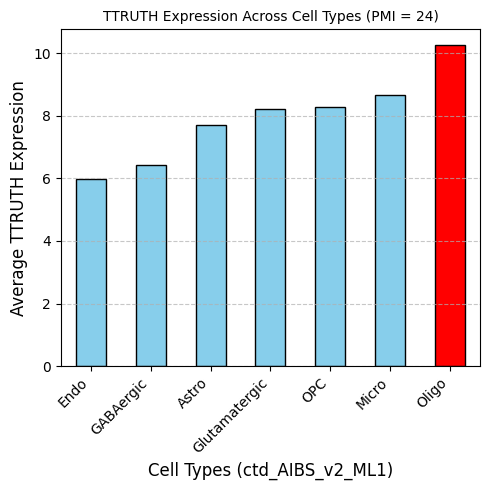

In [30]:
#### Drawing a bar plot for the TTRUTH gene for the PMI = 6. The idea for this plot is to show that at 24 hours at 20 degress Neuronal populations are the main responder 
#### by up regulating the expression of TTRUTH genes. In our prevouso steps by calculating the average expression of top 50 TTRUTH genes and scaling them and normalizing their value
#### to the total number of cells that expression those genes we have effectively negated the impact of cell number on the final results. 

import pandas as pd
import matplotlib.pyplot as plt
import os

# Input file path
input_file = "C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/snRNAseq_object_metadata_umap_TTRUTH_genes_sum_scaled_info.csv"

# Output file path
output_plot_file = os.path.join(
    os.path.dirname(input_file), "TTRUTH_AVerage_Expression_24h_PMI_Barplot.png"
)

# Load the data
print("Loading the data...")
data = pd.read_csv(input_file, index_col=0)

# Filter the data for cells with PMI equal to 6
filtered_data = data[data["PMI"] == 24]

# Group by the cell types in the "ctd_AIBS_v2_ML1" column and calculate the mean of "TTRUTH_Sum"
grouped_data = filtered_data.groupby("ctd_AIBS_v2_ML1")["TTRUTH_Sum"].mean()

# Inspect unique cell types to ensure correct matching
print("Unique cell types:", grouped_data.index.tolist())

# Sort the grouped data
grouped_data_sorted = grouped_data.sort_values()

# Create a color mapping based on the sorted data
colors = [
    "red" if ("Oligo" in cell_type) else "skyblue"
    for cell_type in grouped_data_sorted.index
]

# Plot the bar chart
plt.figure(figsize=(5, 5))  # Increased size for better readability
grouped_data_sorted.plot(kind="bar", color=colors, edgecolor="black")

# Customize the plot
plt.title("TTRUTH Expression Across Cell Types (PMI = 24)", fontsize=10)
plt.xlabel("Cell Types (ctd_AIBS_v2_ML1)", fontsize=12)
plt.ylabel("Average TTRUTH Expression", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save the plot as a PNG file
plt.tight_layout()
plt.savefig(output_plot_file, dpi=300)  # Increased DPI for better quality
print(f"Bar plot saved to: {output_plot_file}")

# Show the plot
plt.show()

Expression Data Shape: (45, 52419)
Expression Data Sample Names: ['CTRL4-36h-4C', 'CTRL5-36h-4C', 'CTRL7-36h-4C', 'CTRL9-36h-4C', 'CTRL12-36h-4C', 'CTRL14-36h-4C', 'CTRL15-36h-4C', 'CTRL16-36h-4C', 'CTRL17-36h-4C', 'CTRL4-24h-4C', 'CTRL5-24h-4C', 'CTRL7-24h-4C', 'CTRL9-24h-4C', 'CTRL12-24h-4C', 'CTRL14-24h-4C', 'CTRL15-24h-4C', 'CTRL16-24h-4C', 'CTRL17-24h-4C', 'CTRL4-6h-20C', 'CTRL5-6h-20C', 'CTRL7-6h-20C', 'CTRL9-6h-20C', 'CTRL12-6h-20C', 'CTRL14-6h-20C', 'CTRL15-6h-20C', 'CTRL16-6h-20C', 'CTRL17-6h-20C', 'CTRL4-6h-4C', 'CTRL5-6h-4C', 'CTRL7-6h-4C', 'CTRL9-6h-4C', 'CTRL12-6h-4C', 'CTRL14-6h-4C', 'CTRL15-6h-4C', 'CTRL16-6h-4C', 'CTRL17-6h-4C', 'CTRL4-0h-80C', 'CTRL5-0h-80C', 'CTRL7-0h-80C', 'CTRL9-0h-80C', 'CTRL12-0h-80C', 'CTRL14-0h-80C', 'CTRL15-0h-80C', 'CTRL16-0h-80C', 'CTRL17-0h-80C']

Metadata Head:
        SampleID   Group   Domain
0   CTRL4-36h-4C  36h_4C  Domain2
1   CTRL5-36h-4C  36h_4C  Domain2
2   CTRL7-36h-4C  36h_4C  Domain2
3   CTRL9-36h-4C  36h_4C  Domain2
4  CTRL12-36

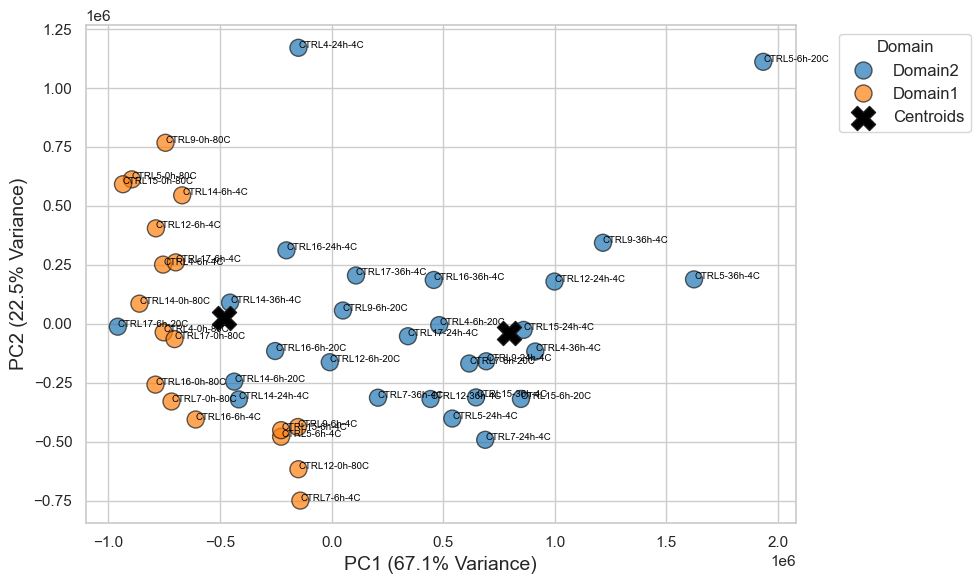

In [41]:
### In the following section I need to perform an analysis to show that there are actually two disticnt domain between the 0h -80c samples and 4h at 6C samples and 6h 20C, 24h 4C and 36h 4C samples.

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import os  # Import the os module to handle directory operations

# ===========================
# Step 1: Load and Prepare Data
# ===========================

# Define file paths
expression_data_path = "C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/Normalized_read_counts_bioposy_samples_24h_36h_RT_removed_figure1B_for_KNN_analysis.csv"
metadata_path = "C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/Normalized_read_counts_bioposy_samples_24h_36h_RT_removed_figure1B_for_KNN_analysis_metadata.csv"

# Load expression data
expression_data = pd.read_csv(expression_data_path)
expression_data.set_index(expression_data.columns[0], inplace=True)
expression_data = expression_data.transpose()

print("Expression Data Shape:", expression_data.shape)
print("Expression Data Sample Names:", expression_data.index.tolist())

# Load metadata
metadata = pd.read_csv(metadata_path)

# Display metadata
print("\nMetadata Head:")
print(metadata.head())

# Ensure there are no duplicate SampleIDs
if metadata['SampleID'].duplicated().any():
    raise ValueError("Duplicate SampleIDs found in metadata. Please ensure each SampleID is unique.")

# Merge Expression Data with Metadata
merged_data = expression_data.merge(metadata, left_index=True, right_on="SampleID")

# Check for any samples in expression data not present in metadata
missing_in_metadata = expression_data.index.difference(metadata['SampleID'])
if not missing_in_metadata.empty:
    print("\nWarning: The following samples are present in the expression data but missing in metadata and will be excluded:")
    print(missing_in_metadata.tolist())
    # Exclude these samples
    merged_data = merged_data[merged_data['SampleID'].isin(metadata['SampleID'])]

print("\nMerged Data Shape:", merged_data.shape)

# ===========================
# Step 2: Perform PCA
# ===========================

# Verify that 'Domain' column exists
if 'Domain' not in merged_data.columns:
    raise ValueError("The metadata file does not contain a 'Domain' column. Please ensure the domain information is correctly labeled.")

# Separate features (gene expression) and drop metadata columns
# Keep 'Domain' for plotting
X = merged_data.drop(['SampleID', 'Group', 'Domain'], axis=1).values

# Initialize PCA to reduce to 2 components for visualization
pca = PCA(n_components=2, random_state=42)
principal_components = pca.fit_transform(X)

# Percentage of variance explained by each component
pca_var_perc = np.round(pca.explained_variance_ratio_ * 100, 1)

# Create a DataFrame with principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Domain'] = merged_data['Domain']
pca_df['SampleID'] = merged_data['SampleID']

print("\nPCA Explained Variance:", pca_var_perc)

# ===========================
# Step 3: Apply K-Means Clustering
# ===========================

# Define the number of clusters (e.g., 2 for two distinct domains)
# You can adjust this number based on your specific analysis needs
num_clusters = 2

# Initialize K-Means with predefined number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit K-Means on PCA-transformed data
kmeans.fit(pca_df[['PC1', 'PC2']])

# Assign cluster labels
pca_df['Cluster'] = kmeans.labels_

print("\nK-Means Cluster Centers (in PCA space):")
print(kmeans.cluster_centers_)

# ===========================
# Step 4: Visualize PCA with Sample Names and Domain Coloring
# ===========================

# Determine the directory of the input file to save the plot there
input_dir = os.path.dirname(expression_data_path)

# Define the filename for the plot
plot_filename = "PCA_Plot_Colored_by_Domain1_and_2.png"

# Combine the directory and filename to get the full save path
save_path = os.path.join(input_dir, plot_filename)

# Adjust figure size here by changing the figsize parameter
plt.figure(figsize=(10, 6))  # Width: 14 inches, Height: 10 inches
sns.set(style="whitegrid")

# Define a distinct color palette for two domains
unique_domains = pca_df['Domain'].unique()
print("\nUnique Domains:", unique_domains)

if len(unique_domains) == 2:
    # Assign vibrant and contrasting colors
    custom_palette = {unique_domains[0]: '#1f77b4', unique_domains[1]: '#ff7f0e'}  # Blue and Orange
else:
    # Extend the palette if more domains are present
    custom_palette = sns.color_palette("hsv", len(unique_domains))
    custom_palette = dict(zip(unique_domains, custom_palette))

# Scatter plot colored by 'Domain'
scatter = sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='Domain',
    palette=custom_palette,
    s=150,
    edgecolor='k',
    alpha=0.7
)

# Plot K-Means cluster centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1],
    s=300, 
    c='black',  # Changed centroid color to black for better visibility
    label='Centroids', 
    marker='X',
    edgecolor='k'
)

# Annotate each point with the sample name without background
for idx, row in pca_df.iterrows():
    plt.text(
        x=row['PC1'] + 0.02, 
        y=row['PC2'] + 0.02, 
        s=row['SampleID'],
        fontdict=dict(color='black', size=7)
        # Removed bbox to eliminate yellow background
    )

plt.xlabel(f'PC1 ({pca_var_perc[0]}% Variance)', fontsize=14)
plt.ylabel(f'PC2 ({pca_var_perc[1]}% Variance)', fontsize=14)
plt.legend(title='Domain', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()

# Save the figure before showing it
plt.savefig(save_path, dpi=300, bbox_inches='tight')  # Save as PNG with 300 DPI resolution

print(f"\nPCA plot saved successfully at: {save_path}")

# Display the plot
plt.show()


File: LPMI_SPMI_vs_CTRL_upreg_genes_correlation_R4Q15.xlsx
  Pearson Correlation Coefficient (r): 0.8310
  p-value: 0.0000e+00

File: LPMI_SPMI_vs_CTRL_downreg_genes_correlation_R4Q15.xlsx
  Pearson Correlation Coefficient (r): 0.7168
  p-value: 1.3182e-155

Scatter plots saved successfully at: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024\R4Q15_Pearson_Correlation_ScatterPlots.png


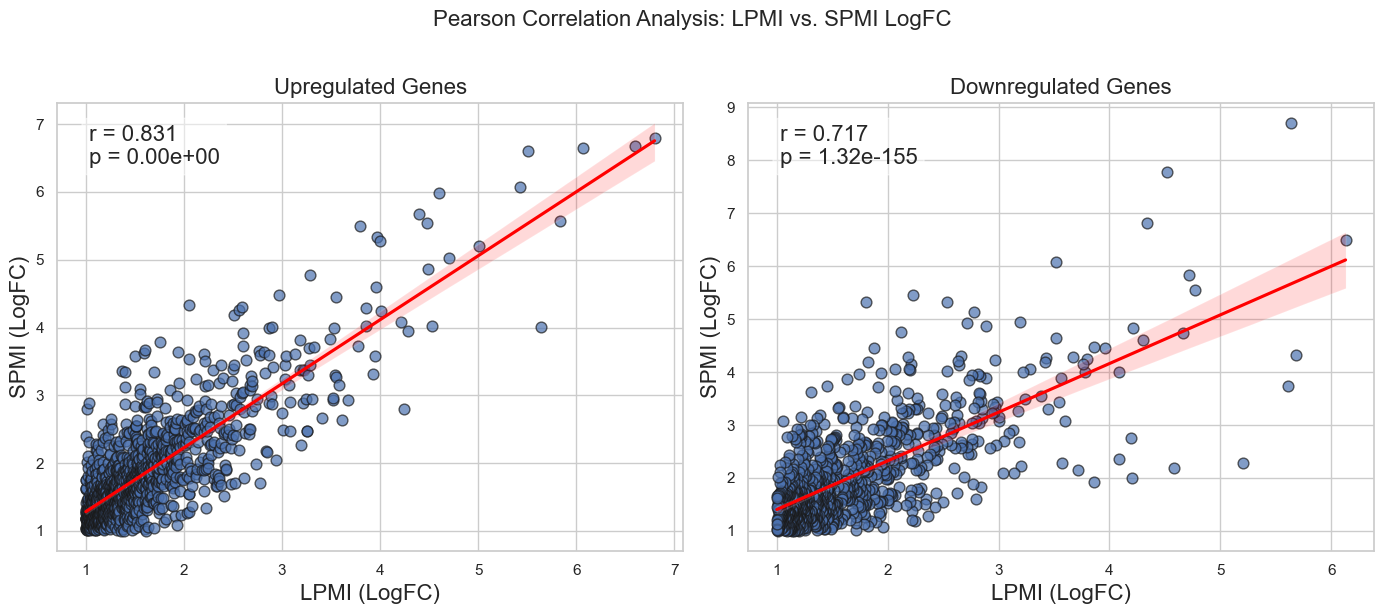

In [51]:
### This section belong to question raised by reviewer 4 question 15 in which the reviewer was asking if 2331 genes that were commonly affected by LPMI and SPMI vs CTRL group have any correlation or not.
### In the main mtext of the manuscript, in the supplementary table 4 we have splitted the gene into genes that were commonly up or down regulated. However, in the following section I will make two Pearson correlation plots
#### to show that those up and down regulated genes are actually correlated between SPMI and LPMI samples


import os
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_correlation_and_plot(excel_file, ax, custom_title=None):
    """
    Reads the given Excel file, extracts the LPMI and SPMI columns,
    computes the Pearson correlation, and creates a scatter plot with a regression line.
    Annotates the plot with the correlation coefficient and p-value.
    
    Parameters:
    - excel_file (str): Path to the Excel file.
    - ax (matplotlib.axes.Axes): The matplotlib axes to plot on.
    - custom_title (str, optional): Custom title for the subplot.
    
    Returns:
    - corr_coef (float): Pearson correlation coefficient.
    - p_value (float): p-value of the correlation.
    """
    # 1. Read the Excel file
    try:
        df = pd.read_excel(excel_file)
    except Exception as e:
        print(f"Error reading {excel_file}: {e}")
        return None, None

    # 2. Verify required columns
    required_columns = ['Gene', 'LPMI', 'SPMI']
    if not all(col in df.columns for col in required_columns):
        print(f"Error: {excel_file} does not contain the required columns: {required_columns}")
        return None, None

    # 3. Extract LPMI and SPMI values
    lpmi = df['LPMI']
    spmi = df['SPMI']

    # 4. Determine if the file is downregulated based on filename
    file_name = os.path.basename(excel_file).lower()
    is_downregulated = 'downreg' in file_name

    if is_downregulated:
        # Take absolute values to ensure positive expressions
        lpmi = lpmi.abs()
        spmi = spmi.abs()

    # 5. Compute Pearson correlation
    corr_coef, p_value = pearsonr(lpmi, spmi)

    # 6. Print correlation results
    print(f"File: {os.path.basename(excel_file)}")
    print(f"  Pearson Correlation Coefficient (r): {corr_coef:.4f}")
    print(f"  p-value: {p_value:.4e}\n")

    # 7. Create scatter plot with regression line
    sns.regplot(x=lpmi, y=spmi, ax=ax, scatter=True, fit_reg=True,
                scatter_kws={'s': 60, 'edgecolor': 'k', 'alpha': 0.7},
                line_kws={'color': 'red'})

    # 8. Set custom plot titles if provided
    if custom_title:
        ax.set_title(custom_title, fontsize=16)
    else:
        ax.set_title(f"{os.path.basename(excel_file)}", fontsize=12)
    
    # 9. Set axis labels
    ax.set_xlabel("LPMI (LogFC)", fontsize=16)
    ax.set_ylabel("SPMI (LogFC)", fontsize=16)

    # 10. Annotate r and p-value on the plot
    ax.text(0.05, 0.95, f"r = {corr_coef:.3f}\np = {p_value:.2e}",
            transform=ax.transAxes,
            fontsize=16,
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

    # 11. Enhance grid for better readability
    ax.grid(True)

    return corr_coef, p_value

def main():
    # Define file paths to your Excel files
    upreg_file = "C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/LPMI_SPMI_vs_CTRL_upreg_genes_correlation_R4Q15.xlsx"
    downreg_file = "C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/LPMI_SPMI_vs_CTRL_downreg_genes_correlation_R4Q15.xlsx"

    # List of files to analyze
    files = [upreg_file, downreg_file]

    # Define custom titles for each plot
    custom_titles = [
        "Upregulated Genes",
        "Downregulated Genes"
    ]

    # Determine the directory to save the plots (same as the input files)
    # Assuming both files are in the same directory
    save_dir = os.path.dirname(upreg_file)

    # Create a figure with two subplots side by side
    fig, axes = plt.subplots(ncols=2, figsize=(14, 6))  # Adjust figsize as needed
    sns.set(style="whitegrid")  # Set seaborn style for better aesthetics

    # Iterate over each file, corresponding axis, and custom title
    for excel_file, ax, title in zip(files, axes, custom_titles):
        analyze_correlation_and_plot(excel_file, ax, custom_title=title)

    # Add an overall figure title
    fig.suptitle("Pearson Correlation Analysis: LPMI vs. SPMI LogFC", fontsize=16, y=1.02)

    # Adjust layout for better spacing, including space for the suptitle
    plt.tight_layout()

    # Define the filename for the combined plot
    plot_filename = "R4Q15_Pearson_Correlation_ScatterPlots.png"
    save_path = os.path.join(save_dir, plot_filename)

    # Save the figure
    plt.savefig(save_path, dpi=300, bbox_inches='tight')  # Save as PNG with 300 DPI resolution
    print(f"Scatter plots saved successfully at: {save_path}")

    # Display the plot
    plt.show()

if __name__ == "__main__":
    main()



=== P-Value Summary Table ===
    Gene   ANOVA_pval  SPMI_vs_LPMI_pval  SPMI_vs_CTRL_pval
    CALY 2.224548e-13             0.9670             0.0000
   CHRM1 5.572042e-13             0.4375             0.0000
   CHRM3 2.102682e-08             0.0648             0.0000
    DRD1 5.525671e-10             0.1847             0.0000
    DRD2 3.598979e-08             0.0002             0.0000
    DRD5 1.655275e-08             0.9377             0.0000
   GNA15 8.782337e-07             0.9993             0.0000
    GNAZ 3.614882e-14             0.4942             0.0000
    GNG2 5.096223e-10             0.0002             0.0000
   GSK3A 2.720025e-14             0.7769             0.0000
    HRH2 1.700022e-11             0.0159             0.0000
   HTR1A 1.193577e-08             0.0004             0.0000
   HTR1B 1.240382e-07             0.6937             0.0000
   HTR1D 5.404025e-09             0.0004             0.0000
   HTR1E 2.257959e-09             0.0585             0.0000
   HTR2A 

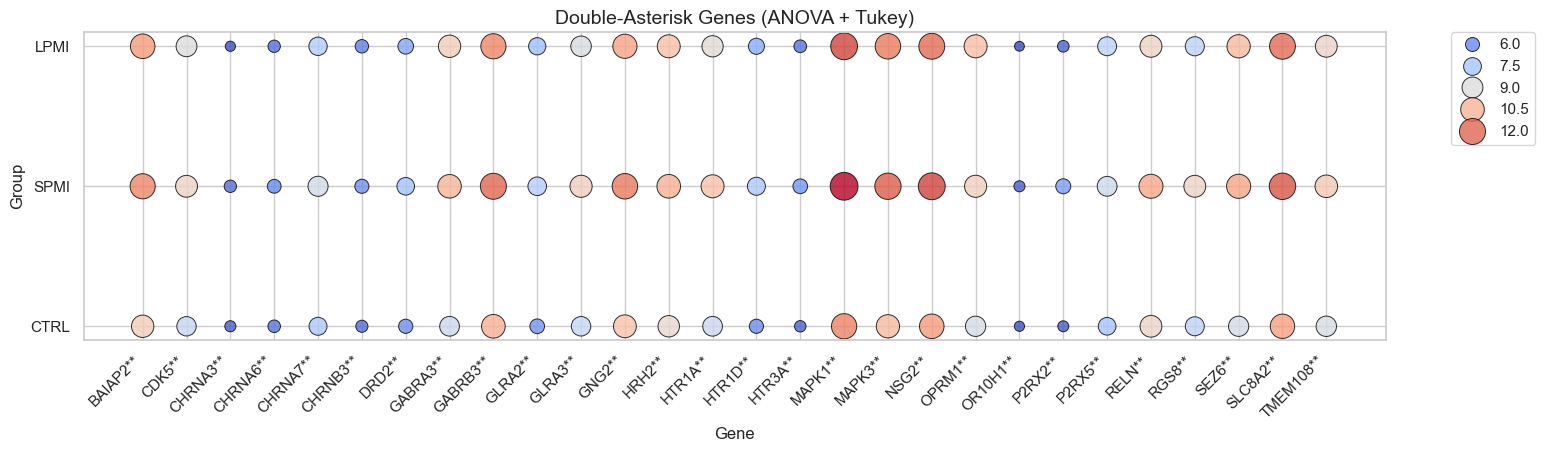

In [54]:
#### This section addresses Question 16 raised by Reviewer 4, who questioned our claim that the SPMI-CTRL difference in gene expression involves the regulation of neuronal components. Thhe feature was not seen in the 
#### LMPI comparison against CTRL.
#### To support this claim, I will provide a dot plot demonstrating that genes associated with neuronal-related terms in Figure 2E, specifically "chemical synaptic transmission, postsynaptic" and "response to dopamine,"
#### exhibit significantly higher expression levels in SPMI samples compared to both LMPI and CTRL samples.
#### In this DotPlot configuration, the circle size corresponds to the average expression value for each gene in a given group. In other words, a larger circle indicates higher expression of that gene in that group, 
#### and a smaller circle indicates lower expression.

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For one-way ANOVA and Tukey's HSD
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def main():
    # Path to your Excel file
    excel_file = (
        "C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/"
        "Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/"
        "LPMI_SPMI_CTRL_DESeq2_normalized_counts_covaraite_considered_annotated.xlsx"
    )

    # Genes of interest
    gene_list = [
        "CALY","CHRM1","CHRM3","DRD1","DRD2","DRD5","GNA15","GNAZ","GNG2","GSK3A",
        "HRH2","HTR1A","HTR1B","HTR1D","HTR1E","HTR2A","HTR3A","HTR3B","HTR5A",
        "ID1","KLF16","MAPK1","MAPK3","NSG2","OR10H1","RGS8","SULT1A3","SULT1A4",
        "TGM2","BAIAP2","CDK5","CHRFAM7A","CHRNA3","CHRNA6","CHRNA7","CHRNB3",
        "CHRNB4","GABRA3","GABRA5","GABRB3","GABRE","GABRQ","GLRA1","GLRA2",
        "GLRA3","INSYN2A","NTSR1","OPRM1","P2RX1","P2RX2","P2RX5","PTK2B","RELN",
        "SEZ6","SLC1A7","SLC8A2","TMEM108"
    ]

    # Read the Excel file
    try:
        df = pd.read_excel(excel_file)
    except Exception as e:
        print(f"Error reading {excel_file}: {e}")
        return

    # Check if first column is 'Gene'
    if df.columns[0] != 'Gene':
        print("The first column in the Excel file must be 'Gene'. Please verify your file format.")
        return

    df.rename(columns={df.columns[0]: "Gene"}, inplace=True)

    # Identify group columns from their names
    sample_cols = df.columns[1:]  # all columns except 'Gene'
    group_map = {}
    for col in sample_cols:
        col_lower = col.lower()
        if 'lpmi' in col_lower:
            group_map[col] = 'LPMI'
        elif 'spmi' in col_lower:
            group_map[col] = 'SPMI'
        elif 'ctrl' in col_lower:
            group_map[col] = 'CTRL'
        else:
            group_map[col] = None

    recognized_cols = [c for c in sample_cols if group_map[c] is not None]

    # Melt the DataFrame
    long_df = df[['Gene'] + recognized_cols].melt(
        id_vars='Gene', var_name='Sample', value_name='Expression'
    )
    long_df['Group'] = long_df['Sample'].map(group_map)
    long_df.dropna(subset=['Group'], inplace=True)

    # Keep only genes of interest
    filtered_df = long_df[long_df['Gene'].isin(gene_list)].copy()
    if filtered_df.empty:
        print("No matching genes found in the dataset for your gene list.")
        return

    # For the DotPlot (average expression)
    avg_df = filtered_df.groupby(['Gene','Group'])['Expression'].mean().reset_index()

    # We'll store gene labels with star annotation, plus p-values for console table
    gene_significance = {}
    # We can store results in a p-value table
    # Columns: Gene, ANOVA_pval, pval_SPMI_vs_LPMI, pval_SPMI_vs_CTRL
    pval_records = []

    # Groups we expect
    group_order = ['LPMI','SPMI','CTRL']

    # For each gene, run one-way ANOVA, then Tukey's HSD
    for gene in gene_list:
        # Slice data for this gene
        gene_data = filtered_df[filtered_df['Gene']==gene].copy()

        # Fit an ANOVA
        model = ols('Expression ~ C(Group)', data=gene_data).fit()
        anova_res = sm.stats.anova_lm(model, typ=2)
        pval_anova = anova_res['PR(>F)']['C(Group)']

        # Default star label is no stars
        star_label = gene  
        # Default p-values for post-hoc
        spmi_lpmi_pval = np.nan
        spmi_ctrl_pval = np.nan

        if pval_anova < 0.05:
            # Post-hoc with Tukey's HSD
            tukey = pairwise_tukeyhsd(gene_data['Expression'], gene_data['Group'], alpha=0.05)

            star_count = 0
            tukey_df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
            for idx, row in tukey_df.iterrows():
                g1 = row['group1']
                g2 = row['group2']
                reject = row['reject']
                p_adj = row['p-adj']
                comp_set = {g1,g2}

                # Check if this is SPMI vs LPMI
                if {'SPMI','LPMI'}.issubset(comp_set):
                    spmi_lpmi_pval = p_adj
                    if reject:
                        star_count +=1

                # Check if this is SPMI vs CTRL
                if {'SPMI','CTRL'}.issubset(comp_set):
                    spmi_ctrl_pval = p_adj
                    if reject:
                        star_count +=1

            if star_count==1:
                star_label = gene + '*'
            elif star_count==2:
                star_label = gene + '**'

        else:
            # anova not sig => no star, keep default
            pass

        gene_significance[gene] = star_label
        # Add record to pval table
        pval_records.append({
            'Gene': gene,
            'ANOVA_pval': pval_anova,
            'SPMI_vs_LPMI_pval': spmi_lpmi_pval,
            'SPMI_vs_CTRL_pval': spmi_ctrl_pval
        })

    # Create a DataFrame of p-values
    pval_df = pd.DataFrame(pval_records)
    # Print p-value table in console
    print("\n=== P-Value Summary Table ===")
    print(pval_df.to_string(index=False))

    # Create an annotatedGene column for final plotting
    avg_df['AnnotatedGene'] = avg_df['Gene'].map(gene_significance)

    # We only keep genes with double asterisks
    df_stars = avg_df[avg_df['AnnotatedGene'].str.endswith('**')].copy()
    if df_stars.empty:
        print("\nNo genes have double asterisks (i.e., SPMI significantly different vs. both LPMI and CTRL).")
        return

    # For consistent ordering of groups
    df_stars['Group'] = pd.Categorical(df_stars['Group'], categories=group_order, ordered=True)

    # Transpose the dot plot: Genes on x-axis, Groups on y-axis
    plt.figure(figsize=(max(8, len(df_stars['AnnotatedGene'].unique())*0.6), 4))
    sns.set(style='whitegrid')

    dotplot = sns.scatterplot(
        data=df_stars,
        x='AnnotatedGene',      # x-axis: Genes
        y='Group',              # y-axis: Groups
        size='Expression',      # Dot size
        hue='Expression',       # Dot color
        palette='coolwarm',     # NEW color palette for better contrast
        sizes=(50, 400),
        edgecolor='black',
        alpha=0.8
    )

    # Rotate gene labels by 45 degrees
    plt.xticks(rotation=45, ha='right')

    # Move legend outside
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0.)

    plt.xlabel('Gene', fontsize=12)
    plt.ylabel('Group', fontsize=12)
    plt.title('Double-Asterisk Genes (ANOVA + Tukey)', fontsize=14)

    # Save the figure
    save_dir = os.path.dirname(excel_file)
    save_path = os.path.join(save_dir, 'Neuron_related_terms_Gene_Expression_DotPlot_SPMI_LPMI_CTRL.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"\nDot plot (only double-asterisk genes) saved at: {save_path}")

    plt.show()

if __name__ == '__main__':
    main()


Expression Data Shape: (35, 62703)
Expression Data Sample Names: ['LPMI1_72_M_26h', 'LPMI2_78_M_39h', 'LPMI3_89_M_58h', 'LPMI4_80_M_45h', 'LPMI5_93_F_71h', 'LPMI6_75_F_27h', 'LPMI7_78_M_41h', 'LPMI8_79_F_42h', 'LPMI9_62_F_23h', 'LPMI10_81_M_46h', 'LPMI11_84_F_47h', 'LPMI12_87_F_48h', 'LPMI13_75_F_34h', 'LPMI14_65_F_24h', 'LPMI15_69_F_25h', 'LPMI16_80_M_46h', 'LPMI17_61_M_17h', 'LPMI18_92_M_70h', 'CTRL1_39_F', 'CTRL2_42_M', 'CTRL3_50_F', 'CTRL4_50_F', 'CTRL5_52_F', 'CTRL6_52_F', 'CTRL7_54_M', 'CTRL8_55_F', 'CTRL9_57_M', 'CTRL10_57_M', 'CTRL11_60_M', 'CTRL12_63_M', 'CTRL13_63_M', 'CTRL14_64_M', 'CTRL15_66_M', 'CTRL16_72_M', 'CTRL17_76_M']

Metadata Head:
         SampleID Group
0  LPMI1_72_M_26h  LPMI
1  LPMI2_78_M_39h  LPMI
2  LPMI3_89_M_58h  LPMI
3  LPMI4_80_M_45h  LPMI
4  LPMI5_93_F_71h  LPMI

Merged Data Shape: (35, 62705)

PCA Explained Variance: [34.8  8.7]

PCA plot with group centroids saved at: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Resp

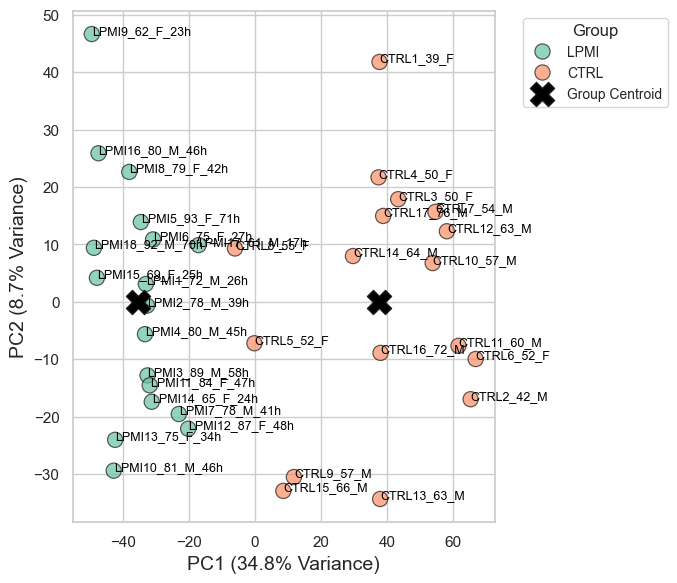

In [17]:
### In the following section I need to perform an analysis to show that there are actually two disticnt domain between the 0h -80c samples and 4h at 6C samples and 6h 20C, 24h 4C and 36h 4C samples.

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import os

def main():
    # Define file paths (Update these if your files are in different locations)
    expression_data_path = (
        "C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/"
        "Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/"
        "LPMI_CTRL_DESeq2_normalized_counts_covaraite_considered_for_revised_fig1C.csv"
    )
    metadata_path = (
        "C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/"
        "Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/"
        "LPMI_CTRL_DESeq2_normalized_counts_covaraite_considered_metadata_for_revised_fig1C.csv"
    )

    # ===========================
    # Step 1: Load and Prepare Data
    # ===========================
    
    # Load expression data
    expression_data = pd.read_csv(expression_data_path)
    # Assume the first column is a gene identifier; set it as the index
    expression_data.set_index(expression_data.columns[0], inplace=True)
    # Transpose: rows = samples, columns = genes
    expression_data = expression_data.transpose()

    print("Expression Data Shape:", expression_data.shape)
    print("Expression Data Sample Names:", expression_data.index.tolist())

    # Load metadata (SampleID, Group)
    metadata = pd.read_csv(metadata_path)
    print("\nMetadata Head:")
    print(metadata.head())

    # Check duplicates
    if metadata['SampleID'].duplicated().any():
        raise ValueError("Duplicate SampleIDs found in metadata. Please ensure each SampleID is unique.")

    # Merge Expression Data with Metadata
    merged_data = expression_data.merge(metadata, left_index=True, right_on="SampleID")

    # Check for missing samples
    missing_in_metadata = expression_data.index.difference(metadata['SampleID'])
    if not missing_in_metadata.empty:
        print("\nWarning: Samples missing in metadata will be excluded:")
        print(missing_in_metadata.tolist())
        merged_data = merged_data[merged_data['SampleID'].isin(metadata['SampleID'])]

    print("\nMerged Data Shape:", merged_data.shape)

    # ===========================
    # Step 2: Perform PCA
    # ===========================
    
    # Drop metadata columns, keep only gene expression
    X = merged_data.drop(['SampleID', 'Group'], axis=1).values

    # Initialize PCA
    pca = PCA(n_components=2, random_state=42)
    principal_components = pca.fit_transform(X)

    # Percentage of variance explained
    pca_var_perc = np.round(pca.explained_variance_ratio_ * 100, 1)

    # Create a DataFrame for PCA results
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    pca_df['Group'] = merged_data['Group']
    pca_df['SampleID'] = merged_data['SampleID']

    print("\nPCA Explained Variance:", pca_var_perc)

    # ===========================
    # Step 3: Visualize PCA (Colored by Group) + Centroids
    # ===========================
    
    # Directory for saving
    input_dir = os.path.dirname(expression_data_path)
    plot_filename = "LPMI_CTRL_PCA_plot_fig1C_revised.png"
    save_path = os.path.join(input_dir, plot_filename)

    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")

    # Scatter plot colored by Group
    scatter = sns.scatterplot(
        data=pca_df,
        x='PC1',
        y='PC2',
        hue='Group',
        palette='Set2',  # or any other palette
        s=120,
        edgecolor='k',
        alpha=0.7
    )

    # Annotate each point with the sample name
    for idx, row in pca_df.iterrows():
        plt.text(
            x=row['PC1'] + 0.02,
            y=row['PC2'] + 0.02,
            s=row['SampleID'],
            fontdict=dict(color='black', size=9)
        )

    # Compute centroids per Group
    group_centroids = pca_df.groupby('Group')[['PC1','PC2']].mean().reset_index()
    # Plot centroids as black 'X' markers
    plt.scatter(
        group_centroids['PC1'],
        group_centroids['PC2'],
        s=300,
        c='black',
        label='Group Centroid',
        marker='X',
        edgecolor='k'
    )

    # Adjust labels
    plt.xlabel(f'PC1 ({pca_var_perc[0]}% Variance)', fontsize=14)
    plt.ylabel(f'PC2 ({pca_var_perc[1]}% Variance)', fontsize=14)

    # We re-add the legend so the black centroid marker is included
    plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"\nPCA plot with group centroids saved at: {save_path}")

    plt.show()

if __name__ == "__main__":
    main()


Expression Data Shape: (35, 62703)
Expression Data Sample Names: ['LPMI1_72_M_26h', 'LPMI2_78_M_39h', 'LPMI3_89_M_58h', 'LPMI4_80_M_45h', 'LPMI5_93_F_71h', 'LPMI6_75_F_27h', 'LPMI7_78_M_41h', 'LPMI8_79_F_42h', 'LPMI9_62_F_23h', 'LPMI10_81_M_46h', 'LPMI11_84_F_47h', 'LPMI12_87_F_48h', 'LPMI13_75_F_34h', 'LPMI14_65_F_24h', 'LPMI15_69_F_25h', 'LPMI16_80_M_46h', 'LPMI17_61_M_17h', 'LPMI18_92_M_70h', 'CTRL1_39_F', 'CTRL2_42_M', 'CTRL3_50_F', 'CTRL4_50_F', 'CTRL5_52_F', 'CTRL6_52_F', 'CTRL7_54_M', 'CTRL8_55_F', 'CTRL9_57_M', 'CTRL10_57_M', 'CTRL11_60_M', 'CTRL12_63_M', 'CTRL13_63_M', 'CTRL14_64_M', 'CTRL15_66_M', 'CTRL16_72_M', 'CTRL17_76_M']

Metadata Head:
         SampleID Group
0  LPMI1_72_M_26h  LPMI
1  LPMI2_78_M_39h  LPMI
2  LPMI3_89_M_58h  LPMI
3  LPMI4_80_M_45h  LPMI
4  LPMI5_93_F_71h  LPMI

Merged Data Shape: (35, 62705)

PCA Explained Variance: [34.8  8.7]

PCA plot (no sample names, no legend) saved at: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writ

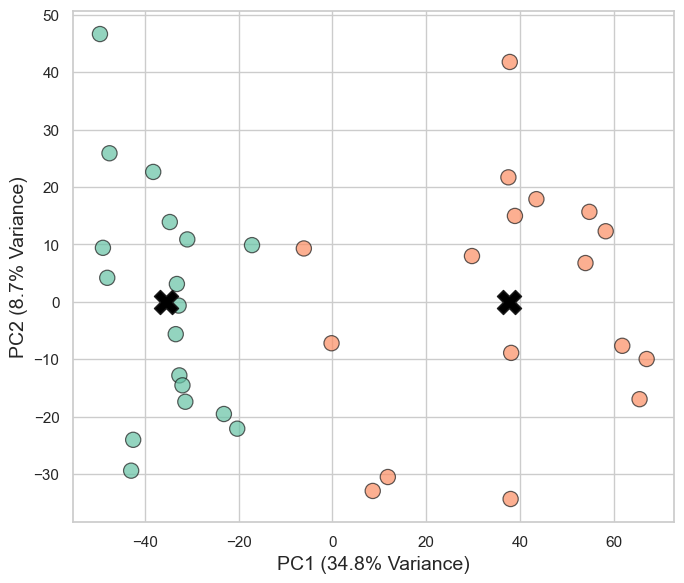

In [21]:
#### For the sake of figure adjutments in which I should I the samole names mnaullay I need to make the above plot without sample names and legend. 
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import os

def main():
    # Define file paths (Update these if your files are in different locations)
    expression_data_path = (
        "C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/"
        "Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/"
        "LPMI_CTRL_DESeq2_normalized_counts_covaraite_considered_for_revised_fig1C.csv"
    )
    metadata_path = (
        "C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/"
        "Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/"
        "LPMI_CTRL_DESeq2_normalized_counts_covaraite_considered_metadata_for_revised_fig1C.csv"
    )

    # ===========================
    # Step 1: Load and Prepare Data
    # ===========================
    
    # Load expression data
    expression_data = pd.read_csv(expression_data_path)
    # Assume the first column is a gene identifier; set it as the index
    expression_data.set_index(expression_data.columns[0], inplace=True)
    # Transpose so rows are samples, columns are genes
    expression_data = expression_data.transpose()

    print("Expression Data Shape:", expression_data.shape)
    print("Expression Data Sample Names:", expression_data.index.tolist())

    # Load metadata (SampleID, Group)
    metadata = pd.read_csv(metadata_path)
    print("\nMetadata Head:")
    print(metadata.head())

    # Check duplicates
    if metadata['SampleID'].duplicated().any():
        raise ValueError("Duplicate SampleIDs found in metadata. Please ensure each SampleID is unique.")

    # Merge Expression Data with Metadata
    merged_data = expression_data.merge(metadata, left_index=True, right_on="SampleID")

    # Check for samples missing in metadata
    missing_in_metadata = expression_data.index.difference(metadata['SampleID'])
    if not missing_in_metadata.empty:
        print("\nWarning: Samples missing in metadata will be excluded:")
        print(missing_in_metadata.tolist())
        merged_data = merged_data[merged_data['SampleID'].isin(metadata['SampleID'])]

    print("\nMerged Data Shape:", merged_data.shape)

    # ===========================
    # Step 2: Perform PCA
    # ===========================
    
    # Drop metadata columns, keep only gene expression
    X = merged_data.drop(['SampleID', 'Group'], axis=1).values

    # Initialize PCA
    pca = PCA(n_components=2, random_state=42)
    principal_components = pca.fit_transform(X)

    # Variance explained by each PC
    pca_var_perc = np.round(pca.explained_variance_ratio_ * 100, 1)

    # Create a DataFrame for PCA results
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    pca_df['Group'] = merged_data['Group']
    pca_df['SampleID'] = merged_data['SampleID']

    print("\nPCA Explained Variance:", pca_var_perc)

    # ===========================
    # Step 3: Visualize PCA (Colored by Group) + Centroids (No Legend, No Sample Labels)
    # ===========================
    
    # Directory for saving
    input_dir = os.path.dirname(expression_data_path)
    plot_filename = "LPMI_CTRL_PCA_plot_fig1C_revised_NO_LABELS_NO_LEGEND.png"
    save_path = os.path.join(input_dir, plot_filename)

    plt.figure(figsize=(7, 6))
    sns.set(style="whitegrid")

    # Scatter plot colored by Group, but with no legend
    scatter = sns.scatterplot(
        data=pca_df,
        x='PC1',
        y='PC2',
        hue='Group',
        palette='Set2',
        s=120,
        edgecolor='k',
        alpha=0.7,
        legend=False  # Turn off the legend
    )

    # Compute group centroids
    group_centroids = pca_df.groupby('Group')[['PC1','PC2']].mean().reset_index()

    # Plot centroids (no label so they won't appear in a legend)
    plt.scatter(
        group_centroids['PC1'],
        group_centroids['PC2'],
        s=300,
        c='black',
        marker='X',
        edgecolor='k'
        # No label => won't appear in a legend
    )

    # Remove the loop that annotated each sample with SampleID

    # Adjust labels
    plt.xlabel(f'PC1 ({pca_var_perc[0]}% Variance)', fontsize=14)
    plt.ylabel(f'PC2 ({pca_var_perc[1]}% Variance)', fontsize=14)

    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"\nPCA plot (no sample names, no legend) saved at: {save_path}")

    plt.show()

if __name__ == "__main__":
    main()


Expression Data Shape: (27, 62703)
Expression Data Sample Names: ['SPMI1_72_M_4h', 'SPMI2_95_F_4h', 'SPMI3_91_M_5h', 'SPMI4_102_F_5h', 'SPMI5_76_F_5h', 'SPMI6_82_M_6h', 'SPMI7_82_F_6h', 'SPMI8_60_F_6h', 'SPMI9_93_M_8h', 'SPMI10_89_F_13h', 'CTRL1_39_F', 'CTRL2_42_M', 'CTRL3_50_F', 'CTRL4_50_F', 'CTRL5_52_F', 'CTRL6_52_F', 'CTRL7_54_M', 'CTRL8_55_F', 'CTRL9_57_M', 'CTRL10_57_M', 'CTRL11_60_M', 'CTRL12_63_M', 'CTRL13_63_M', 'CTRL14_64_M', 'CTRL15_66_M', 'CTRL16_72_M', 'CTRL17_76_M']

Metadata Head:
         SampleID Group
0   SPMI1_72_M_4h  SPMI
1   SPMI2_95_F_4h  SPMI
2   SPMI3_91_M_5h  SPMI
3  SPMI4_102_F_5h  SPMI
4   SPMI5_76_F_5h  SPMI

Merged Data Shape: (27, 62705)

PCA Explained Variance: [40.4  8.2]

PCA plot with group centroids saved at: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024\SPMI_CTRL_PCA_plot_fig2C_revised.png


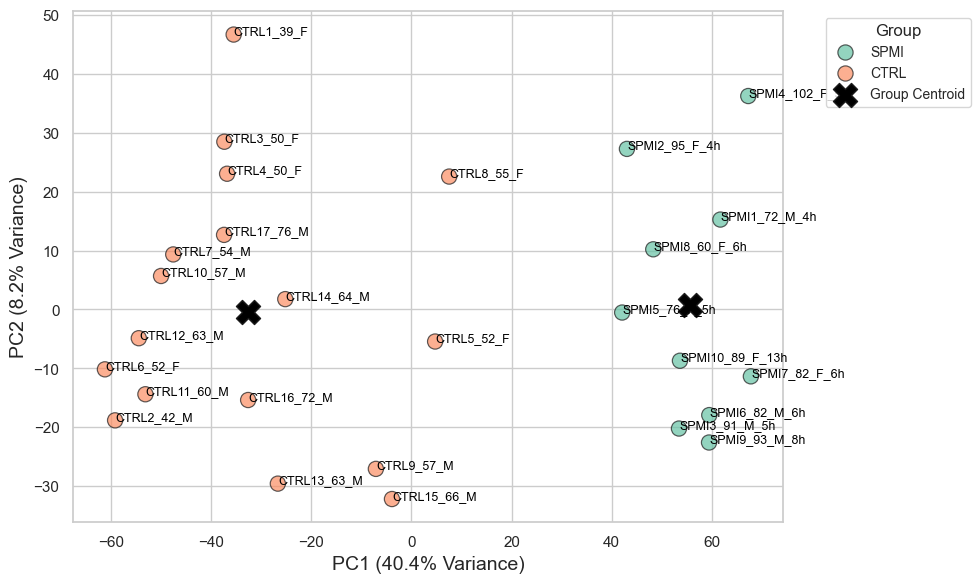

In [22]:
### In the following section I need to perform an analysis to show that there are actually two disticnt domain between the LPMI and CTRL samples by performing new PCA analysis and showing centroid values.

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import os

def main():
    # Define file paths (Update these if your files are in different locations)
    expression_data_path = (
        "C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/"
        "Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/"
        "SPMI_CTRL_DESeq2_normalized_counts_covaraite_considered_for_revised_fig2C.csv"
    )
    metadata_path = (
        "C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/"
        "Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/"
        "SPMI_CTRL_DESeq2_normalized_counts_covaraite_considered_metadata_for_revised_fig2C.csv"
    )

    # ===========================
    # Step 1: Load and Prepare Data
    # ===========================
    
    # Load expression data
    expression_data = pd.read_csv(expression_data_path)
    # Assume the first column is a gene identifier; set it as the index
    expression_data.set_index(expression_data.columns[0], inplace=True)
    # Transpose: rows = samples, columns = genes
    expression_data = expression_data.transpose()

    print("Expression Data Shape:", expression_data.shape)
    print("Expression Data Sample Names:", expression_data.index.tolist())

    # Load metadata (SampleID, Group)
    metadata = pd.read_csv(metadata_path)
    print("\nMetadata Head:")
    print(metadata.head())

    # Check duplicates
    if metadata['SampleID'].duplicated().any():
        raise ValueError("Duplicate SampleIDs found in metadata. Please ensure each SampleID is unique.")

    # Merge Expression Data with Metadata
    merged_data = expression_data.merge(metadata, left_index=True, right_on="SampleID")

    # Check for missing samples
    missing_in_metadata = expression_data.index.difference(metadata['SampleID'])
    if not missing_in_metadata.empty:
        print("\nWarning: Samples missing in metadata will be excluded:")
        print(missing_in_metadata.tolist())
        merged_data = merged_data[merged_data['SampleID'].isin(metadata['SampleID'])]

    print("\nMerged Data Shape:", merged_data.shape)

    # ===========================
    # Step 2: Perform PCA
    # ===========================
    
    # Drop metadata columns, keep only gene expression
    X = merged_data.drop(['SampleID', 'Group'], axis=1).values

    # Initialize PCA
    pca = PCA(n_components=2, random_state=42)
    principal_components = pca.fit_transform(X)

    # Percentage of variance explained
    pca_var_perc = np.round(pca.explained_variance_ratio_ * 100, 1)

    # Create a DataFrame for PCA results
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    pca_df['Group'] = merged_data['Group']
    pca_df['SampleID'] = merged_data['SampleID']

    print("\nPCA Explained Variance:", pca_var_perc)

    # ===========================
    # Step 3: Visualize PCA (Colored by Group) + Centroids
    # ===========================
    
    # Directory for saving
    input_dir = os.path.dirname(expression_data_path)
    plot_filename = "SPMI_CTRL_PCA_plot_fig2C_revised.png"
    save_path = os.path.join(input_dir, plot_filename)

    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")

    # Scatter plot colored by Group
    scatter = sns.scatterplot(
        data=pca_df,
        x='PC1',
        y='PC2',
        hue='Group',
        palette='Set2',  # or any other palette
        s=120,
        edgecolor='k',
        alpha=0.7
    )

    # Annotate each point with the sample name
    for idx, row in pca_df.iterrows():
        plt.text(
            x=row['PC1'] + 0.02,
            y=row['PC2'] + 0.02,
            s=row['SampleID'],
            fontdict=dict(color='black', size=9)
        )

    # Compute centroids per Group
    group_centroids = pca_df.groupby('Group')[['PC1','PC2']].mean().reset_index()
    # Plot centroids as black 'X' markers
    plt.scatter(
        group_centroids['PC1'],
        group_centroids['PC2'],
        s=300,
        c='black',
        label='Group Centroid',
        marker='X',
        edgecolor='k'
    )

    # Adjust labels
    plt.xlabel(f'PC1 ({pca_var_perc[0]}% Variance)', fontsize=14)
    plt.ylabel(f'PC2 ({pca_var_perc[1]}% Variance)', fontsize=14)

    # We re-add the legend so the black centroid marker is included
    plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"\nPCA plot with group centroids saved at: {save_path}")

    plt.show()

if __name__ == "__main__":
    main()


Expression Data Shape: (27, 62703)
Expression Data Sample Names: ['SPMI1_72_M_4h', 'SPMI2_95_F_4h', 'SPMI3_91_M_5h', 'SPMI4_102_F_5h', 'SPMI5_76_F_5h', 'SPMI6_82_M_6h', 'SPMI7_82_F_6h', 'SPMI8_60_F_6h', 'SPMI9_93_M_8h', 'SPMI10_89_F_13h', 'CTRL1_39_F', 'CTRL2_42_M', 'CTRL3_50_F', 'CTRL4_50_F', 'CTRL5_52_F', 'CTRL6_52_F', 'CTRL7_54_M', 'CTRL8_55_F', 'CTRL9_57_M', 'CTRL10_57_M', 'CTRL11_60_M', 'CTRL12_63_M', 'CTRL13_63_M', 'CTRL14_64_M', 'CTRL15_66_M', 'CTRL16_72_M', 'CTRL17_76_M']

Metadata Head:
         SampleID Group
0   SPMI1_72_M_4h  SPMI
1   SPMI2_95_F_4h  SPMI
2   SPMI3_91_M_5h  SPMI
3  SPMI4_102_F_5h  SPMI
4   SPMI5_76_F_5h  SPMI

Merged Data Shape: (27, 62705)

PCA Explained Variance: [40.4  8.2]

PCA plot (no sample names, no legend) saved at: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024\SPMI_CTRL_PCA_plot_fig2C_revised_NO_LABELS_NO_LEGEND.png


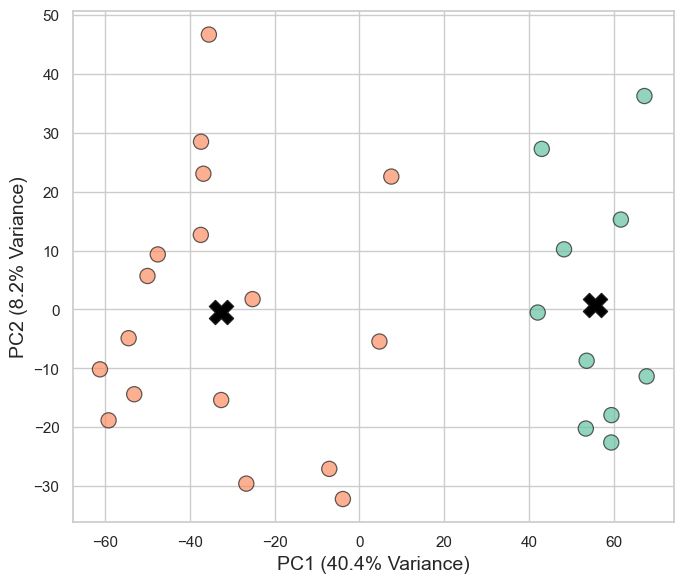

In [23]:
#### For the sake of figure adjutments in which I should I the samole names mnaullay I need to make the above plot without sample names and legend. 
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import os

def main():
    # Define file paths (Update these if your files are in different locations)
    expression_data_path = (
        "C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/"
        "Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/"
        "SPMI_CTRL_DESeq2_normalized_counts_covaraite_considered_for_revised_fig2C.csv"
    )
    metadata_path = (
        "C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/"
        "Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/"
        "SPMI_CTRL_DESeq2_normalized_counts_covaraite_considered_metadata_for_revised_fig2C.csv"
    )

    # ===========================
    # Step 1: Load and Prepare Data
    # ===========================
    
    # Load expression data
    expression_data = pd.read_csv(expression_data_path)
    # Assume the first column is a gene identifier; set it as the index
    expression_data.set_index(expression_data.columns[0], inplace=True)
    # Transpose so rows are samples, columns are genes
    expression_data = expression_data.transpose()

    print("Expression Data Shape:", expression_data.shape)
    print("Expression Data Sample Names:", expression_data.index.tolist())

    # Load metadata (SampleID, Group)
    metadata = pd.read_csv(metadata_path)
    print("\nMetadata Head:")
    print(metadata.head())

    # Check duplicates
    if metadata['SampleID'].duplicated().any():
        raise ValueError("Duplicate SampleIDs found in metadata. Please ensure each SampleID is unique.")

    # Merge Expression Data with Metadata
    merged_data = expression_data.merge(metadata, left_index=True, right_on="SampleID")

    # Check for samples missing in metadata
    missing_in_metadata = expression_data.index.difference(metadata['SampleID'])
    if not missing_in_metadata.empty:
        print("\nWarning: Samples missing in metadata will be excluded:")
        print(missing_in_metadata.tolist())
        merged_data = merged_data[merged_data['SampleID'].isin(metadata['SampleID'])]

    print("\nMerged Data Shape:", merged_data.shape)

    # ===========================
    # Step 2: Perform PCA
    # ===========================
    
    # Drop metadata columns, keep only gene expression
    X = merged_data.drop(['SampleID', 'Group'], axis=1).values

    # Initialize PCA
    pca = PCA(n_components=2, random_state=42)
    principal_components = pca.fit_transform(X)

    # Variance explained by each PC
    pca_var_perc = np.round(pca.explained_variance_ratio_ * 100, 1)

    # Create a DataFrame for PCA results
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    pca_df['Group'] = merged_data['Group']
    pca_df['SampleID'] = merged_data['SampleID']

    print("\nPCA Explained Variance:", pca_var_perc)

    # ===========================
    # Step 3: Visualize PCA (Colored by Group) + Centroids (No Legend, No Sample Labels)
    # ===========================
    
    # Directory for saving
    input_dir = os.path.dirname(expression_data_path)
    plot_filename = "SPMI_CTRL_PCA_plot_fig2C_revised_NO_LABELS_NO_LEGEND.png"
    save_path = os.path.join(input_dir, plot_filename)

    plt.figure(figsize=(7, 6))
    sns.set(style="whitegrid")

    # Scatter plot colored by Group, but with no legend
    scatter = sns.scatterplot(
        data=pca_df,
        x='PC1',
        y='PC2',
        hue='Group',
        palette='Set2',
        s=120,
        edgecolor='k',
        alpha=0.7,
        legend=False  # Turn off the legend
    )

    # Compute group centroids
    group_centroids = pca_df.groupby('Group')[['PC1','PC2']].mean().reset_index()

    # Plot centroids (no label so they won't appear in a legend)
    plt.scatter(
        group_centroids['PC1'],
        group_centroids['PC2'],
        s=300,
        c='black',
        marker='X',
        edgecolor='k'
        # No label => won't appear in a legend
    )

    # Remove the loop that annotated each sample with SampleID

    # Adjust labels
    plt.xlabel(f'PC1 ({pca_var_perc[0]}% Variance)', fontsize=14)
    plt.ylabel(f'PC2 ({pca_var_perc[1]}% Variance)', fontsize=14)

    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"\nPCA plot (no sample names, no legend) saved at: {save_path}")

    plt.show()

if __name__ == "__main__":
    main()


In [29]:
#### This section belong to question 23 from reviewer 4. In this section I need to explore the correlation of the up regulated genes for different pair of comparisons (like every comparison against CTRL)
#### and see if those 50 genes that I have used in my snRNAseq data turn out to be true representative across all sampls or not. 
#### First I need to have mrged file in which I have All unique genes from across all comparisons in rows and each column show each comparison’s logFC (considtion vs CTRL).
#### In this format, A row corresponds to one gene, and each column corresponds to one comparison’s logFC values for that gene. If a gene doesn’t appear in one comparison 
### (e.g., it wasn’t differentially expressed there or didn’t meet a threshold), you’d have NA (missing) or zero in that comparison’s column.
import os
import pandas as pd

def main():
    # Directory containing your Excel files
    base_dir = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024"

    # List of Excel files and the prefix we want for logFC columns
    # file_name:  prefix to rename 'logFC' --> 'logFC_<prefix>'
    files_info = {
        "LPMI_vs_CTRL_upreg.xlsx": "LPMI_vs_CTRL_upreg",
        "SPMI_vs_CTRL_upreg.xlsx": "SPMI_vs_CTRL_upreg",
        "36hRT_vs_CTRL_upreg.xlsx": "36hRT_vs_CTRL_upreg",
        "24hRT_vs_CTRL_upreg.xlsx": "24hRT_vs_CTRL_upreg",
        "6hRT_vs_CTRL_upreg.xlsx": "6hRT_vs_CTRL_upreg",
        "36h4c_vs_CTRL_upreg.xlsx": "36h4c_vs_CTRL_upreg",
        "24h4c_vs_CTRL_upreg.xlsx": "24h4c_vs_CTRL_upreg",
    }

    # We'll create a merged DataFrame in a "wide" format
    merged_df = None

    for file_name, prefix in files_info.items():
        file_path = os.path.join(base_dir, file_name)

        # Read the Excel file
        try:
            df = pd.read_excel(file_path)
        except Exception as e:
            print(f"Error reading {file_path}: {e}")
            continue

        # Check for required columns: 'Gene' and 'logFC'
        if 'Gene' not in df.columns or 'logFC' not in df.columns:
            print(f"File {file_name} is missing 'Gene' or 'logFC' columns. Skipping.")
            continue

        # Rename 'logFC' to a unique column name
        new_col_name = f"logFC_{prefix}"
        df.rename(columns={'logFC': new_col_name}, inplace=True)

        # We'll keep only 'Gene' and our new logFC column
        df = df[['Gene', new_col_name]]

        # Merge into merged_df
        if merged_df is None:
            # First file -> initialize merged_df
            merged_df = df
        else:
            # Outer join on 'Gene' so all genes remain
            merged_df = pd.merge(merged_df, df, on='Gene', how='outer')

    if merged_df is None:
        print("No valid files were processed. Exiting.")
        return

    # We now have one wide DataFrame with columns:
    # 'Gene', 'logFC_LPMI_vs_CTRL_upreg', 'logFC_SPMI_vs_CTRL_upreg', etc.
    # Genes not present in a comparison have NaN in that column.

    # Sort by 'Gene' if you like
    merged_df.sort_values(by='Gene', inplace=True)

    # Save to a CSV file
    output_file = os.path.join(base_dir, "all_surgery_and_autopsy_comparisons_vs_CTRL_samples_for_Spearman_correlation_merged_file.csv")
    merged_df.to_csv(output_file, index=False)
    print(f"Successfully created wide file: {output_file}")

    # Optional: Display a snippet
    print("\nMerged Data (head):")
    print(merged_df.head())

if __name__ == "__main__":
    main()


Successfully created wide file: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024\all_surgery_and_autopsy_comparisons_vs_CTRL_samples_for_Spearman_correlation_merged_file.csv

Merged Data (head):
        Gene  logFC_LPMI_vs_CTRL_upreg  logFC_SPMI_vs_CTRL_upreg  \
0        7SK                  1.638293                  2.281567   
1  A2ML1-AS1                       NaN                       NaN   
2       AAR2                       NaN                  1.219773   
3   AARSD1P1                       NaN                       NaN   
4       AATF                       NaN                       NaN   

   logFC_36hRT_vs_CTRL_upreg  logFC_24hRT_vs_CTRL_upreg  \
0                        NaN                        NaN   
1                        NaN                        NaN   
2                        NaN                        NaN   
3                        NaN                   1.015724   
4                   1.605345 

In [30]:
### This code will give me an excel file in which I know LPMI and SPMI comparison vs surgery comparisons is signifiant or not and also how many gene exist within any pair to have positive logFC
### indicated by NumPoints

import os
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

def merge_comparisons_to_wide(base_dir, files_info, output_csv="all_comparisons_wide.csv"):
    """
    Merges multiple Excel files containing [Gene, logFC] into one wide table.
    Rows = all genes across comparisons
    Columns = logFC_<prefix> for each comparison

    :param base_dir: Directory containing the Excel files
    :param files_info: dict { "fileName.xlsx": "prefix_for_logFC_column" }
    :param output_csv: Name for the merged wide CSV file
    :return: DataFrame merged_df
    """
    merged_df = None

    for file_name, prefix in files_info.items():
        file_path = os.path.join(base_dir, file_name)
        try:
            df = pd.read_excel(file_path)
        except Exception as e:
            print(f"Error reading {file_path}: {e}")
            continue

        if 'Gene' not in df.columns or 'logFC' not in df.columns:
            print(f"File {file_name} missing 'Gene' or 'logFC'. Skipping.")
            continue

        new_col = f"logFC_{prefix}"
        df.rename(columns={'logFC': new_col}, inplace=True)
        df = df[['Gene', new_col]]  # keep only these two cols

        if merged_df is None:
            merged_df = df
        else:
            merged_df = pd.merge(merged_df, df, on='Gene', how='outer')

    if merged_df is None:
        print("No valid files processed. Exiting.")
        return None

    merged_df.sort_values(by='Gene', inplace=True)
    merged_df.reset_index(drop=True, inplace=True)

    output_path = os.path.join(base_dir, output_csv)
    merged_df.to_csv(output_path, index=False)
    print(f"Successfully created wide file: {output_path}")

    return merged_df

def run_spearman_correlations(wide_df, base_dir, output_csv="significant_correlations.csv"):
    """
    Runs Spearman correlations among columns in 'wide_df' based on user logic:
    - If column name includes 'LPMI' but not 'SPMI', correlate with all columns except those that contain 'LPMI' or 'SPMI'
    - If column name includes 'SPMI' but not 'LPMI', correlate with all columns except those that contain 'SPMI' or 'LPMI'

    Collects pairs with p-value < 0.05, saves them to CSV.
    NOTE: This yields correlation across genes, not per gene.

    :param wide_df: DataFrame with columns 'Gene' + logFC_<prefix> columns
    :param base_dir: directory for saving results
    :param output_csv: name of file to save significant correlations
    :return: DataFrame containing significant correlations
    """
    # Identify logFC columns
    all_cols = list(wide_df.columns)
    # The first column should be 'Gene'; we only want numeric columns after that
    logfc_cols = [c for c in all_cols if c != 'Gene']

    # We'll store results in a list of dict
    sig_results = []

    for colA in logfc_cols:
        colA_lower = colA.lower()
        # Decide if colA is LPMI or SPMI
        # e.g., if 'LPMI' in colA and 'SPMI' not in colA
        if 'lpmi' in colA_lower and 'spmi' not in colA_lower:
            # then we correlate colA with all columns except those containing 'lpmi' or 'spmi'
            for colB in logfc_cols:
                if colB == colA:
                    continue
                colB_lower = colB.lower()
                if 'lpmi' in colB_lower or 'spmi' in colB_lower:
                    # skip
                    continue
                # Now do Spearman correlation across genes
                seriesA = wide_df[colA]
                seriesB = wide_df[colB]
                # drop NaNs
                df_temp = pd.concat([seriesA, seriesB], axis=1).dropna()
                if len(df_temp) < 2:
                    continue
                r, p = spearmanr(df_temp[colA], df_temp[colB])
                if p < 0.05:
                    sig_results.append({
                        'ColumnA': colA,
                        'ColumnB': colB,
                        'Spearman_r': r,
                        'p-value': p,
                        'NumPoints': len(df_temp)
                    })

        # Similarly for if 'spmi' in colA and 'lpmi' not in colA
        elif 'spmi' in colA_lower and 'lpmi' not in colA_lower:
            # Correlate colA with all columns except those containing 'spmi' or 'lpmi'
            for colB in logfc_cols:
                if colB == colA:
                    continue
                colB_lower = colB.lower()
                if 'spmi' in colB_lower or 'lpmi' in colB_lower:
                    continue
                # Spearman
                seriesA = wide_df[colA]
                seriesB = wide_df[colB]
                df_temp = pd.concat([seriesA, seriesB], axis=1).dropna()
                if len(df_temp) < 2:
                    continue
                r, p = spearmanr(df_temp[colA], df_temp[colB])
                if p < 0.05:
                    sig_results.append({
                        'ColumnA': colA,
                        'ColumnB': colB,
                        'Spearman_r': r,
                        'p-value': p,
                        'NumPoints': len(df_temp)
                    })

    # Convert sig_results to DataFrame, save
    if len(sig_results)==0:
        print("No significant correlations found (p<0.05).")
        return None

    sig_df = pd.DataFrame(sig_results)
    sig_df.sort_values(by='p-value', inplace=True)
    out_file = os.path.join(base_dir, output_csv)
    sig_df.to_csv(out_file, index=False)
    print(f"\nSaved significant correlations to: {out_file}")

    return sig_df

def main():
    # Directory containing your Excel files
    base_dir = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024"

    # The Excel files to merge
    files_info = {
        "LPMI_vs_CTRL_upreg.xlsx": "LPMI_vs_CTRL_upreg",
        "SPMI_vs_CTRL_upreg.xlsx": "SPMI_vs_CTRL_upreg",
        "36hRT_vs_CTRL_upreg.xlsx": "36hRT_vs_CTRL_upreg",
        "24hRT_vs_CTRL_upreg.xlsx": "24hRT_vs_CTRL_upreg",
        "6hRT_vs_CTRL_upreg.xlsx": "6hRT_vs_CTRL_upreg",
        "36h4c_vs_CTRL_upreg.xlsx": "36h4c_vs_CTRL_upreg",
        "24h4c_vs_CTRL_upreg.xlsx": "24h4c_vs_CTRL_upreg",
    }

    # 1) Merge them into one wide CSV
    wide_csv = "all_comparisons_wide.csv"
    merged_df = merge_comparisons_to_wide(
        base_dir=base_dir,
        files_info=files_info,
        output_csv=wide_csv
    )
    if merged_df is None:
        print("Merging files failed, no correlation analysis performed.")
        return

    # 2) Run Spearman correlation logic:
    #    - LPMI vs all columns except SPMI
    #    - SPMI vs all columns except LPMI
    #    - filter p<0.05
    corr_csv = "significant_correlations.csv"
    sig_df = run_spearman_correlations(merged_df, base_dir, corr_csv)
    if sig_df is not None:
        print("\nSignificant correlations found:")
        print(sig_df)

if __name__ == "__main__":
    main()


Successfully created wide file: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024\all_comparisons_wide.csv

Saved significant correlations to: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024\significant_correlations.csv

Significant correlations found:
                    ColumnA                    ColumnB  Spearman_r  \
4  logFC_LPMI_vs_CTRL_upreg  logFC_24h4c_vs_CTRL_upreg    0.526621   
0  logFC_LPMI_vs_CTRL_upreg  logFC_36hRT_vs_CTRL_upreg    0.420014   
1  logFC_LPMI_vs_CTRL_upreg  logFC_24hRT_vs_CTRL_upreg    0.413441   
3  logFC_LPMI_vs_CTRL_upreg  logFC_36h4c_vs_CTRL_upreg    0.436928   
6  logFC_SPMI_vs_CTRL_upreg  logFC_24hRT_vs_CTRL_upreg    0.373129   
5  logFC_SPMI_vs_CTRL_upreg  logFC_36hRT_vs_CTRL_upreg    0.345281   
8  logFC_SPMI_vs_CTRL_upreg  logFC_36h4c_vs_CTRL_upreg    0.361500   
2  logFC_LPMI_vs_CTRL_upreg   logFC_6hRT_vs

In [2]:
#### See how many common genes I have across comparison that were commonly upregulated in response to CTRL samples
import os
import pandas as pd

def main():
    # Directory containing your Excel files
    base_dir = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024"

    # List of Excel files and the prefix we want for logFC columns
    # file_name:  prefix to rename 'logFC' --> 'logFC_<prefix>'
    files_info = {
        "LPMI_vs_CTRL_upreg.xlsx": "LPMI_vs_CTRL_upreg",
        "SPMI_vs_CTRL_upreg.xlsx": "SPMI_vs_CTRL_upreg",
        "36hRT_vs_CTRL_upreg.xlsx": "36hRT_vs_CTRL_upreg",
        "24hRT_vs_CTRL_upreg.xlsx": "24hRT_vs_CTRL_upreg",
        "6hRT_vs_CTRL_upreg.xlsx": "6hRT_vs_CTRL_upreg",
        "36h4c_vs_CTRL_upreg.xlsx": "36h4c_vs_CTRL_upreg",
        "24h4c_vs_CTRL_upreg.xlsx": "24h4c_vs_CTRL_upreg",
    }

    # We'll create a merged DataFrame in a "wide" format
    merged_df = None

    # Merge loop
    for file_name, prefix in files_info.items():
        file_path = os.path.join(base_dir, file_name)

        # Read the Excel file
        try:
            df = pd.read_excel(file_path)
        except Exception as e:
            print(f"Error reading {file_path}: {e}")
            continue

        # Check for required columns: 'Gene' and 'logFC'
        if 'Gene' not in df.columns or 'logFC' not in df.columns:
            print(f"File {file_name} is missing 'Gene' or 'logFC' columns. Skipping.")
            continue

        # Rename 'logFC' to a unique column name
        new_col_name = f"logFC_{prefix}"
        df.rename(columns={'logFC': new_col_name}, inplace=True)

        # Keep only 'Gene' and our new logFC column
        df = df[['Gene', new_col_name]]

        # Merge into merged_df
        if merged_df is None:
            # First file -> initialize merged_df
            merged_df = df
        else:
            # Outer join on 'Gene' so all genes remain
            merged_df = pd.merge(merged_df, df, on='Gene', how='outer')

    if merged_df is None:
        print("No valid files were processed. Exiting.")
        return

    # Sort by 'Gene' if you like
    merged_df.sort_values(by='Gene', inplace=True)

    # Save to a CSV file (with potential NaNs)
    output_file = os.path.join(
        base_dir,
        "all_surgery_and_autopsy_comparisons_vs_CTRL_samples_for_Spearman_correlation_merged_file.csv"
    )
    merged_df.to_csv(output_file, index=False)
    print(f"Successfully created wide file: {output_file}")

    # Create another file that has no missing values across any logFC columns
    # (i.e., only genes that appear in every comparison)
    no_na_df = merged_df.dropna()  # drops any row with NaN in any logFC column

    # Save that too
    no_na_output_file = os.path.join(
        base_dir,
        "all_surgery_and_autopsy_comparisons_vs_CTRL_samples_for_Spearman_correlation_merged_file_NO_NAs.csv"
    )
    no_na_df.to_csv(no_na_output_file, index=False)
    print(f"Successfully created NO-NA wide file: {no_na_output_file}")

    # Optional: Display a snippet
    print("\nMerged Data (head):")
    print(merged_df.head())

    print("\nMerged Data (NO NAs) (head):")
    print(no_na_df.head())

if __name__ == "__main__":
    main()


Successfully created wide file: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024\all_surgery_and_autopsy_comparisons_vs_CTRL_samples_for_Spearman_correlation_merged_file.csv
Successfully created NO-NA wide file: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024\all_surgery_and_autopsy_comparisons_vs_CTRL_samples_for_Spearman_correlation_merged_file_NO_NAs.csv

Merged Data (head):
        Gene  logFC_LPMI_vs_CTRL_upreg  logFC_SPMI_vs_CTRL_upreg  \
0        7SK                  1.638293                  2.281567   
1  A2ML1-AS1                       NaN                       NaN   
2       AAR2                       NaN                  1.219773   
3   AARSD1P1                       NaN                       NaN   
4       AATF                       NaN                       NaN   

   logFC_36hRT_vs_CTRL_upreg  logFC_24hRT_vs_CTRL_upreg  \
0     

In [4]:
#### Make sure to have all the genes in figure 3E of the pmain paper in all surgeru comparisosn. 
import os
import pandas as pd

def main():
    # The list of genes you want to check
    gene_list = [
        "ATP8","ND3","MTND2P28","MTATP6P1","ND6","ATP6","CYTB","ND4","COX1","ND1","ND2",
        "COX3","COX2","ND5","BCAS1","ND4L","SNORD3D","PAIP2B","GOLGA8B","MBP","LPAR1",
        "ARGLU1","SNORD3A","GOLGA4","TP53INP2","SHTN1","GOLGB1","ERC2","MTURN","ZC3H13",
        "BPTF","MAP4K4","PKP4","CIT","MAP7","BDP1","ZEB2","HIPK2","BAZ2B","DMD","KIF1C",
        "SLCO1A2","NIN","PCNT","CCDC144A","RBM39","SEC14L1","KIF5B","GOLGA8A","CCDC88A",
        "PTP4A2","PNISR","AKAP9","ARHGAP21","GAB2","RBM25","ANKRD40","CLIP1","FGF1",
        "MPHOSPH8","DYNC1LI2","GRIPAP1","PAQR6","SMC1A","ERC1","DOCK1","CHD5","TMEM179",
        "HERC2P2","ZCCHC24","DAAM2","BOD1L1","SMARCA4","SFPQ","TSPYL2","ACIN1","SEPTIN4",
        "GIGYF2","TPR","ZNF638","CASC3","KIF5A","CEP350","YLPM1","CHD6","ERBIN","PRRC2C",
        "KTN1","ERMN","SPECC1","RASSF2","SYNE1","PNN","RPS6","WNK1","NDRG1","PLEKHH1",
        "DST","MAP4","MAN1A2","ANKRD11","FMNL2","EIF3A","PLEKHB1","PCLO","SRRM2","MYH10",
        "SH3PXD2A","AHI1","MCF2L","NCL","EPB41L2","PRKCSH","BAZ1B","CACNA1B","PABPN1","TNIK",
        "RPL37A","MYO18A","MYH9","RBM33","RAPGEF4","PTPN11","SUPT6H","CHD2","CHD9","OTUD7B",
        "RSF1","KIAA0930","MYT1L","SNRNP70","MAGI2","PCM1","RIMS2","ZNF609","RIMS1","AKT3",
        "LINC00632","RPL7","SPEN","SUPT5H","HNRNPA1","PTK2","B4GALNT4","RPS23","CACNA1A",
        "SRCAP","PIP4K2A","ATRX","ITPRID2","TAF15","LUC7L3","NCOR2","MPDZ","RPL9","PMP2",
        "LIMCH1","TNRC6A","RYR3","NCOR1","GOLGA3","GRIN1","PTMA","FTH1","MIB1","MICAL3",
        "EIF4B","ENAH","TULP4","MYO10","SEPTIN7","UTRN","SPTBN1","HIP1R","MDN1","CHD3",
        "RPS14","TALAM1","SMARCC2","CA11","SPAG9","SPTAN1","QDPR","SIPA1L1","RPL3","NUMA1",
        "TRIO","PLEKHM2","MACF1","WNK2","PURA","TJP1","ARHGEF4","SRSF1","CTNND2","EIF4G3",
        "SEPTIN5","TPT1","RPL41","RPL13A"
    ]

    # The Excel files to check
    base_dir = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024"
    files_info = {
        "LPMI_vs_CTRL_upreg.xlsx": "LPMI_vs_CTRL_upreg",
        "SPMI_vs_CTRL_upreg.xlsx": "SPMI_vs_CTRL_upreg",
        "36hRT_vs_CTRL_upreg.xlsx": "36hRT_vs_CTRL_upreg",
        "24hRT_vs_CTRL_upreg.xlsx": "24hRT_vs_CTRL_upreg",
        "6hRT_vs_CTRL_upreg.xlsx": "6hRT_vs_CTRL_upreg",
        "36h4c_vs_CTRL_upreg.xlsx": "36h4c_vs_CTRL_upreg",
        "24h4c_vs_CTRL_upreg.xlsx": "24h4c_vs_CTRL_upreg",
    }

    # Convert user gene list to a set for easy membership checks
    user_genes_set = set(gene_list)

    # Iterate over each file, skipping those that contain "LPMI" or "SPMI" in the prefix
    for file_name, prefix in files_info.items():
        prefix_lower = prefix.lower()
        if 'lpmi' in prefix_lower or 'spmi' in prefix_lower:
            print(f"Skipping file: {file_name} (prefix: {prefix}) because it includes LPMI/SPMI.")
            continue

        file_path = os.path.join(base_dir, file_name)
        print(f"\nChecking file: {file_name}")

        # Read the Excel
        try:
            df = pd.read_excel(file_path)
        except Exception as e:
            print(f"Error reading {file_path}: {e}")
            continue

        # Check presence of 'Gene'
        if 'Gene' not in df.columns:
            print(f"File {file_name} missing 'Gene' column. Skipping.")
            continue

        # Convert file's gene column to a set
        file_genes = set(df['Gene'].astype(str))

        # Are the user genes in this file?
        missing_genes = user_genes_set - file_genes
        if len(missing_genes) == 0:
            print("All user genes are present in this file!")
        elif len(missing_genes) == len(user_genes_set):
            print("None of the user genes are found in this file.")
        else:
            print(f"{len(missing_genes)} user genes are missing in {file_name}:")
            # If you want, you can print them or just the number
            # print(missing_genes)

def main_wrapper():
    main()

if __name__ == "__main__":
    main_wrapper()


Skipping file: LPMI_vs_CTRL_upreg.xlsx (prefix: LPMI_vs_CTRL_upreg) because it includes LPMI/SPMI.
Skipping file: SPMI_vs_CTRL_upreg.xlsx (prefix: SPMI_vs_CTRL_upreg) because it includes LPMI/SPMI.

Checking file: 36hRT_vs_CTRL_upreg.xlsx
All user genes are present in this file!

Checking file: 24hRT_vs_CTRL_upreg.xlsx
6 user genes are missing in 24hRT_vs_CTRL_upreg.xlsx:

Checking file: 6hRT_vs_CTRL_upreg.xlsx
127 user genes are missing in 6hRT_vs_CTRL_upreg.xlsx:

Checking file: 36h4c_vs_CTRL_upreg.xlsx
140 user genes are missing in 36h4c_vs_CTRL_upreg.xlsx:

Checking file: 24h4c_vs_CTRL_upreg.xlsx
144 user genes are missing in 24h4c_vs_CTRL_upreg.xlsx:


In [18]:
#### This section addresses two key questions.

#### First, we must address Major Comment 2 from Reviewer 1, which requires us to demonstrate that age is not the primary factor driving the separation observed between our samples. 
#### I have partially addressed this previously by showing that significant differences between LPMI and SPMI samples persist even when analyzing subsets within a narrow age range using hierarchial approach. 
#### In this section, we will further investigate the influence of age on sample separation by examining its impact on the PCA plot.

#### The next application of this section pertains to Minor Comment 1 from Reviewer 1, where they request PCA plots for each experiment, visualizing the association of principal components with all relevant variables 
#### (age, sex, RIN values). To fulfill this request, we will generate three sets of PCA plots to assess the relationship between these variables and gene expression levels in both LPMI and SPMI samples.

### In this code I am using the Perason correlation. 
#### LPMI
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import os  # For file path handling

# =============================================================================
# 1) Specify the file directory and load data
# =============================================================================
file_dir = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/"

# Load the expression matrix and metadata
expr_df = pd.read_csv(file_dir + "LPMI_CTRL_DESeq2_normalized_counts_covaraite_considered_for_revised_fig1C.csv", index_col=0)
meta_df = pd.read_csv(file_dir + "LPMI_CTRL_DESeq2_normalized_counts_covaraite_considered_metadata_for_revised_PCA_R1QM1.csv", index_col=0)

# =============================================================================
# 2) Transpose the expression matrix if necessary
# =============================================================================
if expr_df.shape[0] > expr_df.shape[1]:
    expr_df = expr_df.T

print(f"Expression matrix shape: {expr_df.shape} (samples x genes)")
print(f"Metadata shape: {meta_df.shape} (samples x variables)")

# =============================================================================
# 3) Ensure alignment of metadata and expression data
# =============================================================================
meta_df = meta_df.reindex(expr_df.index)
assert expr_df.index.equals(meta_df.index), "Sample names in expression and metadata do not match!"

# =============================================================================
# 4) Perform PCA
# =============================================================================
pca = PCA(n_components=2)
pca_scores = pca.fit_transform(expr_df)

meta_df['PC1'] = pca_scores[:, 0]
meta_df['PC2'] = pca_scores[:, 1]

explained_variance = pca.explained_variance_ratio_ * 100
print(f"PC1 explains {explained_variance[0]:.2f}% of variance")
print(f"PC2 explains {explained_variance[1]:.2f}% of variance")

# =============================================================================
# 5) Plot PCA for Age, Sex, and RIN separately and save each plot
# =============================================================================
variables_to_plot = ['Age', 'Sex', 'RIN']
output_filenames = {
    'Age': "LPMI_CTRL_DESeq2_normalized_PCA_correlation_with_Age.png",
    'Sex': "LPMI_CTRL_DESeq2_normalized_PCA_correlation_with_Sex.png",
    'RIN': "LPMI_CTRL_DESeq2_normalized_PCA_correlation_with_RIN.png"
}

# Assigning shapes to LPMI and CTRL groups
style_dict = {'LPMI': 'o', 'CTRL': 's'}

for var in variables_to_plot:
    plt.figure(figsize=(8, 6))
    if pd.api.types.is_numeric_dtype(meta_df[var]):
        sns.scatterplot(
            data=meta_df,
            x='PC1',
            y='PC2',
            hue=var,
            style='Group',  # Use Group to assign specific shapes
            markers=style_dict,  # Pass the shape dictionary
            palette='viridis',
            edgecolor='black'
        )
        # Calculate correlation and p-value
        corr, pval = pearsonr(meta_df['PC1'], meta_df[var])
        plt.annotate(
            f'PC1 vs {var}: r={corr:.2f}, p={pval:.3g}',
            xy=(0.05, 0.9),
            xycoords='axes fraction',
            fontsize=14,
            color='black'
        )
        corr, pval = pearsonr(meta_df['PC2'], meta_df[var])
        plt.annotate(
            f'PC2 vs {var}: r={corr:.2f}, p={pval:.3g}',
            xy=(0.05, 0.85),
            xycoords='axes fraction',
            fontsize=14,
            color='black'
        )
    else:
        sns.scatterplot(
            data=meta_df,
            x='PC1',
            y='PC2',
            hue=var,
            style='Group',  # Use Group to assign specific shapes
            markers=style_dict,  # Pass the shape dictionary
            edgecolor='black'
        )

    plt.title(f'PCA colored by {var}')
    plt.xlabel(f'PC1 ({explained_variance[0]:.2f}% variance explained)', fontsize=14)
    plt.ylabel(f'PC2 ({explained_variance[1]:.2f}% variance explained)', fontsize=14)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)

    # Save the figure for the current variable
    output_file = os.path.join(file_dir, output_filenames[var])
    plt.tight_layout()
    plt.savefig(output_file, dpi=300)
    plt.close()  # Close the figure to avoid overlapping plots
    print(f"PCA plot saved for {var} at: {output_file}")

# =============================================================================
# 6) Correlation of Age and RIN with PCA components (print values)
# =============================================================================
print("\nCorrelation of PCA components with numeric variables:")
numeric_vars = ['Age', 'RIN']
for pc in ['PC1', 'PC2']:
    for num_var in numeric_vars:
        corr, pval = pearsonr(meta_df[pc], meta_df[num_var])
        print(f"  {pc} vs {num_var}: r={corr:.2f}, p={pval:.3g}")





Expression matrix shape: (35, 62703) (samples x genes)
Metadata shape: (35, 4) (samples x variables)
PC1 explains 34.81% of variance
PC2 explains 8.68% of variance
PCA plot saved for Age at: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/LPMI_CTRL_DESeq2_normalized_PCA_correlation_with_Age.png
PCA plot saved for Sex at: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/LPMI_CTRL_DESeq2_normalized_PCA_correlation_with_Sex.png
PCA plot saved for RIN at: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/LPMI_CTRL_DESeq2_normalized_PCA_correlation_with_RIN.png

Correlation of PCA components with numeric variables:
  PC1 vs Age: r=-0.70, p=2.58e-06
  PC1 vs RIN: r=-0.59, p=0.000195
  PC2 vs Age: r=-0.19, p=0.284
  PC2 vs RIN: r=0.44, p=0.00825


In [20]:
#### This section is exact;t the same as above code but instead of Pearson correlation I am using the Spearman correlation as requested by reviewer 4 in multiples questions. 

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr  # Use Spearman correlation
import os  # For file path handling

# =============================================================================
# 1) Specify the file directory and load data
# =============================================================================
file_dir = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/"

# Load the expression matrix and metadata
expr_df = pd.read_csv(file_dir + "LPMI_CTRL_DESeq2_normalized_counts_covaraite_considered_for_revised_fig1C.csv", index_col=0)
meta_df = pd.read_csv(file_dir + "LPMI_CTRL_DESeq2_normalized_counts_covaraite_considered_metadata_for_revised_PCA_R1QM1.csv", index_col=0)

# =============================================================================
# 2) Transpose the expression matrix if necessary
# =============================================================================
if expr_df.shape[0] > expr_df.shape[1]:
    expr_df = expr_df.T

print(f"Expression matrix shape: {expr_df.shape} (samples x genes)")
print(f"Metadata shape: {meta_df.shape} (samples x variables)")

# =============================================================================
# 3) Ensure alignment of metadata and expression data
# =============================================================================
meta_df = meta_df.reindex(expr_df.index)
assert expr_df.index.equals(meta_df.index), "Sample names in expression and metadata do not match!"

# =============================================================================
# 4) Perform PCA
# =============================================================================
pca = PCA(n_components=2)
pca_scores = pca.fit_transform(expr_df)

meta_df['PC1'] = pca_scores[:, 0]
meta_df['PC2'] = pca_scores[:, 1]

explained_variance = pca.explained_variance_ratio_ * 100
print(f"PC1 explains {explained_variance[0]:.2f}% of variance")
print(f"PC2 explains {explained_variance[1]:.2f}% of variance")

# =============================================================================
# 5) Plot PCA for Age, Sex, and RIN separately and save each plot
# =============================================================================
variables_to_plot = ['Age', 'Sex', 'RIN']
output_filenames = {
    'Age': "LPMI_CTRL_DESeq2_normalized_Spearman_PCA_correlation_with_Age.png",
    'Sex': "LPMI_CTRL_DESeq2_normalized_Spearman_PCA_correlation_with_Sex.png",
    'RIN': "LPMI_CTRL_DESeq2_normalized_Spearman_PCA_correlation_with_RIN.png"
}

# Assigning shapes to LPMI and CTRL groups
style_dict = {'LPMI': 'o', 'CTRL': 's'}

for var in variables_to_plot:
    plt.figure(figsize=(8, 6))
    if pd.api.types.is_numeric_dtype(meta_df[var]):
        sns.scatterplot(
            data=meta_df,
            x='PC1',
            y='PC2',
            hue=var,
            style='Group',  # Use Group to assign specific shapes
            markers=style_dict,  # Pass the shape dictionary
            palette='viridis',
            edgecolor='black'
        )
        # Calculate Spearman correlation and p-value
        corr, pval = spearmanr(meta_df['PC1'], meta_df[var])
        plt.annotate(
            f'PC1 vs {var}: ρ={corr:.2f}, p={pval:.3g}',  # Use ρ for Spearman correlation
            xy=(0.05, 0.9),
            xycoords='axes fraction',
            fontsize=14,
            color='black'
        )
        corr, pval = spearmanr(meta_df['PC2'], meta_df[var])
        plt.annotate(
            f'PC2 vs {var}: ρ={corr:.2f}, p={pval:.3g}',  # Use ρ for Spearman correlation
            xy=(0.05, 0.85),
            xycoords='axes fraction',
            fontsize=14,
            color='black'
        )
    else:
        sns.scatterplot(
            data=meta_df,
            x='PC1',
            y='PC2',
            hue=var,
            style='Group',  # Use Group to assign specific shapes
            markers=style_dict,  # Pass the shape dictionary
            edgecolor='black'
        )

    plt.title(f'PCA colored by {var}')
    plt.xlabel(f'PC1 ({explained_variance[0]:.2f}% variance explained)', fontsize=14)
    plt.ylabel(f'PC2 ({explained_variance[1]:.2f}% variance explained)', fontsize=14)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)

    # Save the figure for the current variable
    output_file = os.path.join(file_dir, output_filenames[var])
    plt.tight_layout()
    plt.savefig(output_file, dpi=300)
    plt.close()  # Close the figure to avoid overlapping plots
    print(f"PCA plot saved for {var} at: {output_file}")

# =============================================================================
# 6) Correlation of Age and RIN with PCA components (print values)
# =============================================================================
print("\nSpearman correlation of PCA components with numeric variables:")
numeric_vars = ['Age', 'RIN']
for pc in ['PC1', 'PC2']:
    for num_var in numeric_vars:
        corr, pval = spearmanr(meta_df[pc], meta_df[num_var])
        print(f"  {pc} vs {num_var}: ρ={corr:.2f}, p={pval:.3g}")


Expression matrix shape: (35, 62703) (samples x genes)
Metadata shape: (35, 4) (samples x variables)
PC1 explains 34.81% of variance
PC2 explains 8.68% of variance
PCA plot saved for Age at: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/LPMI_CTRL_DESeq2_normalized_Spearman_PCA_correlation_with_Age.png
PCA plot saved for Sex at: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/LPMI_CTRL_DESeq2_normalized_Spearman_PCA_correlation_with_Sex.png
PCA plot saved for RIN at: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/LPMI_CTRL_DESeq2_normalized_Spearman_PCA_correlation_with_RIN.png

Spearman correlation of PCA components with numeric variables:
  PC1 vs Age: ρ=-0.68, p=6.7e-06
  PC1 vs RIN: ρ=-0.60, p=0.000126
  PC2 vs Age: ρ=-0.17, p=0.331
  PC2 vs RIN: ρ=0.45, p=0.00687


In [21]:
#### This section also relates to the two previuos codes, but only for the SPMI samples. 
### In this code I am using the Perason correlation. 
#### SPMI and CTRL
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import os  # For file path handling

# =============================================================================
# 1) Specify the file directory and load data
# =============================================================================
file_dir = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/"

# Load the expression matrix and metadata
expr_df = pd.read_csv(file_dir + "SPMI_CTRL_DESeq2_normalized_counts_covaraite_considered_for_revised_fig2C.csv", index_col=0)
meta_df = pd.read_csv(file_dir + "SPMI_CTRL_DESeq2_normalized_counts_covaraite_considered_metadata_for_revised_PCA_R1QM1.csv", index_col=0)

# =============================================================================
# 2) Transpose the expression matrix if necessary
# =============================================================================
if expr_df.shape[0] > expr_df.shape[1]:
    expr_df = expr_df.T

print(f"Expression matrix shape: {expr_df.shape} (samples x genes)")
print(f"Metadata shape: {meta_df.shape} (samples x variables)")

# =============================================================================
# 3) Ensure alignment of metadata and expression data
# =============================================================================
meta_df = meta_df.reindex(expr_df.index)
assert expr_df.index.equals(meta_df.index), "Sample names in expression and metadata do not match!"

# =============================================================================
# 4) Perform PCA
# =============================================================================
pca = PCA(n_components=2)
pca_scores = pca.fit_transform(expr_df)

meta_df['PC1'] = pca_scores[:, 0]
meta_df['PC2'] = pca_scores[:, 1]

explained_variance = pca.explained_variance_ratio_ * 100
print(f"PC1 explains {explained_variance[0]:.2f}% of variance")
print(f"PC2 explains {explained_variance[1]:.2f}% of variance")

# =============================================================================
# 5) Plot PCA for Age, Sex, and RIN separately and save each plot
# =============================================================================
variables_to_plot = ['Age', 'Sex', 'RIN']
output_filenames = {
    'Age': "SPMI_CTRL_DESeq2_normalized_PCA_Pearson_correlation_with_Age.png",
    'Sex': "SPMI_CTRL_DESeq2_normalized_PCA_Pearson_correlation_with_Sex.png",
    'RIN': "SPMI_CTRL_DESeq2_normalized_PCA_Pearson_correlation_with_RIN.png"
}

# Assigning shapes to LPMI and CTRL groups
style_dict = {'SPMI': 'o', 'CTRL': 's'}

for var in variables_to_plot:
    plt.figure(figsize=(8, 6))
    if pd.api.types.is_numeric_dtype(meta_df[var]):
        sns.scatterplot(
            data=meta_df,
            x='PC1',
            y='PC2',
            hue=var,
            style='Group',  # Use Group to assign specific shapes
            markers=style_dict,  # Pass the shape dictionary
            palette='viridis',
            edgecolor='black'
        )
        # Calculate correlation and p-value
        corr, pval = pearsonr(meta_df['PC1'], meta_df[var])
        plt.annotate(
            f'PC1 vs {var}: r={corr:.2f}, p={pval:.3g}',
            xy=(0.05, 0.9),
            xycoords='axes fraction',
            fontsize=14,
            color='black'
        )
        corr, pval = pearsonr(meta_df['PC2'], meta_df[var])
        plt.annotate(
            f'PC2 vs {var}: r={corr:.2f}, p={pval:.3g}',
            xy=(0.05, 0.85),
            xycoords='axes fraction',
            fontsize=14,
            color='black'
        )
    else:
        sns.scatterplot(
            data=meta_df,
            x='PC1',
            y='PC2',
            hue=var,
            style='Group',  # Use Group to assign specific shapes
            markers=style_dict,  # Pass the shape dictionary
            edgecolor='black'
        )

    plt.title(f'PCA colored by {var}')
    plt.xlabel(f'PC1 ({explained_variance[0]:.2f}% variance explained)', fontsize=14)
    plt.ylabel(f'PC2 ({explained_variance[1]:.2f}% variance explained)', fontsize=14)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)

    # Save the figure for the current variable
    output_file = os.path.join(file_dir, output_filenames[var])
    plt.tight_layout()
    plt.savefig(output_file, dpi=300)
    plt.close()  # Close the figure to avoid overlapping plots
    print(f"PCA plot saved for {var} at: {output_file}")

# =============================================================================
# 6) Correlation of Age and RIN with PCA components (print values)
# =============================================================================
print("\nCorrelation of PCA components with numeric variables:")
numeric_vars = ['Age', 'RIN']
for pc in ['PC1', 'PC2']:
    for num_var in numeric_vars:
        corr, pval = pearsonr(meta_df[pc], meta_df[num_var])
        print(f"  {pc} vs {num_var}: r={corr:.2f}, p={pval:.3g}")





Expression matrix shape: (27, 62703) (samples x genes)
Metadata shape: (27, 4) (samples x variables)
PC1 explains 40.37% of variance
PC2 explains 8.24% of variance
PCA plot saved for Age at: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/SPMI_CTRL_DESeq2_normalized_PCA_Pearson_correlation_with_Age.png
PCA plot saved for Sex at: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/SPMI_CTRL_DESeq2_normalized_PCA_Pearson_correlation_with_Sex.png
PCA plot saved for RIN at: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/SPMI_CTRL_DESeq2_normalized_PCA_Pearson_correlation_with_RIN.png

Correlation of PCA components with numeric variables:
  PC1 vs Age: r=0.76, p=4.15e-06
  PC1 vs RIN: r=0.78, p=1.88e-06
  PC2 vs Age: r=-0.11, p=0.587
  PC2 vs RIN: r=0.23, p=0.25


In [24]:
#### This section is exactly the same as above code but instead of Pearson correlation I am using the Spearman correlation as requested by reviewer 4 in multiples questions. 
### SPMI and CTRL
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr  # Use Spearman correlation
import os  # For file path handling

# =============================================================================
# 1) Specify the file directory and load data
# =============================================================================
file_dir = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/"

# Load the expression matrix and metadata
expr_df = pd.read_csv(file_dir + "SPMI_CTRL_DESeq2_normalized_counts_covaraite_considered_for_revised_fig2C.csv", index_col=0)
meta_df = pd.read_csv(file_dir + "SPMI_CTRL_DESeq2_normalized_counts_covaraite_considered_metadata_for_revised_PCA_R1QM1.csv", index_col=0)

# =============================================================================
# 2) Transpose the expression matrix if necessary
# =============================================================================
if expr_df.shape[0] > expr_df.shape[1]:
    expr_df = expr_df.T

print(f"Expression matrix shape: {expr_df.shape} (samples x genes)")
print(f"Metadata shape: {meta_df.shape} (samples x variables)")

# =============================================================================
# 3) Ensure alignment of metadata and expression data
# =============================================================================
meta_df = meta_df.reindex(expr_df.index)
assert expr_df.index.equals(meta_df.index), "Sample names in expression and metadata do not match!"

# =============================================================================
# 4) Perform PCA
# =============================================================================
pca = PCA(n_components=2)
pca_scores = pca.fit_transform(expr_df)

meta_df['PC1'] = pca_scores[:, 0]
meta_df['PC2'] = pca_scores[:, 1]

explained_variance = pca.explained_variance_ratio_ * 100
print(f"PC1 explains {explained_variance[0]:.2f}% of variance")
print(f"PC2 explains {explained_variance[1]:.2f}% of variance")

# =============================================================================
# 5) Plot PCA for Age, Sex, and RIN separately and save each plot
# =============================================================================
variables_to_plot = ['Age', 'Sex', 'RIN']
output_filenames = {
    'Age': "SPMI_CTRL_DESeq2_normalized_Spearman_PCA_correlation_with_Age.png",
    'Sex': "SPMI_CTRL_DESeq2_normalized_Spearman_PCA_correlation_with_Sex.png",
    'RIN': "SPMI_CTRL_DESeq2_normalized_Spearman_PCA_correlation_with_RIN.png"
}

# Assigning shapes to LPMI and CTRL groups
style_dict = {'SPMI': 'o', 'CTRL': 's'}

for var in variables_to_plot:
    plt.figure(figsize=(8, 6))
    if pd.api.types.is_numeric_dtype(meta_df[var]):
        sns.scatterplot(
            data=meta_df,
            x='PC1',
            y='PC2',
            hue=var,
            style='Group',  # Use Group to assign specific shapes
            markers=style_dict,  # Pass the shape dictionary
            palette='viridis',
            edgecolor='black'
        )
        # Calculate Spearman correlation and p-value
        corr, pval = spearmanr(meta_df['PC1'], meta_df[var])
        plt.annotate(
            f'PC1 vs {var}: ρ={corr:.2f}, p={pval:.3g}',  # Use ρ for Spearman correlation
            xy=(0.05, 0.9),
            xycoords='axes fraction',
            fontsize=14,
            color='black'
        )
        corr, pval = spearmanr(meta_df['PC2'], meta_df[var])
        plt.annotate(
            f'PC2 vs {var}: ρ={corr:.2f}, p={pval:.3g}',  # Use ρ for Spearman correlation
            xy=(0.05, 0.85),
            xycoords='axes fraction',
            fontsize=14,
            color='black'
        )
    else:
        sns.scatterplot(
            data=meta_df,
            x='PC1',
            y='PC2',
            hue=var,
            style='Group',  # Use Group to assign specific shapes
            markers=style_dict,  # Pass the shape dictionary
            edgecolor='black'
        )

    plt.title(f'PCA colored by {var}')
    plt.xlabel(f'PC1 ({explained_variance[0]:.2f}% variance explained)', fontsize=14)
    plt.ylabel(f'PC2 ({explained_variance[1]:.2f}% variance explained)', fontsize=14)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)

    # Save the figure for the current variable
    output_file = os.path.join(file_dir, output_filenames[var])
    plt.tight_layout()
    plt.savefig(output_file, dpi=300)
    plt.close()  # Close the figure to avoid overlapping plots
    print(f"PCA plot saved for {var} at: {output_file}")

# =============================================================================
# 6) Correlation of Age and RIN with PCA components (print values)
# =============================================================================
print("\nSpearman correlation of PCA components with numeric variables:")
numeric_vars = ['Age', 'RIN']
for pc in ['PC1', 'PC2']:
    for num_var in numeric_vars:
        corr, pval = spearmanr(meta_df[pc], meta_df[num_var])
        print(f"  {pc} vs {num_var}: ρ={corr:.2f}, p={pval:.3g}")


Expression matrix shape: (27, 62703) (samples x genes)
Metadata shape: (27, 4) (samples x variables)
PC1 explains 40.37% of variance
PC2 explains 8.24% of variance
PCA plot saved for Age at: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/SPMI_CTRL_DESeq2_normalized_Spearman_PCA_correlation_with_Age.png
PCA plot saved for Sex at: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/SPMI_CTRL_DESeq2_normalized_Spearman_PCA_correlation_with_Sex.png
PCA plot saved for RIN at: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/SPMI_CTRL_DESeq2_normalized_Spearman_PCA_correlation_with_RIN.png

Spearman correlation of PCA components with numeric variables:
  PC1 vs Age: ρ=0.70, p=5.16e-05
  PC1 vs RIN: ρ=0.66, p=0.000174
  PC2 vs Age: ρ=-0.18, p=0.377
  PC2 vs RIN: ρ=0.30, p=0.131


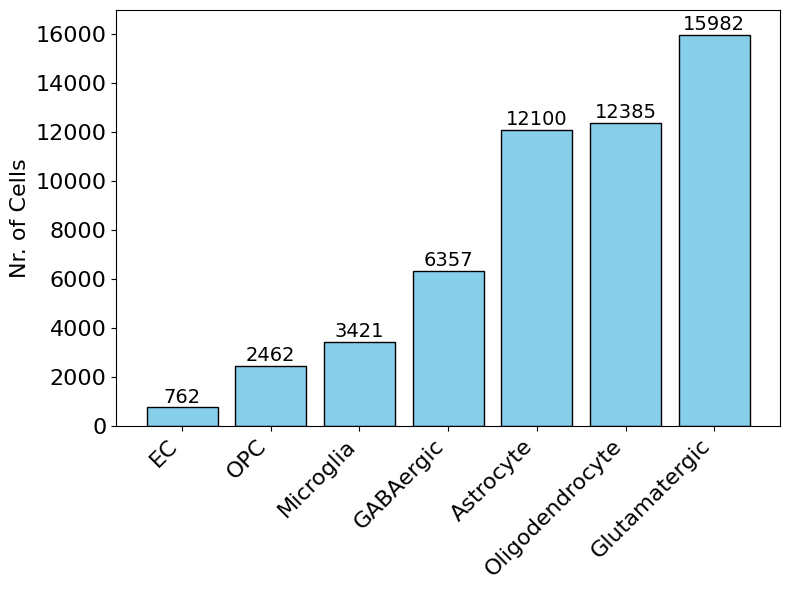

Plot saved at: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/cell_counts_major_cell_type_snRNASeqdata_R1QM3.png


In [12]:
#### Question minor 3 reviewer 1 to make a bar plot for the number of cells per cell type in snRNASeq data
import matplotlib.pyplot as plt

# Data
cell_types = ['OPC', 'GABAergic', 'Microglia', 'EC', 'Glutamatergic', 'Astrocyte', 'Oligodendrocyte']
counts = [2462, 6357, 3421, 762, 15982, 12100, 12385]

# Sort the data by counts in ascending order
sorted_data = sorted(zip(counts, cell_types))
sorted_counts, sorted_cell_types = zip(*sorted_data)

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(sorted_cell_types, sorted_counts, color='skyblue', edgecolor='black')

# Add labels and title
plt.ylabel('Nr. of Cells', fontsize=16)

# Rotate x-axis labels by 45 degrees and set increased font size
plt.xticks(fontsize=16, rotation=45, ha='right')
plt.yticks(fontsize=16)

# Adjust the y-axis limit
plt.ylim(0, 17000)

# Annotate bar values with increased font size
for i, count in enumerate(sorted_counts):
    plt.text(i, count + 200, str(count), ha='center', fontsize=14)

# Save the plot
output_path = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/cell_counts_major_cell_type_snRNASeqdata_R1QM3.png"
plt.tight_layout()
plt.savefig(output_path, dpi=300)  # Save with high resolution (300 dpi)

# Show the plot
plt.show()

print(f"Plot saved at: {output_path}")


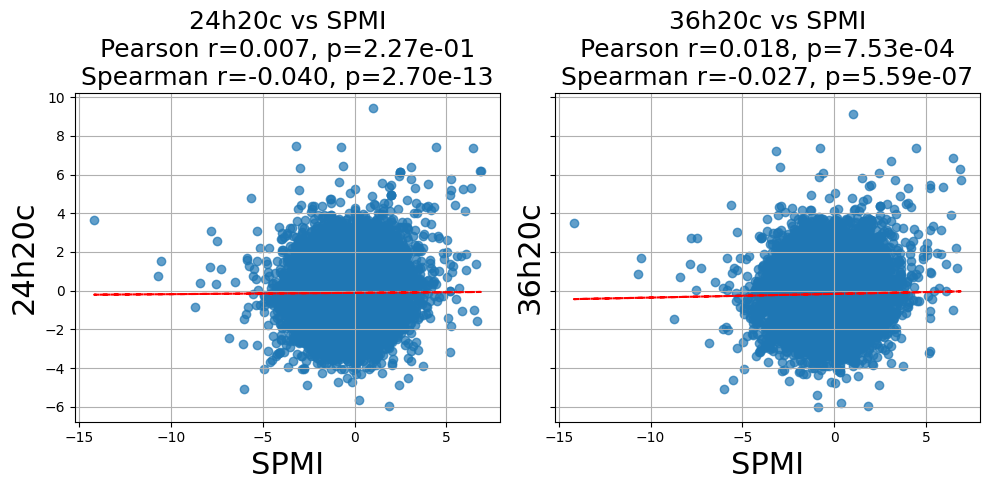

Correlation plots saved successfully at C:\Users\labuser\Downloads\Moein\UK DRI\new_aligned_samples\Sanity_check\Writing\Response to Nat Comm reviewers Dec 2024\SPMI_vs_24h20c_and_SPMI_vs_36h20c_correlation_plots.png.


In [43]:
#### This section addresses question 23 from reviewer 4 in which the reviewer is asking why we used 200 genes for the figure 3E and not whole transcriptome.

#### LPMI vs 24h20c and 36h20c correlation analysis

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr

# Define the paths to the input files
file1_path_24h = r"C:\Users\labuser\Downloads\Moein\UK DRI\new_aligned_samples\new_DEG_analysis_new_aligned_samples\24h_20c_vs_0h_outlier_removed_DEseq2_results.xlsx"
file1_path_36h = r"C:\Users\labuser\Downloads\Moein\UK DRI\new_aligned_samples\new_DEG_analysis_new_aligned_samples\36h_20c_vs_0h_DEseq2_results.xlsx"
file2_path = r"C:\Users\labuser\Downloads\Moein\UK DRI\new_aligned_samples\Sanity_check\low_PMI_vs_0h_DESeq2_result.xlsx"
plot_output_path = r"C:\Users\labuser\Downloads\Moein\UK DRI\new_aligned_samples\Sanity_check\Writing\Response to Nat Comm reviewers Dec 2024\SPMI_vs_24h20c_and_SPMI_vs_36h20c_correlation_plots.png"

# Ensure the output directory exists
os.makedirs(os.path.dirname(plot_output_path), exist_ok=True)

def process_and_plot(file1_path, file2_path, suffix, ax):
    # Read the first sheets of both Excel files
    df1 = pd.read_excel(file1_path, sheet_name=0)
    df2 = pd.read_excel(file2_path, sheet_name=0)

    # Clean TranscriptIDs in df2 to ignore anything after "."
    df2["TranscriptID"] = df2["TranscriptID"].str.split(".").str[0]

    # Merge the two dataframes on the "TranscriptID" column
    merged_df = pd.merge(df1, df2, on="TranscriptID", suffixes=(f"_{suffix}", "_LPMI"))

    # Create the output dataframe with common TranscriptID and corresponding log2FoldChange values
    output_df = merged_df[["TranscriptID", f"log2FoldChange_LPMI", f"log2FoldChange_{suffix}"]]

    # Rename the columns as per the requirements
    output_df.columns = ["TranscriptID", "SPMI", suffix]

    # Remove the row with the lowest value on the specified axis
    output_df = output_df.drop(output_df[suffix].idxmin())

    # Calculate Pearson and Spearman correlations
    pearson_corr, pearson_pval = pearsonr(output_df["SPMI"], output_df[suffix])
    spearman_corr, spearman_pval = spearmanr(output_df["SPMI"], output_df[suffix])

    # Scatter plot
    ax.scatter(output_df["SPMI"], output_df[suffix], alpha=0.7)
    m, b = np.polyfit(output_df["SPMI"], output_df[suffix], 1)
    ax.plot(output_df["SPMI"], m * output_df["SPMI"] + b, color='red', linestyle='--')
    ax.set_title(f"{suffix} vs SPMI\nPearson r={pearson_corr:.3f}, p={pearson_pval:.2e}\nSpearman r={spearman_corr:.3f}, p={spearman_pval:.2e}", fontsize=18)
    ax.set_xlabel("SPMI", fontsize=22)
    ax.set_ylabel(suffix, fontsize=22)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.grid(True)

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Process and plot for 24h and 36h
process_and_plot(file1_path_24h, file2_path, "24h20c", axes[0])
process_and_plot(file1_path_36h, file2_path, "36h20c", axes[1])

# Adjust layout and save plots
plt.tight_layout()
plt.savefig(plot_output_path)
plt.show()

print(f"Correlation plots saved successfully at {plot_output_path}.")


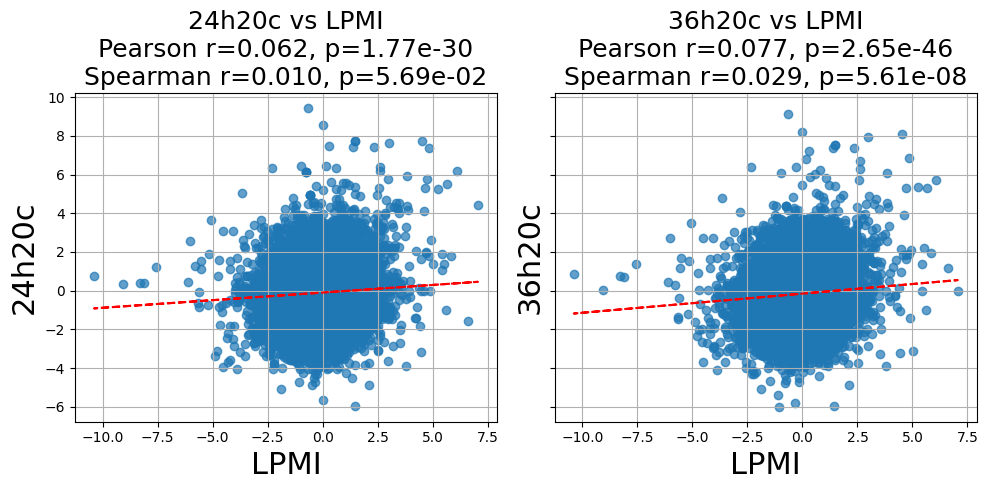

Correlation plots saved successfully at C:\Users\labuser\Downloads\Moein\UK DRI\new_aligned_samples\Sanity_check\Writing\Response to Nat Comm reviewers Dec 2024\LPMI_vs_24h20c_and_LPMI_vs_36h20c_correlation_plots.png.


In [45]:
#### This is continue of previuos code chunck

### HPMI vs 24h20c and 36h20c correlation analysis

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr

# Define the paths to the input files
file1_path_24h = r"C:\Users\labuser\Downloads\Moein\UK DRI\new_aligned_samples\new_DEG_analysis_new_aligned_samples\24h_20c_vs_0h_outlier_removed_DEseq2_results.xlsx"
file1_path_36h = r"C:\Users\labuser\Downloads\Moein\UK DRI\new_aligned_samples\new_DEG_analysis_new_aligned_samples\36h_20c_vs_0h_DEseq2_results.xlsx"
file2_path = r"C:\Users\labuser\Downloads\Moein\UK DRI\new_aligned_samples\Sanity_check\HighPMI_final_samples_vs_surgery_control_DESeq2_results.xlsx"
plot_output_path = r"C:\Users\labuser\Downloads\Moein\UK DRI\new_aligned_samples\Sanity_check\Writing\Response to Nat Comm reviewers Dec 2024\LPMI_vs_24h20c_and_LPMI_vs_36h20c_correlation_plots.png"

# Ensure the output directory exists
os.makedirs(os.path.dirname(plot_output_path), exist_ok=True)

def process_and_plot(file1_path, file2_path, suffix, ax):
    # Read the first sheets of both Excel files
    df1 = pd.read_excel(file1_path, sheet_name=0)
    df2 = pd.read_excel(file2_path, sheet_name=0)

    # Clean TranscriptIDs in df2 to ignore anything after "."
    df2["TranscriptID"] = df2["TranscriptID"].str.split(".").str[0]

    # Merge the two dataframes on the "TranscriptID" column
    merged_df = pd.merge(df1, df2, on="TranscriptID", suffixes=(f"_{suffix}", "_LPMI"))

    # Create the output dataframe with common TranscriptID and corresponding log2FoldChange values
    output_df = merged_df[["TranscriptID", f"log2FoldChange_LPMI", f"log2FoldChange_{suffix}"]]

    # Rename the columns as per the requirements
    output_df.columns = ["TranscriptID", "LPMI", suffix]

    # Remove the row with the lowest value on the specified axis
    output_df = output_df.drop(output_df[suffix].idxmin())

    # Calculate Pearson and Spearman correlations
    pearson_corr, pearson_pval = pearsonr(output_df["LPMI"], output_df[suffix])
    spearman_corr, spearman_pval = spearmanr(output_df["LPMI"], output_df[suffix])

    # Scatter plot
    ax.scatter(output_df["LPMI"], output_df[suffix], alpha=0.7)
    m, b = np.polyfit(output_df["LPMI"], output_df[suffix], 1)
    ax.plot(output_df["LPMI"], m * output_df["LPMI"] + b, color='red', linestyle='--')
    ax.set_title(f"{suffix} vs LPMI\nPearson r={pearson_corr:.3f}, p={pearson_pval:.2e}\nSpearman r={spearman_corr:.3f}, p={spearman_pval:.2e}", fontsize=18)
    ax.set_xlabel("LPMI", fontsize=22)
    ax.set_ylabel(suffix, fontsize=22)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.grid(True)

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Process and plot for 24h and 36h
process_and_plot(file1_path_24h, file2_path, "24h20c", axes[0])
process_and_plot(file1_path_36h, file2_path, "36h20c", axes[1])

# Adjust layout and save plots
plt.tight_layout()
plt.savefig(plot_output_path)
plt.show()

print(f"Correlation plots saved successfully at {plot_output_path}.")


In [10]:
### In this section I want to know between "Age" and "Group" of the samples (LPMI or CTRL) which one is the major drivers of the samples separation. Based on the hierarchial clustering age is not the major determinant 
### but based on the PCA it seems the age is second important variable or sample separation. 
### to do so, I need to perform a linear regression on PC1 Values and then Check the p-value and coefficient for each independent variable to see their individual contributions to PC1.
### also I need to check the R-squared value to assess how well the model explains the variation in PC1.
### If the model shows a stronger effect (larger coefficient, lower p-value) for Group than Age, this suggests group differences are more influential. If Age is stronger, age is the primary driver.

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import statsmodels.api as sm
import os
import matplotlib.pyplot as plt
import seaborn as sns

# =============================================================================
# 1) Load Data
# =============================================================================
file_dir = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/"

# Load the expression matrix and metadata
expr_df = pd.read_csv(file_dir + "LPMI_CTRL_DESeq2_normalized_counts_covaraite_considered_for_revised_fig1C.csv", index_col=0)
meta_df = pd.read_csv(file_dir + "LPMI_CTRL_DESeq2_normalized_counts_covaraite_considered_metadata_for_revised_PCA_R1QM1.csv", index_col=0)

# =============================================================================
# 2) Transpose the expression matrix if necessary
# =============================================================================
if expr_df.shape[0] > expr_df.shape[1]:
    expr_df = expr_df.T

print(f"Expression matrix shape: {expr_df.shape} (samples x genes)")
print(f"Metadata shape: {meta_df.shape} (samples x variables)")

# =============================================================================
# 3) Ensure alignment of metadata and expression data
# =============================================================================
meta_df = meta_df.reindex(expr_df.index)
assert expr_df.index.equals(meta_df.index), "Sample names in expression and metadata do not match!"

# =============================================================================
# 4) Perform PCA (Only Extract PC1)
# =============================================================================
pca = PCA(n_components=1)  # Extracting only PC1
pca_scores = pca.fit_transform(expr_df)

# Add PC1 to the metadata
meta_df['PC1'] = pca_scores[:, 0]

explained_variance = pca.explained_variance_ratio_[0] * 100
print(f"PC1 explains {explained_variance:.2f}% of variance")

# =============================================================================
# 5) Handle Missing or Non-Numeric Data
# =============================================================================
print(meta_df[['Age', 'Group', 'PC1']].isnull().sum())  # Check for missing values
meta_df = meta_df.dropna(subset=['Age', 'Group', 'PC1'])  # Drop missing values

# Ensure all columns are numeric
meta_df['Age'] = pd.to_numeric(meta_df['Age'], errors='coerce')
meta_df['PC1'] = pd.to_numeric(meta_df['PC1'], errors='coerce')

# =============================================================================
# 6) Prepare Data for Regression
# =============================================================================
# Independent variables (predictors)
X = meta_df[['Age', 'Group']]
X = pd.get_dummies(X, columns=['Group'], drop_first=True)  # One-hot encode 'Group'

# Add a constant for the intercept
X = sm.add_constant(X)

# Dependent variable
y_pc1 = meta_df['PC1']

# Convert to numeric if necessary
X = X.astype(float)
y_pc1 = y_pc1.astype(float)

# =============================================================================
# 7) Fit Regression Model (PC1 Only)
# =============================================================================
model_pc1 = sm.OLS(y_pc1, X).fit()

# Extract coefficients and p-values for Age and Group
group_coeff = model_pc1.params['Group_LPMI']
age_coeff = model_pc1.params['Age']
group_pval = model_pc1.pvalues['Group_LPMI']
age_pval = model_pc1.pvalues['Age']

# =============================================================================
# 8) Save Regression Results as CSV (Only for PC1)
# =============================================================================
pc1_results = pd.DataFrame({
    "Variable": model_pc1.params.index,
    "Coefficient": model_pc1.params.values,
    "Std. Error": model_pc1.bse.values,
    "p-value": model_pc1.pvalues.values,
})

# Save results
csv_filename = file_dir + "LPMI_CTRL_Regression_Results_PC1.csv"
pc1_results.to_csv(csv_filename, index=False)

print(f"Regression results saved as: {csv_filename}")

# =============================================================================
# 9) Generate & Save Combined Annotated Figure (Group + Age Effect)
# =============================================================================
plt.figure(figsize=(6, 5))

# Boxplot for Group Effect
sns.boxplot(x=meta_df["Group"], y=meta_df["PC1"], palette="coolwarm", width=0.6, showcaps=False)

# Scatter plot overlay (jittered points to show Age distribution)
sns.stripplot(x=meta_df["Group"], y=meta_df["PC1"], hue=meta_df["Age"], palette="viridis", dodge=True, jitter=True, size=8, alpha=0.75)

# Add title and labels
plt.title("PC1 Distribution by Group & Age Effect")
plt.xlabel("Group", fontsize=16)
plt.ylabel("PC1 Value")

# Increase font size for X and Y axis numbers
plt.xticks(fontsize=16)  # Increase font size of X-axis numbers
plt.yticks(fontsize=16)  # Increase font size of Y-axis numbers

# Add annotations for coefficients and p-values
plt.annotate(
    f"Group Coefficient: {group_coeff:.2f}\n(p={group_pval:.2e})", 
    xy=(0.05, 0.9), 
    xycoords="axes fraction", 
    fontsize=12, 
    color="black"
)
plt.annotate(
    f"Age Coefficient: {age_coeff:.2f}\n(p={age_pval:.2e})", 
    xy=(0.05, 0.8), 
    xycoords="axes fraction", 
    fontsize=12, 
    color="black"
)

# Add legend for Age color
plt.legend(title="Age", bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the figure
combined_figure_filename = file_dir + "LPMI_CTRL_PC1_Group_Age_Effect_Annotated_Coefficients_Pvalues.png"
plt.tight_layout()
plt.savefig(combined_figure_filename, dpi=300)
plt.close()

print(f"Combined annotated figure (Group + Age effect) saved as: {combined_figure_filename}")


Expression matrix shape: (35, 62703) (samples x genes)
Metadata shape: (35, 4) (samples x variables)
PC1 explains 34.81% of variance
Age      0
Group    0
PC1      0
dtype: int64
Regression results saved as: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/LPMI_CTRL_Regression_Results_PC1.csv


C:\Users\labuser\AppData\Local\Temp\ipykernel_20844\2546988217.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=meta_df["Group"], y=meta_df["PC1"], palette="coolwarm", width=0.6, showcaps=False)


Combined annotated figure (Group + Age effect) saved as: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/LPMI_CTRL_PC1_Group_Age_Effect_Annotated_Coefficients_Pvalues.png


In [5]:
### In this section I want to know if 'age' is the primary driver of the samples separation between LPMI or CTRL samples when focusing on samples from the same age range. 
### to do so, I need to perform a linear regression on PC1 values (from figure 1C of the main text) and then check the p-value and coefficient for each independent variable ("age" and "group") to see their 
### individual contributions to PC1 and also I need to check the R-squared value to assess how well the model explains the variation in PC1.
### If the model shows a stronger effect (larger coefficient, lower p-value) for Group than Age, this suggests group differences are more influential. If Age is stronger, age is the primary driver.

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import statsmodels.api as sm
import os
import matplotlib.pyplot as plt
import seaborn as sns

# =============================================================================
# 1) Load Data
# =============================================================================
file_dir = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/"

# Load the expression matrix and metadata
expr_df = pd.read_csv(file_dir + "LPMI_CTRL_DESeq2_normalized_counts_covaraite_considered_for_revised_R1Q2_PCA_regression.csv", index_col=0)
meta_df = pd.read_csv(file_dir + "LPMI_CTRL_DESeq2_normalized_counts_for_revised_R1Q2_PCA_regression_metadata.csv", index_col=0)

# =============================================================================
# 2) Transpose the expression matrix if necessary
# =============================================================================
if expr_df.shape[0] > expr_df.shape[1]:
    expr_df = expr_df.T

print(f"Expression matrix shape: {expr_df.shape} (samples x genes)")
print(f"Metadata shape: {meta_df.shape} (samples x variables)")

# =============================================================================
# 3) Ensure alignment of metadata and expression data
# =============================================================================
meta_df = meta_df.reindex(expr_df.index)
assert expr_df.index.equals(meta_df.index), "Sample names in expression and metadata do not match!"

# =============================================================================
# 4) Perform PCA (Only Extract PC1)
# =============================================================================
pca = PCA(n_components=1)  # Extracting only PC1
pca_scores = pca.fit_transform(expr_df)

# Add PC1 to the metadata
meta_df['PC1'] = pca_scores[:, 0]

explained_variance = pca.explained_variance_ratio_[0] * 100
print(f"PC1 explains {explained_variance:.2f}% of variance")

# =============================================================================
# 5) Handle Missing or Non-Numeric Data
# =============================================================================
print(meta_df[['Age', 'Group', 'PC1']].isnull().sum())  # Check for missing values
meta_df = meta_df.dropna(subset=['Age', 'Group', 'PC1'])  # Drop missing values

# Ensure all columns are numeric
meta_df['Age'] = pd.to_numeric(meta_df['Age'], errors='coerce')
meta_df['PC1'] = pd.to_numeric(meta_df['PC1'], errors='coerce')

# =============================================================================
# 6) Prepare Data for Regression
# =============================================================================
# Independent variables (predictors)
X = meta_df[['Age', 'Group']]
X = pd.get_dummies(X, columns=['Group'], drop_first=True)  # One-hot encode 'Group'

# Add a constant for the intercept
X = sm.add_constant(X)

# Dependent variable
y_pc1 = meta_df['PC1']

# Convert to numeric if necessary
X = X.astype(float)
y_pc1 = y_pc1.astype(float)

# =============================================================================
# 7) Fit Regression Model (PC1 Only)
# =============================================================================
model_pc1 = sm.OLS(y_pc1, X).fit()

# Extract coefficients and p-values for Age and Group
group_coeff = model_pc1.params['Group_LPMI']
age_coeff = model_pc1.params['Age']
group_pval = model_pc1.pvalues['Group_LPMI']
age_pval = model_pc1.pvalues['Age']

# =============================================================================
# 8) Save Regression Results as CSV (Only for PC1)
# =============================================================================
pc1_results = pd.DataFrame({
    "Variable": model_pc1.params.index,
    "Coefficient": model_pc1.params.values,
    "Std. Error": model_pc1.bse.values,
    "p-value": model_pc1.pvalues.values,
})

# Save results
csv_filename = file_dir + "LPMI_CTRL_Regression_Results_PC1.csv"
pc1_results.to_csv(csv_filename, index=False)

print(f"Regression results saved as: {csv_filename}")

# =============================================================================
# 9) Generate & Save Combined Annotated Figure (Group + Age Effect)
# =============================================================================
plt.figure(figsize=(6, 5))

# Boxplot for Group Effect
sns.boxplot(x=meta_df["Group"], y=meta_df["PC1"], palette="coolwarm", width=0.6, showcaps=False)

# Scatter plot overlay (jittered points to show Age distribution)
sns.stripplot(x=meta_df["Group"], y=meta_df["PC1"], hue=meta_df["Age"], palette="viridis", dodge=True, jitter=True, size=8, alpha=0.75)

# Add title and labels
plt.title("PC1 Distribution by Group & Age Effect")
plt.xlabel("Group", fontsize=16)
plt.ylabel("PC1 Value", fontsize=16)

# Increase font size for X and Y axis numbers
plt.xticks(fontsize=16)  # Increase font size of X-axis numbers
plt.yticks(fontsize=16)  # Increase font size of Y-axis numbers

# Add annotations for coefficients and p-values
plt.annotate(
    f"Group Coefficient: {group_coeff:.2f}\n(p={group_pval:.2e})", 
    xy=(0.05, 0.9), 
    xycoords="axes fraction", 
    fontsize=12, 
    color="black"
)
plt.annotate(
    f"Age Coefficient: {age_coeff:.2f}\n(p={age_pval:.2e})", 
    xy=(0.05, 0.8), 
    xycoords="axes fraction", 
    fontsize=12, 
    color="black"
)

# Add legend for Age color
plt.legend(title="Age", bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the figure
combined_figure_filename = file_dir + "LPMI_CTRL_PC1_Group_Age_Effect_Annotated_Coefficients_Pvalues_similar_age_samples.png"
plt.tight_layout()
plt.savefig(combined_figure_filename, dpi=300)
plt.close()

print(f"Combined annotated figure (Group + Age effect) saved as: {combined_figure_filename}")

Expression matrix shape: (18, 62703) (samples x genes)
Metadata shape: (18, 4) (samples x variables)
PC1 explains 35.81% of variance
Age      0
Group    0
PC1      0
dtype: int64
Regression results saved as: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/LPMI_CTRL_Regression_Results_PC1.csv


C:\Users\labuser\AppData\Local\Temp\ipykernel_18804\4097879458.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=meta_df["Group"], y=meta_df["PC1"], palette="coolwarm", width=0.6, showcaps=False)


Combined annotated figure (Group + Age effect) saved as: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/LPMI_CTRL_PC1_Group_Age_Effect_Annotated_Coefficients_Pvalues_similar_age_samples.png


CTRL Normality (Shapiro-Wilk): ShapiroResult(statistic=0.9171943068504333, pvalue=0.36951813101768494)
LPMI Normality (Shapiro-Wilk): ShapiroResult(statistic=0.8994172811508179, pvalue=0.24864089488983154)
T-Test Results: p-value = 0.05560352851222611


C:\Users\labuser\AppData\Local\Temp\ipykernel_20844\2734540599.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y='Age', data=data, palette='Set3', inner='box')


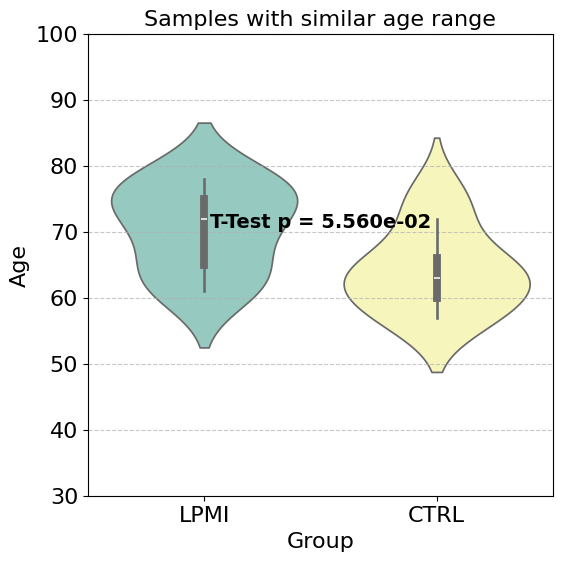

Violin plot saved to C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/LPMI-CTRL-age-t-test-similar-ages-ttest-violin.png


In [4]:
### making a violin plot for the LMPI and CTRL samples that do not have significant age difference between them for R1Q2

import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu, shapiro
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
data = pd.read_csv('C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/LPMI-CTRL-age-t-test_similar_ages.csv')

# Split the data into CTRL and LPMI groups
ctrl_group = data[data['Group'] == 'CTRL']['Age']
lpmi_group = data[data['Group'] == 'LPMI']['Age']

# Step 1: Test for normality (Shapiro-Wilk test)
ctrl_normality = shapiro(ctrl_group)
lpmi_normality = shapiro(lpmi_group)

print("CTRL Normality (Shapiro-Wilk):", ctrl_normality)
print("LPMI Normality (Shapiro-Wilk):", lpmi_normality)

# Step 2: Decide on the test based on normality and calculate the p-value
if ctrl_normality.pvalue > 0.05 and lpmi_normality.pvalue > 0.05:
    # Perform t-test if both groups are normally distributed
    t_stat, p_value = ttest_ind(ctrl_group, lpmi_group)
    test_used = "T-Test"
else:
    # Perform Mann-Whitney U test if normality assumption is violated
    mw_stat, p_value = mannwhitneyu(ctrl_group, lpmi_group, alternative='two-sided')
    test_used = "Mann-Whitney U Test"

print(f"{test_used} Results: p-value =", p_value)

# Step 3: Plot the violin plot with p-value annotation
plt.figure(figsize=(6, 6))  # Narrow plot

# Create the violin plot
sns.violinplot(x='Group', y='Age', data=data, palette='Set3', inner='box')

# Adjust Y-axis range to 30-100
plt.ylim(30, 100)

# Increase font sizes for tick labels
plt.xticks(fontsize=16)  # Increase font size of X-axis numbers
plt.yticks(fontsize=16)  # Increase font size of Y-axis numbers

# Add the p-value inside the plot (adjust position)
x1, x2 = 0, 1  # Positions of the groups on the x-axis
y_position = max(data['Age']) - 5  # Position p-value 5 units below the max age
plt.text((x1 + x2) / 2, y_position, f"{test_used} p = {p_value:.3e}", 
         ha='center', va='top', color='black', fontsize=14, fontweight='bold')

# Add labels and title with larger fonts
plt.title('Samples with similar age range', fontsize=16)
plt.xlabel('Group', fontsize=16)
plt.ylabel('Age', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot
output_path = 'C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/LPMI-CTRL-age-t-test-similar-ages-ttest-violin.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"Violin plot saved to {output_path}")


CTRL Normality (Shapiro-Wilk): ShapiroResult(statistic=0.9816122055053711, pvalue=0.97032630443573)
LPMI Normality (Shapiro-Wilk): ShapiroResult(statistic=0.9629554152488708, pvalue=0.6595394611358643)
T-Test Results: p-value = 3.402390917338893e-07


C:\Users\labuser\AppData\Local\Temp\ipykernel_18804\2061226194.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y='Age', data=data, palette='Set3', inner='box')


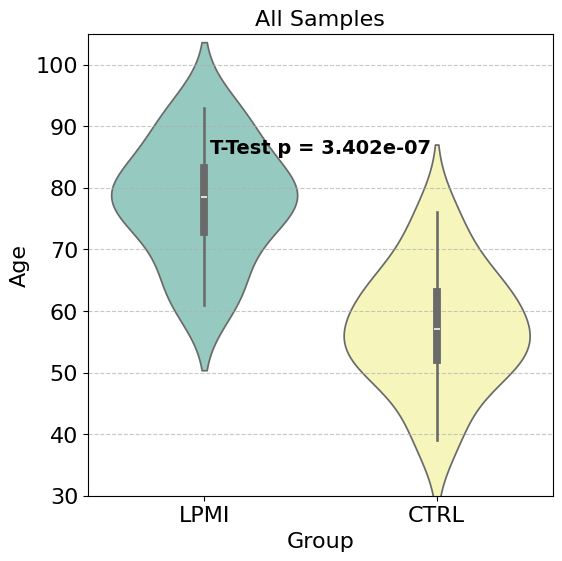

Violin plot saved to C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/LPMI-CTRL-age-t-test-all-samples-ttest-violin.png


In [18]:
### making a violin plot for the all LMPI and CTRL samples to show that that there is significant age difference between them for R1Q2

import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu, shapiro
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
data = pd.read_csv('C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/LPMI-CTRL-age-t-test.csv')

# Split the data into CTRL and LPMI groups
ctrl_group = data[data['Group'] == 'CTRL']['Age']
lpmi_group = data[data['Group'] == 'LPMI']['Age']

# Step 1: Test for normality (Shapiro-Wilk test)
ctrl_normality = shapiro(ctrl_group)
lpmi_normality = shapiro(lpmi_group)

print("CTRL Normality (Shapiro-Wilk):", ctrl_normality)
print("LPMI Normality (Shapiro-Wilk):", lpmi_normality)

# Step 2: Decide on the test based on normality and calculate the p-value
if ctrl_normality.pvalue > 0.05 and lpmi_normality.pvalue > 0.05:
    # Perform t-test if both groups are normally distributed
    t_stat, p_value = ttest_ind(ctrl_group, lpmi_group)
    test_used = "T-Test"
else:
    # Perform Mann-Whitney U test if normality assumption is violated
    mw_stat, p_value = mannwhitneyu(ctrl_group, lpmi_group, alternative='two-sided')
    test_used = "Mann-Whitney U Test"

print(f"{test_used} Results: p-value =", p_value)

# Step 3: Plot the violin plot with p-value annotation
plt.figure(figsize=(6, 6))  # Narrow plot

# Create the violin plot
sns.violinplot(x='Group', y='Age', data=data, palette='Set3', inner='box')

# Adjust Y-axis range to 30-100
plt.ylim(30, 105)

# Increase font sizes for tick labels
plt.xticks(fontsize=16)  # Increase font size of X-axis numbers
plt.yticks(fontsize=16)  # Increase font size of Y-axis numbers

# Add the p-value inside the plot (adjust position)
x1, x2 = 0, 1  # Positions of the groups on the x-axis
y_position = max(data['Age']) - 5  # Position p-value 5 units below the max age
plt.text((x1 + x2) / 2, y_position, f"{test_used} p = {p_value:.3e}", 
         ha='center', va='top', color='black', fontsize=14, fontweight='bold')

# Add labels and title with larger fonts
plt.title('All Samples', fontsize=16)
plt.xlabel('Group', fontsize=16)
plt.ylabel('Age', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot
output_path = 'C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/LPMI-CTRL-age-t-test-all-samples-ttest-violin.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"Violin plot saved to {output_path}")


Expression matrix shape: (18, 62703) (samples x genes)
Metadata shape: (18, 4) (samples x variables)
PC1 explains 35.81% of variance
Age      0
Group    0
PC1      0
dtype: int64
Regression results saved as: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/LPMI_CTRL_Regression_Results_PC1.csv


C:\Users\labuser\AppData\Local\Temp\ipykernel_20844\2808352276.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=meta_df["Group"], y=meta_df["PC1"], palette="coolwarm", width=0.6, showcaps=False)


Combined annotated figure (Group + Age effect) saved as: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/LPMI_CTRL_PC1_Group_Age_Effect_Annotated_Coefficients_Pvalues_similar_age_samples.png


<Figure size 800x800 with 0 Axes>

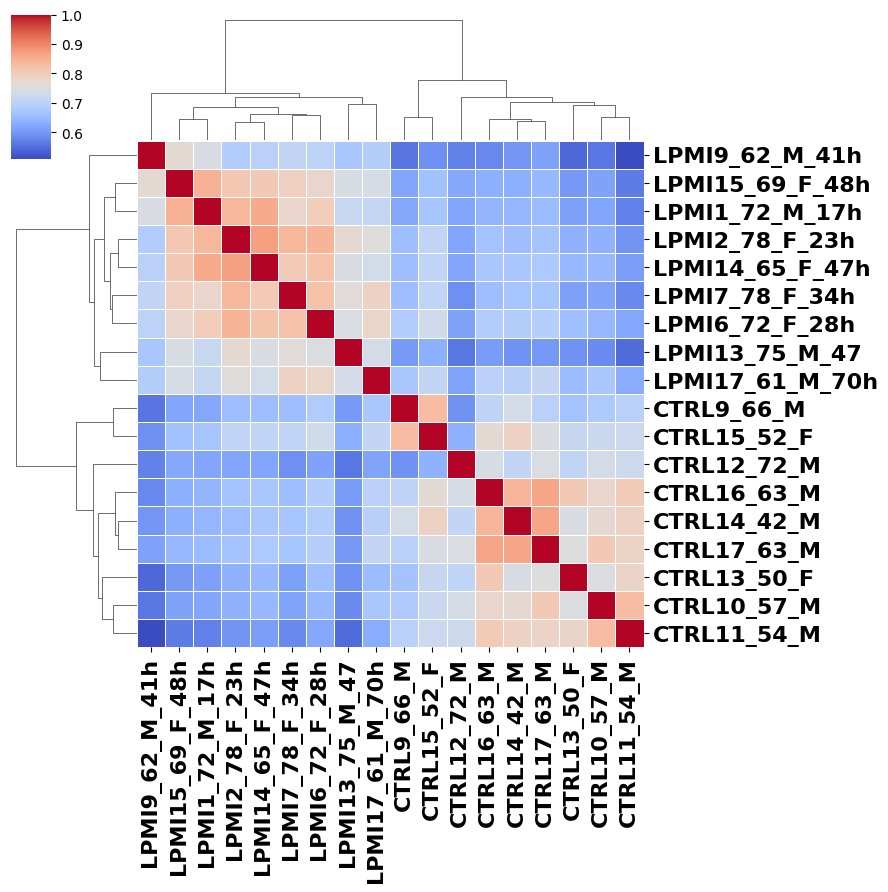

Heatmap with hierarchical clustering saved to: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/HighPMI_Jaccard_Correlation_Heatmap.png


In [4]:
#### Plot heatmap with hierarchical clustering for Jaccard similarity matrix of the niormalized read counts (covarites considered) for the LPMI and CTRL samples with similar age for R1 Q2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage

# =============================================================================
# 1) Load the Jaccard Correlation Data
# =============================================================================
file_dir = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/"
file_path = file_dir + "HighPMI_final_samples_and_control_samples_Jaccard_correlation_results_similar_ages_R1Q2.csv"

# Read the CSV file (assuming samples are rows & columns represent similarity values)
data = pd.read_csv(file_path, index_col=0)  # Ensure first column is treated as index

# =============================================================================
# 2) Perform Hierarchical Clustering
# =============================================================================
# Convert Jaccard correlation matrix to a distance matrix (1 - correlation)
distance_matrix = 1 - data

# Compute hierarchical clustering using Ward's method
linkage_matrix = linkage(squareform(distance_matrix), method="ward")

# =============================================================================
# 3) Plot Heatmap with Larger, Bold Sample Names
# =============================================================================
plt.figure(figsize=(8, 8))  # Increase figure size

# Create the heatmap with hierarchical clustering
g = sns.clustermap(
    data, 
    row_linkage=linkage_matrix, 
    col_linkage=linkage_matrix, 
    cmap="coolwarm", 
    linewidths=0.5, 
    figsize=(8, 8)
)

# Increase the font size of sample names (row and column labels)
for item in g.ax_heatmap.get_yticklabels():
    item.set_fontsize(16)  # Adjust font size for sample names
    item.set_weight("bold")  # Make sample names bold

for item in g.ax_heatmap.get_xticklabels():
    item.set_fontsize(16)  # Adjust font size for sample names
    item.set_weight("bold")  # Make sample names bold
    item.set_rotation(90)  # Rotate x-axis labels for better readability

# Save the heatmap
heatmap_output_path = file_dir + "HPMI_and_CTRL_samples_similar_ages_Jaccard_clustering_heatmap_R1Q2.png"
plt.savefig(heatmap_output_path, dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

print(f"Heatmap with hierarchical clustering saved to: {heatmap_output_path}")


In [20]:
### In this section I want know if the RIN values has any effect of separation of the LPMI and CTRL samples. Based on the hierarchial clustering RIN is not the major determinant 
### to do so, I need to perform a linear regression on PC1 values (from figure 1C of the main text) and then check the p-value and coefficient for each independent variable ("RIN" and "group") to see their 
### individual contributions to PC1 and also I need to check the R-squared value to assess how well the model explains the variation in PC1.
### If the model shows a stronger effect (larger coefficient, lower p-value) for Group than RIN, this suggests group differences are more influential. If RIN is stronger, age is the primary driver.

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import statsmodels.api as sm
import os
import matplotlib.pyplot as plt
import seaborn as sns

# =============================================================================
# 1) Load Data
# =============================================================================
file_dir = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/"

# Load the expression matrix and metadata
expr_df = pd.read_csv(file_dir + "LPMI_CTRL_DESeq2_normalized_counts_covaraite_considered_for_revised_fig1C.csv", index_col=0)
meta_df = pd.read_csv(file_dir + "LPMI_CTRL_DESeq2_normalized_counts_covaraite_considered_metadata_for_revised_PCA_R1QM1.csv", index_col=0)

# =============================================================================
# 2) Transpose the expression matrix if necessary
# =============================================================================
if expr_df.shape[0] > expr_df.shape[1]:
    expr_df = expr_df.T

print(f"Expression matrix shape: {expr_df.shape} (samples x genes)")
print(f"Metadata shape: {meta_df.shape} (samples x variables)")

# =============================================================================
# 3) Ensure alignment of metadata and expression data
# =============================================================================
meta_df = meta_df.reindex(expr_df.index)
assert expr_df.index.equals(meta_df.index), "Sample names in expression and metadata do not match!"

# =============================================================================
# 4) Perform PCA (Only Extract PC1)
# =============================================================================
pca = PCA(n_components=1)  # Extracting only PC1
pca_scores = pca.fit_transform(expr_df)

# Add PC1 to the metadata
meta_df['PC1'] = pca_scores[:, 0]

explained_variance = pca.explained_variance_ratio_[0] * 100
print(f"PC1 explains {explained_variance:.2f}% of variance")

# =============================================================================
# 5) Handle Missing or Non-Numeric Data
# =============================================================================
print(meta_df[['RIN', 'Group', 'PC1']].isnull().sum())  # Check for missing values
meta_df = meta_df.dropna(subset=['RIN', 'Group', 'PC1'])  # Drop missing values

# Ensure all columns are numeric
meta_df['RIN'] = pd.to_numeric(meta_df['RIN'], errors='coerce')
meta_df['PC1'] = pd.to_numeric(meta_df['PC1'], errors='coerce')

# =============================================================================
# 6) Prepare Data for Regression
# =============================================================================
# Independent variables (predictors)
X = meta_df[['RIN', 'Group']]
X = pd.get_dummies(X, columns=['Group'], drop_first=True)  # One-hot encode 'Group'

# Add a constant for the intercept
X = sm.add_constant(X)

# Dependent variable
y_pc1 = meta_df['PC1']

# Convert to numeric if necessary
X = X.astype(float)
y_pc1 = y_pc1.astype(float)

# =============================================================================
# 7) Fit Regression Model (PC1 Only)
# =============================================================================
model_pc1 = sm.OLS(y_pc1, X).fit()

# Extract coefficients and p-values for RIN and Group
group_coeff = model_pc1.params['Group_LPMI']
rin_coeff = model_pc1.params['RIN']
group_pval = model_pc1.pvalues['Group_LPMI']
rin_pval = model_pc1.pvalues['RIN']

# =============================================================================
# 8) Save Regression Results as CSV (Only for PC1)
# =============================================================================
pc1_results = pd.DataFrame({
    "Variable": model_pc1.params.index,
    "Coefficient": model_pc1.params.values,
    "Std. Error": model_pc1.bse.values,
    "p-value": model_pc1.pvalues.values,
})

# Save results
csv_filename = file_dir + "LPMI_CTRL_Regression_Results_PC1_RIN.csv"
pc1_results.to_csv(csv_filename, index=False)

print(f"Regression results saved as: {csv_filename}")

# =============================================================================
# 9) Generate & Save Combined Annotated Figure (Group + RIN Effect)
# =============================================================================
plt.figure(figsize=(6, 5))

# Boxplot for Group Effect
sns.boxplot(x=meta_df["Group"], y=meta_df["PC1"], palette="coolwarm", width=0.6, showcaps=False)

# Scatter plot overlay (jittered points to show RIN distribution)
sns.stripplot(x=meta_df["Group"], y=meta_df["PC1"], hue=meta_df["RIN"], palette="viridis", dodge=True, jitter=True, size=8, alpha=0.75)

# Add title and labels
plt.title("PC1 Distribution by Group & RIN Effect")
plt.xlabel("Group", fontsize=16)
plt.ylabel("PC1 Value", fontsize=16)

# Increase font size for X and Y axis numbers
plt.xticks(fontsize=16)  # Increase font size of X-axis numbers
plt.yticks(fontsize=16)  # Increase font size of Y-axis numbers

# Add annotations for coefficients and p-values
plt.annotate(
    f"Group Coefficient: {group_coeff:.2f}\n(p={group_pval:.2e})", 
    xy=(0.05, 0.9), 
    xycoords="axes fraction", 
    fontsize=12, 
    color="black"
)
plt.annotate(
    f"RIN Coefficient: {rin_coeff:.2f}\n(p={rin_pval:.2e})", 
    xy=(0.05, 0.8), 
    xycoords="axes fraction", 
    fontsize=12, 
    color="black"
)

# Add legend for RIN color
plt.legend(title="RIN", bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the figure
combined_figure_filename = file_dir + "LPMI_CTRL_PC1_Group_RIN_Effect_Annotated_Coefficients_Pvalues.png"
plt.tight_layout()
plt.savefig(combined_figure_filename, dpi=300)
plt.close()

print(f"Combined annotated figure (Group + RIN effect) saved as: {combined_figure_filename}")



Expression matrix shape: (35, 62703) (samples x genes)
Metadata shape: (35, 4) (samples x variables)
PC1 explains 34.81% of variance
RIN      0
Group    0
PC1      0
dtype: int64
Regression results saved as: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/LPMI_CTRL_Regression_Results_PC1_RIN.csv


C:\Users\labuser\AppData\Local\Temp\ipykernel_18804\2765888334.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=meta_df["Group"], y=meta_df["PC1"], palette="coolwarm", width=0.6, showcaps=False)


Combined annotated figure (Group + RIN effect) saved as: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/LPMI_CTRL_PC1_Group_RIN_Effect_Annotated_Coefficients_Pvalues.png


In [12]:
### In this section I want to know between "Age" and "Group" of the samples (SPMI or CTRL) which one is the major drivers of the samples separation. Based on the hierarchial clustering age is not the major determinant  
### to do so, I need to perform a linear regression on PC1 Values and then Check the p-value and coefficient for each independent variable to see their individual contributions to PC1.
### also I need to check the R-squared value to assess how well the model explains the variation in PC1.
### If the model shows a stronger effect (larger coefficient, lower p-value) for Group than Age, this suggests group differences are more influential. If Age is stronger, age is the primary driver.

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import statsmodels.api as sm
import os
import matplotlib.pyplot as plt
import seaborn as sns

# =============================================================================
# 1) Load Data
# =============================================================================
file_dir = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/"

# Load the expression matrix and metadata
expr_df = pd.read_csv(file_dir + "SPMI_CTRL_DESeq2_normalized_counts_covaraite_considered_for_revised_fig2C.csv", index_col=0)
meta_df = pd.read_csv(file_dir + "SPMI_CTRL_DESeq2_normalized_counts_covaraite_considered_metadata_for_revised_PCA_R1QM1.csv", index_col=0)

# =============================================================================
# 2) Transpose the expression matrix if necessary
# =============================================================================
if expr_df.shape[0] > expr_df.shape[1]:
    expr_df = expr_df.T

print(f"Expression matrix shape: {expr_df.shape} (samples x genes)")
print(f"Metadata shape: {meta_df.shape} (samples x variables)")

# =============================================================================
# 3) Ensure alignment of metadata and expression data
# =============================================================================
meta_df = meta_df.reindex(expr_df.index)
assert expr_df.index.equals(meta_df.index), "Sample names in expression and metadata do not match!"

# =============================================================================
# 4) Perform PCA (Only Extract PC1)
# =============================================================================
pca = PCA(n_components=1)  # Extracting only PC1
pca_scores = pca.fit_transform(expr_df)

# Add PC1 to the metadata
meta_df['PC1'] = pca_scores[:, 0]

explained_variance = pca.explained_variance_ratio_[0] * 100
print(f"PC1 explains {explained_variance:.2f}% of variance")

# =============================================================================
# 5) Handle Missing or Non-Numeric Data
# =============================================================================
print(meta_df[['Age', 'Group', 'PC1']].isnull().sum())  # Check for missing values
meta_df = meta_df.dropna(subset=['Age', 'Group', 'PC1'])  # Drop missing values

# Ensure all columns are numeric
meta_df['Age'] = pd.to_numeric(meta_df['Age'], errors='coerce')
meta_df['PC1'] = pd.to_numeric(meta_df['PC1'], errors='coerce')

# =============================================================================
# 6) Prepare Data for Regression
# =============================================================================
# Independent variables (predictors)
X = meta_df[['Age', 'Group']]
X = pd.get_dummies(X, columns=['Group'], drop_first=True)  # One-hot encode 'Group'

# Add a constant for the intercept
X = sm.add_constant(X)

# Dependent variable
y_pc1 = meta_df['PC1']

# Convert to numeric if necessary
X = X.astype(float)
y_pc1 = y_pc1.astype(float)

# =============================================================================
# 7) Fit Regression Model (PC1 Only)
# =============================================================================
model_pc1 = sm.OLS(y_pc1, X).fit()

# Extract coefficients and p-values for Age and Group
group_coeff = model_pc1.params['Group_SPMI']
age_coeff = model_pc1.params['Age']
group_pval = model_pc1.pvalues['Group_SPMI']
age_pval = model_pc1.pvalues['Age']

# =============================================================================
# 8) Save Regression Results as CSV (Only for PC1)
# =============================================================================
pc1_results = pd.DataFrame({
    "Variable": model_pc1.params.index,
    "Coefficient": model_pc1.params.values,
    "Std. Error": model_pc1.bse.values,
    "p-value": model_pc1.pvalues.values,
})

# Save results
csv_filename = file_dir + "SPMI_CTRL_Regression_Results_PC1.csv"
pc1_results.to_csv(csv_filename, index=False)

print(f"Regression results saved as: {csv_filename}")

# =============================================================================
# 9) Generate & Save Combined Annotated Figure (Group + Age Effect)
# =============================================================================
plt.figure(figsize=(6, 5))

# Boxplot for Group Effect
sns.boxplot(x=meta_df["Group"], y=meta_df["PC1"], palette="coolwarm", width=0.6, showcaps=False)

# Scatter plot overlay (jittered points to show Age distribution)
sns.stripplot(x=meta_df["Group"], y=meta_df["PC1"], hue=meta_df["Age"], palette="viridis", dodge=True, jitter=True, size=8, alpha=0.75)

# Add title and labels
plt.title("PC1 Distribution by Group & Age Effect")
plt.xlabel("Group", fontsize=16)
plt.ylabel("PC1 Value", fontsize=16)

# Increase font size for X and Y axis numbers
plt.xticks(fontsize=16)  # Increase font size of X-axis numbers
plt.yticks(fontsize=16)  # Increase font size of Y-axis numbers

# Add annotations for coefficients and p-values on the right side
plt.annotate(
    f"Group Coefficient: {group_coeff:.2f}\n(p={group_pval:.2e})", 
    xy=(0.95, 0.9),  # Position on the right
    xycoords="axes fraction", 
    fontsize=12, 
    color="black",
    ha="right"  # Align text to the right
)

plt.annotate(
    f"Age Coefficient: {age_coeff:.2f}\n(p={age_pval:.2e})", 
    xy=(0.95, 0.8),  # Move to right side
    xycoords="axes fraction", 
    fontsize=12, 
    color="black",
    ha="right"  # Align text to the right
)


# Add legend for Age color
plt.legend(title="Age", bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the figure
combined_figure_filename = file_dir + "SPMI_CTRL_PC1_Group_Age_Effect_Annotated_Coefficients_Pvalues.png"
plt.tight_layout()
plt.savefig(combined_figure_filename, dpi=300)
plt.close()

print(f"Combined annotated figure (Group + Age effect) saved as: {combined_figure_filename}")

Expression matrix shape: (27, 62703) (samples x genes)
Metadata shape: (27, 4) (samples x variables)
PC1 explains 40.37% of variance
Age      0
Group    0
PC1      0
dtype: int64
Regression results saved as: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/SPMI_CTRL_Regression_Results_PC1.csv


C:\Users\labuser\AppData\Local\Temp\ipykernel_18804\2094245492.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=meta_df["Group"], y=meta_df["PC1"], palette="coolwarm", width=0.6, showcaps=False)


Combined annotated figure (Group + Age effect) saved as: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/SPMI_CTRL_PC1_Group_Age_Effect_Annotated_Coefficients_Pvalues.png


In [19]:
### In this section I want know if the RIN values has any effect of separation of the SPMI and CTRL samples. Based on the hierarchial clustering RIN is not the major determinant 
### to do so, I need to perform a linear regression on PC1 values (from figure 1C of the main text) and then check the p-value and coefficient for each independent variable ("RIN" and "group") to see their 
### individual contributions to PC1 and also I need to check the R-squared value to assess how well the model explains the variation in PC1.
### If the model shows a stronger effect (larger coefficient, lower p-value) for Group than RIN, this suggests group differences are more influential. If RIN is stronger, age is the primary driver.

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import statsmodels.api as sm
import os
import matplotlib.pyplot as plt
import seaborn as sns

# =============================================================================
# 1) Load Data
# =============================================================================
file_dir = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/"

# Load the expression matrix and metadata
expr_df = pd.read_csv(file_dir + "SPMI_CTRL_DESeq2_normalized_counts_covaraite_considered_for_revised_fig2C.csv", index_col=0)
meta_df = pd.read_csv(file_dir + "SPMI_CTRL_DESeq2_normalized_counts_covaraite_considered_metadata_for_revised_PCA_R1QM1.csv", index_col=0)

# =============================================================================
# 2) Transpose the expression matrix if necessary
# =============================================================================
if expr_df.shape[0] > expr_df.shape[1]:
    expr_df = expr_df.T

print(f"Expression matrix shape: {expr_df.shape} (samples x genes)")
print(f"Metadata shape: {meta_df.shape} (samples x variables)")

# =============================================================================
# 3) Ensure alignment of metadata and expression data
# =============================================================================
meta_df = meta_df.reindex(expr_df.index)
assert expr_df.index.equals(meta_df.index), "Sample names in expression and metadata do not match!"

# =============================================================================
# 4) Perform PCA (Only Extract PC1)
# =============================================================================
pca = PCA(n_components=1)  # Extracting only PC1
pca_scores = pca.fit_transform(expr_df)

# Add PC1 to the metadata
meta_df['PC1'] = pca_scores[:, 0]

explained_variance = pca.explained_variance_ratio_[0] * 100
print(f"PC1 explains {explained_variance:.2f}% of variance")

# =============================================================================
# 5) Handle Missing or Non-Numeric Data
# =============================================================================
print(meta_df[['RIN', 'Group', 'PC1']].isnull().sum())  # Check for missing values
meta_df = meta_df.dropna(subset=['RIN', 'Group', 'PC1'])  # Drop missing values

# Ensure all columns are numeric
meta_df['RIN'] = pd.to_numeric(meta_df['RIN'], errors='coerce')
meta_df['PC1'] = pd.to_numeric(meta_df['PC1'], errors='coerce')

# =============================================================================
# 6) Prepare Data for Regression
# =============================================================================
# Independent variables (predictors)
X = meta_df[['RIN', 'Group']]
X = pd.get_dummies(X, columns=['Group'], drop_first=True)  # One-hot encode 'Group'

# Add a constant for the intercept
X = sm.add_constant(X)

# Dependent variable
y_pc1 = meta_df['PC1']

# Convert to numeric if necessary
X = X.astype(float)
y_pc1 = y_pc1.astype(float)

# =============================================================================
# 7) Fit Regression Model (PC1 Only)
# =============================================================================
model_pc1 = sm.OLS(y_pc1, X).fit()

# Extract coefficients and p-values for RIN and Group
group_coeff = model_pc1.params['Group_SPMI']
rin_coeff = model_pc1.params['RIN']
group_pval = model_pc1.pvalues['Group_SPMI']
rin_pval = model_pc1.pvalues['RIN']

# =============================================================================
# 8) Save Regression Results to CSV
# =============================================================================
pc1_results = pd.DataFrame({
    "Variable": model_pc1.params.index,
    "Coefficient": model_pc1.params.values,
    "Std. Error": model_pc1.bse.values,
    "p-value": model_pc1.pvalues.values,
})

# Define file path for saving results
csv_filename = os.path.join(file_dir, "SPMI_CTRL_Regression_Results_PC1_RIN.csv")
pc1_results.to_csv(csv_filename, index=False)
print(f"Regression results saved to: {csv_filename}")

# =============================================================================
# 9) Generate & Save Annotated Figure (Group + RIN Effect)
# =============================================================================
plt.figure(figsize=(6, 5))

# Boxplot for Group Effect
sns.boxplot(x=meta_df["Group"], y=meta_df["PC1"], palette="coolwarm", width=0.6, showcaps=False)

# Scatter plot overlay (jittered points to show RIN distribution)
sns.stripplot(x=meta_df["Group"], y=meta_df["PC1"], hue=meta_df["RIN"], palette="viridis", dodge=True, jitter=True, size=8, alpha=0.75)

# Add title and labels
plt.title("PC1 Distribution by Group & RIN Effect")
plt.xlabel("Group", fontsize=16)
plt.ylabel("PC1 Value", fontsize=16)

# Increase font size for X and Y axis numbers
plt.xticks(fontsize=16)  # Increase font size of X-axis numbers
plt.yticks(fontsize=16)  # Increase font size of Y-axis numbers

# Add annotations for coefficients and p-values on the right side
plt.annotate(
    f"Group Coefficient: {group_coeff:.2f}\n(p={group_pval:.2e})", 
    xy=(0.95, 0.9),  # Position on the right
    xycoords="axes fraction", 
    fontsize=12, 
    color="black",
    ha="right"  # Align text to the right
)

plt.annotate(
    f"RIN Coefficient: {rin_coeff:.2f}\n(p={rin_pval:.2e})", 
    xy=(0.95, 0.8),  # Move to right side
    xycoords="axes fraction", 
    fontsize=12, 
    color="black",
    ha="right"  # Align text to the right
)

# Add legend for RIN color
plt.legend(title="RIN", bbox_to_anchor=(1.05, 1), loc='upper left')

# Define file path for saving figure
figure_filename = os.path.join(file_dir, "SPMI_CTRL_PC1_Group_RIN_Effect_Annotated_Coefficients_Pvalues.png")

# Save the figure
plt.tight_layout()
plt.savefig(figure_filename, dpi=300, bbox_inches="tight")
plt.close()

print(f"Figure saved to: {figure_filename}")




Expression matrix shape: (27, 62703) (samples x genes)
Metadata shape: (27, 4) (samples x variables)
PC1 explains 40.37% of variance
RIN      0
Group    0
PC1      0
dtype: int64
Regression results saved to: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/SPMI_CTRL_Regression_Results_PC1_RIN.csv


C:\Users\labuser\AppData\Local\Temp\ipykernel_18804\301459756.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=meta_df["Group"], y=meta_df["PC1"], palette="coolwarm", width=0.6, showcaps=False)


Figure saved to: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/SPMI_CTRL_PC1_Group_RIN_Effect_Annotated_Coefficients_Pvalues.png


CTRL Normality (Shapiro-Wilk): ShapiroResult(statistic=0.9171943068504333, pvalue=0.36951813101768494)
LPMI Normality (Shapiro-Wilk): ShapiroResult(statistic=0.8994172811508179, pvalue=0.24864089488983154)
T-Test Results: p-value = 0.05560352851222611


C:\Users\labuser\AppData\Local\Temp\ipykernel_18804\304001899.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y='Age', data=data, palette='Set3', inner='box')


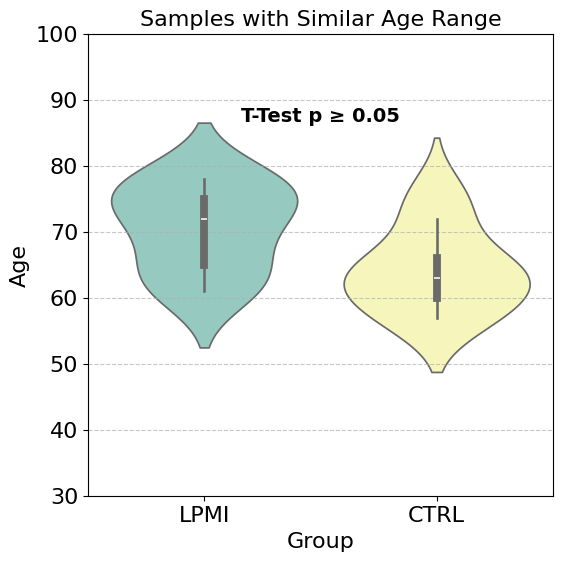

Violin plot saved to C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/LPMI-CTRL-age-t-test-similar-ages-ttest-violin_no_pvalue.png


In [31]:
#### some minor modifications to the plots
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu, shapiro
import matplotlib.pyplot as plt
import seaborn as sns

# =============================================================================
# 1) Load Data
# =============================================================================
data = pd.read_csv('C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/LPMI-CTRL-age-t-test_similar_ages.csv')

# Split the data into CTRL and LPMI groups
ctrl_group = data[data['Group'] == 'CTRL']['Age']
lpmi_group = data[data['Group'] == 'LPMI']['Age']

# =============================================================================
# 2) Test for Normality (Shapiro-Wilk test)
# =============================================================================
ctrl_normality = shapiro(ctrl_group)
lpmi_normality = shapiro(lpmi_group)

print("CTRL Normality (Shapiro-Wilk):", ctrl_normality)
print("LPMI Normality (Shapiro-Wilk):", lpmi_normality)

# =============================================================================
# 3) Decide on Statistical Test Based on Normality
# =============================================================================
if ctrl_normality.pvalue > 0.05 and lpmi_normality.pvalue > 0.05:
    # Perform t-test if both groups are normally distributed
    t_stat, p_value = ttest_ind(ctrl_group, lpmi_group)
    test_used = "T-Test"
else:
    # Perform Mann-Whitney U test if normality assumption is violated
    mw_stat, p_value = mannwhitneyu(ctrl_group, lpmi_group, alternative='two-sided')
    test_used = "Mann-Whitney U Test"

print(f"{test_used} Results: p-value =", p_value)

# =============================================================================
# 4) Format P-Value for Display
# =============================================================================
if p_value < 0.05:
    p_value_text = f"{test_used} p < 0.05"
else:
    p_value_text = f"{test_used} p ≥ 0.05"

# =============================================================================
# 5) Plot the Violin Plot with P-Value Annotation
# =============================================================================
plt.figure(figsize=(6, 6))  # Adjusted to make the plot narrower

# Create the violin plot
sns.violinplot(x='Group', y='Age', data=data, palette='Set3', inner='box')

# Adjust Y-axis range to 30-100
plt.ylim(30, 100)

# Increase font sizes for tick labels
plt.xticks(fontsize=16)  # Increase font size of X-axis numbers
plt.yticks(fontsize=16)  # Increase font size of Y-axis numbers

# Add the formatted p-value inside the plot
x1, x2 = 0, 1  # Positions of the groups on the x-axis
y_position = max(data['Age']) + 11  # Position p-value 5 units below the max age
plt.text((x1 + x2) / 2, y_position, p_value_text, 
         ha='center', va='top', color='black', fontsize=14, fontweight='bold')

# Add labels and title with larger fonts
plt.title('Samples with Similar Age Range', fontsize=16)
plt.xlabel('Group', fontsize=16)
plt.ylabel('Age', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# =============================================================================
# 6) Save the Plot
# =============================================================================
output_path = 'C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/LPMI-CTRL-age-t-test-similar-ages-ttest-violin_no_pvalue.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"Violin plot saved to {output_path}")


CTRL Normality (Shapiro-Wilk): ShapiroResult(statistic=0.9816122055053711, pvalue=0.97032630443573)
LPMI Normality (Shapiro-Wilk): ShapiroResult(statistic=0.9629554152488708, pvalue=0.6595394611358643)
T-Test Results: p-value = 3.402390917338893e-07


C:\Users\labuser\AppData\Local\Temp\ipykernel_18804\3879144966.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y='Age', data=data, palette='Set3', inner='box')


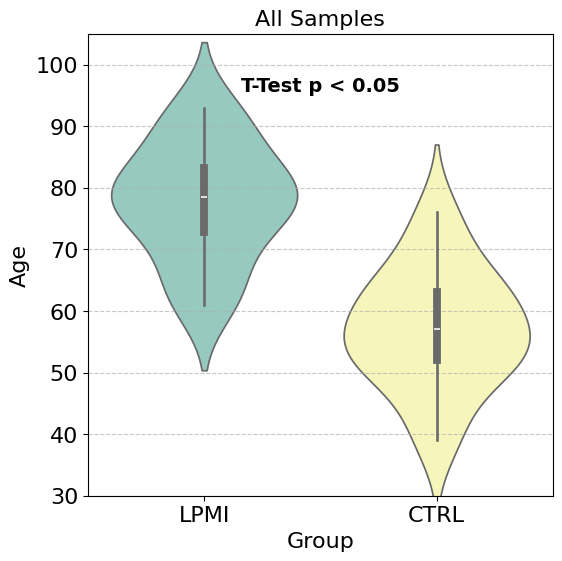

Violin plot saved to C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/LPMI-CTRL-age-t-test-all-samples-ttest-violin_no_pvalue.png


In [17]:
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu, shapiro
import matplotlib.pyplot as plt
import seaborn as sns

# =============================================================================
# 1) Load Data
# =============================================================================
data = pd.read_csv('C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/LPMI-CTRL-age-t-test.csv')

# Split the data into CTRL and LPMI groups
ctrl_group = data[data['Group'] == 'CTRL']['Age']
lpmi_group = data[data['Group'] == 'LPMI']['Age']

# =============================================================================
# 2) Test for Normality (Shapiro-Wilk test)
# =============================================================================
ctrl_normality = shapiro(ctrl_group)
lpmi_normality = shapiro(lpmi_group)

print("CTRL Normality (Shapiro-Wilk):", ctrl_normality)
print("LPMI Normality (Shapiro-Wilk):", lpmi_normality)

# =============================================================================
# 3) Decide on Statistical Test Based on Normality
# =============================================================================
if ctrl_normality.pvalue > 0.05 and lpmi_normality.pvalue > 0.05:
    # Perform t-test if both groups are normally distributed
    t_stat, p_value = ttest_ind(ctrl_group, lpmi_group)
    test_used = "T-Test"
else:
    # Perform Mann-Whitney U test if normality assumption is violated
    mw_stat, p_value = mannwhitneyu(ctrl_group, lpmi_group, alternative='two-sided')
    test_used = "Mann-Whitney U Test"

print(f"{test_used} Results: p-value =", p_value)

# =============================================================================
# 4) Format P-Value for Display
# =============================================================================
if p_value < 0.05:
    p_value_text = f"{test_used} p < 0.05"
else:
    p_value_text = f"{test_used} p ≥ 0.05"

# =============================================================================
# 5) Plot the Violin Plot with P-Value Annotation
# =============================================================================
plt.figure(figsize=(6, 6))  # Adjusted to make the plot narrower

# Create the violin plot
sns.violinplot(x='Group', y='Age', data=data, palette='Set3', inner='box')

# Adjust Y-axis range to 30-105
plt.ylim(30, 105)

# Increase font sizes for tick labels
plt.xticks(fontsize=16)  # Increase font size of X-axis numbers
plt.yticks(fontsize=16)  # Increase font size of Y-axis numbers

# =============================================================================
# 6) Customize P-Value Positioning
# =============================================================================
x1, x2 = 0, 1  # Positions of the groups on the x-axis
y_position = max(data['Age']) + 5  # Position p-value 5 units below the max age
plt.text((x1 + x2) / 2, y_position, p_value_text, 
         ha='center', va='top', color='black', fontsize=14, fontweight='bold')

# =============================================================================
# 7) Add Labels, Title, and Grid
# =============================================================================
plt.title('All Samples', fontsize=16)
plt.xlabel('Group', fontsize=16)
plt.ylabel('Age', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# =============================================================================
# 8) Save the Plot
# =============================================================================
output_path = 'C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/LPMI-CTRL-age-t-test-all-samples-ttest-violin_no_pvalue.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"Violin plot saved to {output_path}")


Expression matrix shape: (27, 62703) (samples x genes)
Metadata shape: (27, 5) (samples x variables)
PC1 explains 40.37% of variance
PC2 explains 8.24% of variance


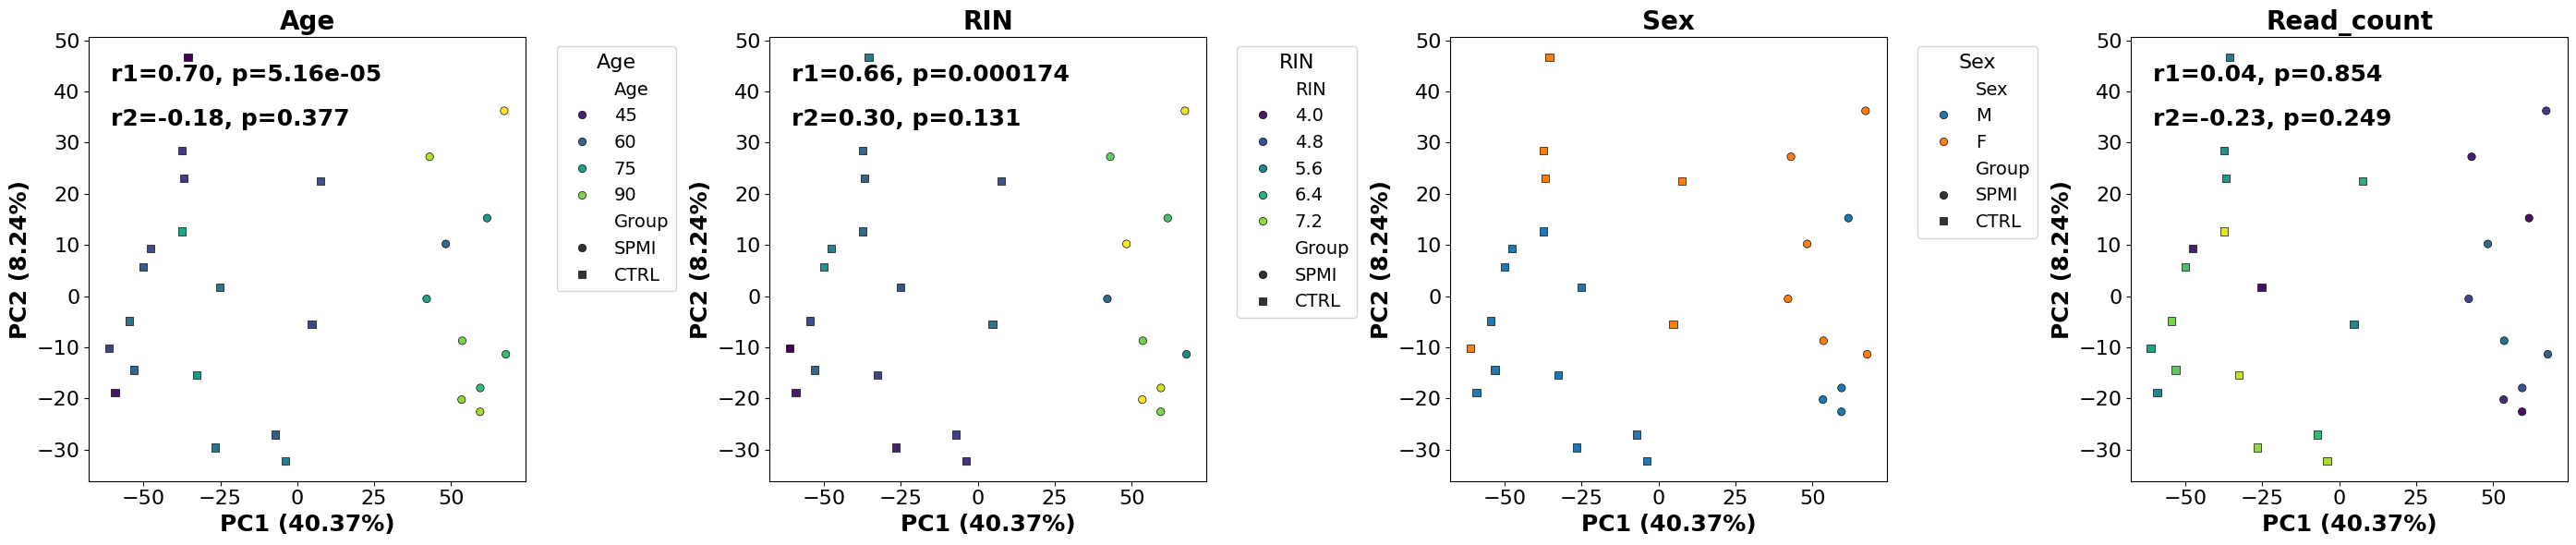

Combined PCA plot saved at: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/SPMI_CTRL_DESeq2_normalized_PCA_Spearman_correlation_Age_Sex_RIN_readcounts_combined.png


In [25]:
### PCA pot to show association of PCs with any potential varibales like Age, Sex, RIN and Read_counts
### SPMI vs CTRL samples
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
import os

# =============================================================================
# 1) Specify the file directory and load data
# =============================================================================
file_dir = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/"

# Load the expression matrix and metadata
expr_df = pd.read_csv(file_dir + "SPMI_CTRL_DESeq2_normalized_counts_covaraite_considered_for_revised_fig2C.csv", index_col=0)
meta_df = pd.read_csv(file_dir + "SPMI_CTRL_DESeq2_normalized_counts_covaraite_considered_metadata_for_revised_PCA_R1QM1.csv", index_col=0)

# =============================================================================
# 2) Transpose the expression matrix if necessary
# =============================================================================
if expr_df.shape[0] > expr_df.shape[1]:
    expr_df = expr_df.T

print(f"Expression matrix shape: {expr_df.shape} (samples x genes)")
print(f"Metadata shape: {meta_df.shape} (samples x variables)")

# =============================================================================
# 3) Ensure alignment of metadata and expression data
# =============================================================================
meta_df = meta_df.reindex(expr_df.index)
assert expr_df.index.equals(meta_df.index), "Sample names in expression and metadata do not match!"

# =============================================================================
# 4) Perform PCA
# =============================================================================
pca = PCA(n_components=2)
pca_scores = pca.fit_transform(expr_df)

meta_df['PC1'] = pca_scores[:, 0]
meta_df['PC2'] = pca_scores[:, 1]

explained_variance = pca.explained_variance_ratio_ * 100
print(f"PC1 explains {explained_variance[0]:.2f}% of variance")
print(f"PC2 explains {explained_variance[1]:.2f}% of variance")

# =============================================================================
# 5) Create a Single Figure with 4 Plots in One Row
# =============================================================================
variables_to_plot = ['Age', 'RIN', 'Sex', 'Read_count']
fig, axes = plt.subplots(1, 4, figsize=(28, 6))  # One row, four columns
axes = axes.flatten()  # Flatten to iterate easily

# Assigning shapes to SPMI and CTRL groups
style_dict = {'SPMI': 'o', 'CTRL': 's'}

for i, var in enumerate(variables_to_plot):
    ax = axes[i]  # Select subplot

    if pd.api.types.is_numeric_dtype(meta_df[var]):
        if var == "Read_count":
            hue_values = meta_df[var].apply(lambda x: f"{x:.1e}")  # Convert Read_count to scientific notation
        else:
            hue_values = meta_df[var]
            
        sns.scatterplot(
            data=meta_df,
            x='PC1',
            y='PC2',
            hue=hue_values,
            style='Group',
            markers=style_dict,
            palette='viridis',
            edgecolor='black',
            ax=ax
        )
        # Calculate Spearman correlation and p-value
        r1, pval1 = spearmanr(meta_df['PC1'], meta_df[var])
        r2, pval2 = spearmanr(meta_df['PC2'], meta_df[var])
        ax.annotate(f'r1={r1:.2f}, p={pval1:.3g}', xy=(0.05, 0.9), 
                    xycoords='axes fraction', fontsize=18, color='black', fontweight='bold')
        ax.annotate(f'r2={r2:.2f}, p={pval2:.3g}', xy=(0.05, 0.8), 
                    xycoords='axes fraction', fontsize=18, color='black', fontweight='bold')

    else:
        sns.scatterplot(
            data=meta_df,
            x='PC1',
            y='PC2',
            hue=var,
            style='Group',
            markers=style_dict,
            edgecolor='black',
            ax=ax
        )

    ax.set_title(f'{var}', fontsize=20, fontweight='bold')
    ax.set_xlabel(f'PC1 ({explained_variance[0]:.2f}%)', fontsize=18, fontweight='bold')
    ax.set_ylabel(f'PC2 ({explained_variance[1]:.2f}%)', fontsize=18, fontweight='bold')
    
    # Remove legend for Read Count plot
    if var != "Read_count":
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14, title=var, title_fontsize=16)
    else:
        ax.legend_.remove()  # Remove legend for Read_count

    # Increase tick label size
    ax.tick_params(axis='both', labelsize=16)

# Adjust layout and save the figure
plt.tight_layout()
output_file = os.path.join(file_dir, "SPMI_CTRL_DESeq2_normalized_PCA_Spearman_correlation_Age_Sex_RIN_readcounts_combined.png")
plt.savefig(output_file, dpi=300)
plt.show()

print(f"Combined PCA plot saved at: {output_file}")



Expression matrix shape: (35, 62703) (samples x genes)
Metadata shape: (35, 5) (samples x variables)
PC1 explains 34.81% of variance
PC2 explains 8.68% of variance


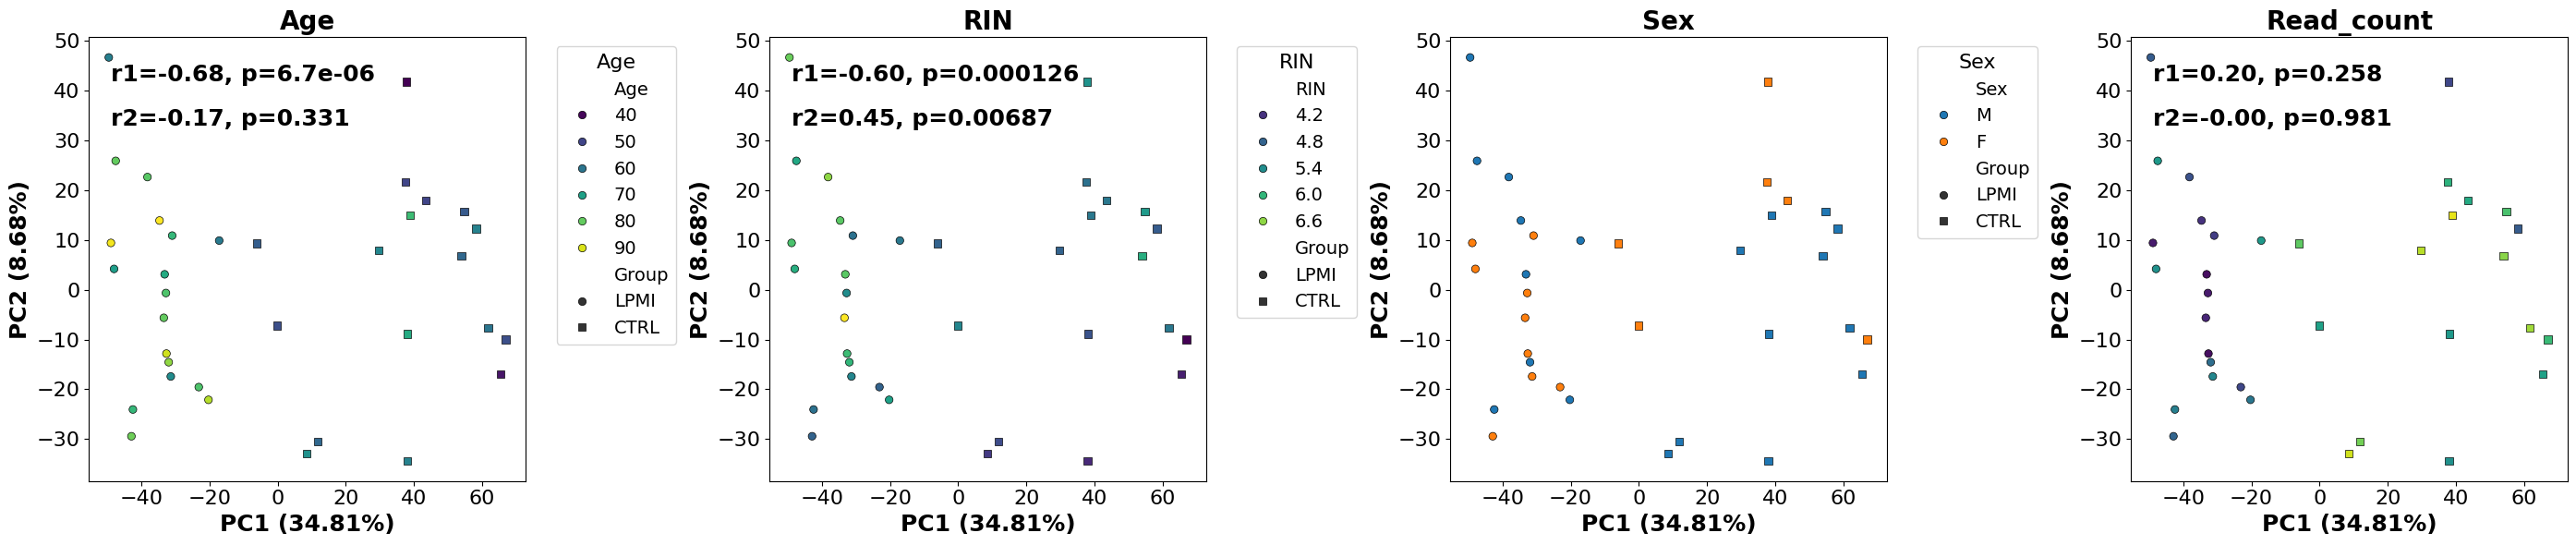

Combined PCA plot saved at: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/LPMI_CTRL_DESeq2_normalized_PCA_Spearman_correlation_Age_Sex_RIN_readcounts_combined.png


In [28]:
### PCA pot to show association of PCs with any potential varibales like Age, Sex, RIN and Read_counts
### LPMI vs CTRL samples
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
import os

# =============================================================================
# 1) Specify the file directory and load data
# =============================================================================
file_dir = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/"

# Load the expression matrix and metadata
expr_df = pd.read_csv(file_dir + "LPMI_CTRL_DESeq2_normalized_counts_covaraite_considered_for_revised_fig1C.csv", index_col=0)
meta_df = pd.read_csv(file_dir + "LPMI_CTRL_DESeq2_normalized_counts_covaraite_considered_metadata_for_revised_PCA_R1QM1.csv", index_col=0)

# =============================================================================
# 2) Transpose the expression matrix if necessary
# =============================================================================
if expr_df.shape[0] > expr_df.shape[1]:
    expr_df = expr_df.T

print(f"Expression matrix shape: {expr_df.shape} (samples x genes)")
print(f"Metadata shape: {meta_df.shape} (samples x variables)")

# =============================================================================
# 3) Ensure alignment of metadata and expression data
# =============================================================================
meta_df = meta_df.reindex(expr_df.index)
assert expr_df.index.equals(meta_df.index), "Sample names in expression and metadata do not match!"

# =============================================================================
# 4) Perform PCA
# =============================================================================
pca = PCA(n_components=2)
pca_scores = pca.fit_transform(expr_df)

meta_df['PC1'] = pca_scores[:, 0]
meta_df['PC2'] = pca_scores[:, 1]

explained_variance = pca.explained_variance_ratio_ * 100
print(f"PC1 explains {explained_variance[0]:.2f}% of variance")
print(f"PC2 explains {explained_variance[1]:.2f}% of variance")

# =============================================================================
# 5) Create a Single Figure with 4 Plots in One Row
# =============================================================================
variables_to_plot = ['Age', 'RIN', 'Sex', 'Read_count']
fig, axes = plt.subplots(1, 4, figsize=(28, 6))  # One row, four columns
axes = axes.flatten()  # Flatten to iterate easily

# Assigning shapes to SPMI and CTRL groups
style_dict = {'LPMI': 'o', 'CTRL': 's'}

for i, var in enumerate(variables_to_plot):
    ax = axes[i]  # Select subplot

    if pd.api.types.is_numeric_dtype(meta_df[var]):
        if var == "Read_count":
            hue_values = meta_df[var].apply(lambda x: f"{x:.1e}")  # Convert Read_count to scientific notation
        else:
            hue_values = meta_df[var]
            
        sns.scatterplot(
            data=meta_df,
            x='PC1',
            y='PC2',
            hue=hue_values,
            style='Group',
            markers=style_dict,
            palette='viridis',
            edgecolor='black',
            ax=ax
        )
        # Calculate Spearman correlation and p-value
        r1, pval1 = spearmanr(meta_df['PC1'], meta_df[var])
        r2, pval2 = spearmanr(meta_df['PC2'], meta_df[var])
        ax.annotate(f'r1={r1:.2f}, p={pval1:.3g}', xy=(0.05, 0.9), 
                    xycoords='axes fraction', fontsize=18, color='black', fontweight='bold')
        ax.annotate(f'r2={r2:.2f}, p={pval2:.3g}', xy=(0.05, 0.8), 
                    xycoords='axes fraction', fontsize=18, color='black', fontweight='bold')

    else:
        sns.scatterplot(
            data=meta_df,
            x='PC1',
            y='PC2',
            hue=var,
            style='Group',
            markers=style_dict,
            edgecolor='black',
            ax=ax
        )

    ax.set_title(f'{var}', fontsize=20, fontweight='bold')
    ax.set_xlabel(f'PC1 ({explained_variance[0]:.2f}%)', fontsize=18, fontweight='bold')
    ax.set_ylabel(f'PC2 ({explained_variance[1]:.2f}%)', fontsize=18, fontweight='bold')
    
    # Remove legend for Read Count plot
    if var != "Read_count":
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14, title=var, title_fontsize=16)
    else:
        ax.legend_.remove()  # Remove legend for Read_count

    # Increase tick label size
    ax.tick_params(axis='both', labelsize=16)

# Adjust layout and save the figure
plt.tight_layout()
output_file = os.path.join(file_dir, "LPMI_CTRL_DESeq2_normalized_PCA_Spearman_correlation_Age_Sex_RIN_readcounts_combined.png")
plt.savefig(output_file, dpi=300)
plt.show()

print(f"Combined PCA plot saved at: {output_file}")



    Symbol  Average_expression_24h20c  Average_expression_LPMI
0    SPAG9               17741.983980              4590.366440
1    BAZ1B                9015.654345              2646.232357
2  PLEKHB1               24627.519150              7828.331123
3     GAB2               10164.315330              2947.657552
4   BOD1L1               11347.088620              3009.625263


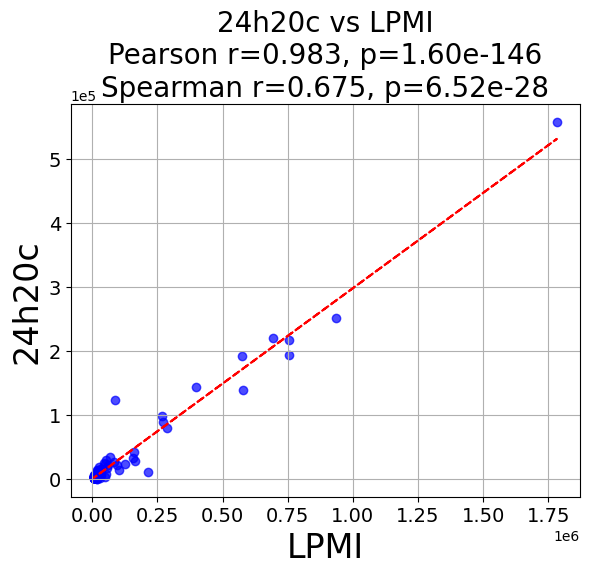

Plot saved successfully at: C:\Users\labuser\Downloads\Moein\UK DRI\new_aligned_samples\Sanity_check\Writing\Response to Nat Comm reviewers Dec 2024\LPMI_vs_24h20c_correlation_plot_200_genes.png


In [38]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr

# Load the data from the CSV file
file_path = 'C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Pearaon_correlation_24h20c_top_200_DEGs_ssGSEA_vs_LPMI_samples.csv'
df = pd.read_csv(file_path)

# Ensure the data is correctly loaded
print(df.head())

# Extract gene expression values for group1 and group2
group1 = df.iloc[:, 1]
group2 = df.iloc[:, 2]

# Calculate Pearson correlation coefficient and p-value
pearson_corr, pearson_pval = pearsonr(group1, group2)

# Calculate Spearman correlation coefficient and p-value
spearman_corr, spearman_pval = spearmanr(group1, group2)

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Scatter plot
ax.scatter(group1, group2, alpha=0.7, color='blue')

# Fit a linear regression line
m, b = np.polyfit(group1, group2, 1)
ax.plot(group1, m * group1 + b, color='red', linestyle='--')

# Set title with correlation values and p-values
ax.set_title(
    f"24h20c vs LPMI\nPearson r={pearson_corr:.3f}, p={pearson_pval:.2e}\n"
    f"Spearman r={spearman_corr:.3f}, p={spearman_pval:.2e}",
    fontsize=20
)

# Set labels and font sizes
ax.set_xlabel("LPMI", fontsize=24)
ax.set_ylabel("24h20c", fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=14)

# Set scientific notation for both axes
ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Add grid for better visualization
ax.grid(True)

# Define the output path
output_dir = r"C:\Users\labuser\Downloads\Moein\UK DRI\new_aligned_samples\Sanity_check\Writing\Response to Nat Comm reviewers Dec 2024"
output_file = os.path.join(output_dir, "LPMI_vs_24h20c_correlation_plot_200_genes.png")

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Save the plot
plt.tight_layout()
plt.savefig(output_file, dpi=300)  # High resolution for publication
plt.show()

print(f"Plot saved successfully at: {output_file}")


    Symbol  Average_expression_24h20c  Average_expression_SPMI
0    SPAG9               17741.983980              3860.226047
1    BAZ1B                9015.654345              2434.618815
2  PLEKHB1               24627.519150              7360.337457
3     GAB2               10164.315330              2039.503706
4   BOD1L1               11347.088620              2646.502047


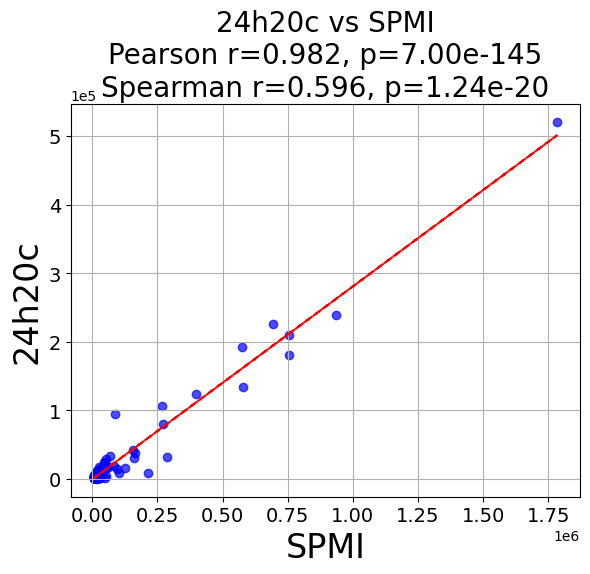

Plot saved successfully at: C:\Users\labuser\Downloads\Moein\UK DRI\new_aligned_samples\Sanity_check\Writing\Response to Nat Comm reviewers Dec 2024\SPMI_vs_24h20c_correlation_plot_200_genes.png


In [39]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr

# Load the data from the CSV file
file_path = 'C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Pearaon_correlation_24h20c_top_200_DEGs_ssGSEA_vs_SPMI_samples.csv'
df = pd.read_csv(file_path)

# Ensure the data is correctly loaded
print(df.head())

# Extract gene expression values for group1 and group2
group1 = df.iloc[:, 1]
group2 = df.iloc[:, 2]

# Calculate Pearson correlation coefficient and p-value
pearson_corr, pearson_pval = pearsonr(group1, group2)

# Calculate Spearman correlation coefficient and p-value
spearman_corr, spearman_pval = spearmanr(group1, group2)

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Scatter plot
ax.scatter(group1, group2, alpha=0.7, color='blue')

# Fit a linear regression line
m, b = np.polyfit(group1, group2, 1)
ax.plot(group1, m * group1 + b, color='red', linestyle='--')

# Set title with correlation values and p-values
ax.set_title(
    f"24h20c vs SPMI\nPearson r={pearson_corr:.3f}, p={pearson_pval:.2e}\n"
    f"Spearman r={spearman_corr:.3f}, p={spearman_pval:.2e}",
    fontsize=20
)

# Set labels and font sizes
ax.set_xlabel("SPMI", fontsize=24)
ax.set_ylabel("24h20c", fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=14)

# Set scientific notation for both axes
ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Add grid for better visualization
ax.grid(True)

# Define the output path
output_dir = r"C:\Users\labuser\Downloads\Moein\UK DRI\new_aligned_samples\Sanity_check\Writing\Response to Nat Comm reviewers Dec 2024"
output_file = os.path.join(output_dir, "SPMI_vs_24h20c_correlation_plot_200_genes.png")

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Save the plot
plt.tight_layout()
plt.savefig(output_file, dpi=300)  # High resolution for publication
plt.show()

print(f"Plot saved successfully at: {output_file}")


    Symbol  Average_expression_36h20c  Average_expression_LPMI
0    ACIN1                7567.032557              2047.753382
1     AHI1                7561.711308              2214.539111
2    AKAP9               10404.917000              2852.587056
3     AKT3               16925.180310              5328.111944
4  ANKRD11               10860.118230              4726.745556


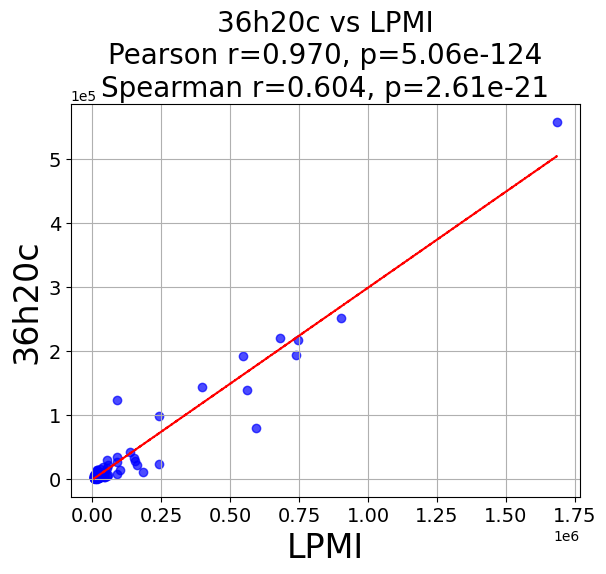

Plot saved successfully at: C:\Users\labuser\Downloads\Moein\UK DRI\new_aligned_samples\Sanity_check\Writing\Response to Nat Comm reviewers Dec 2024\LPMI_vs_36h20c_correlation_plot_200_genes.png


In [40]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr

# Load the data from the CSV file
file_path = 'C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Pearaon_correlation_36h20c_top_200_DEGs_ssGSEA_vs_LPMI_samples.csv'
df = pd.read_csv(file_path)

# Ensure the data is correctly loaded
print(df.head())

# Extract gene expression values for group1 and group2
group1 = df.iloc[:, 1]
group2 = df.iloc[:, 2]

# Calculate Pearson correlation coefficient and p-value
pearson_corr, pearson_pval = pearsonr(group1, group2)

# Calculate Spearman correlation coefficient and p-value
spearman_corr, spearman_pval = spearmanr(group1, group2)

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Scatter plot
ax.scatter(group1, group2, alpha=0.7, color='blue')

# Fit a linear regression line
m, b = np.polyfit(group1, group2, 1)
ax.plot(group1, m * group1 + b, color='red', linestyle='--')

# Set title with correlation values and p-values
ax.set_title(
    f"36h20c vs LPMI\nPearson r={pearson_corr:.3f}, p={pearson_pval:.2e}\n"
    f"Spearman r={spearman_corr:.3f}, p={spearman_pval:.2e}",
    fontsize=20
)

# Set labels and font sizes
ax.set_xlabel("LPMI", fontsize=24)
ax.set_ylabel("36h20c", fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=14)

# Set scientific notation for both axes
ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Add grid for better visualization
ax.grid(True)

# Define the output path
output_dir = r"C:\Users\labuser\Downloads\Moein\UK DRI\new_aligned_samples\Sanity_check\Writing\Response to Nat Comm reviewers Dec 2024"
output_file = os.path.join(output_dir, "LPMI_vs_36h20c_correlation_plot_200_genes.png")

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Save the plot
plt.tight_layout()
plt.savefig(output_file, dpi=300)  # High resolution for publication
plt.show()

print(f"Plot saved successfully at: {output_file}")


    Symbol  Average_expression_36h20c  Average_expression_SPMI
0    ACIN1                7567.032557              1948.293633
1     AHI1                7561.711308              1966.058500
2    AKAP9               10404.917000              2573.078300
3     AKT3               16925.180310              4947.923000
4  ANKRD11               10860.118230              4597.639900


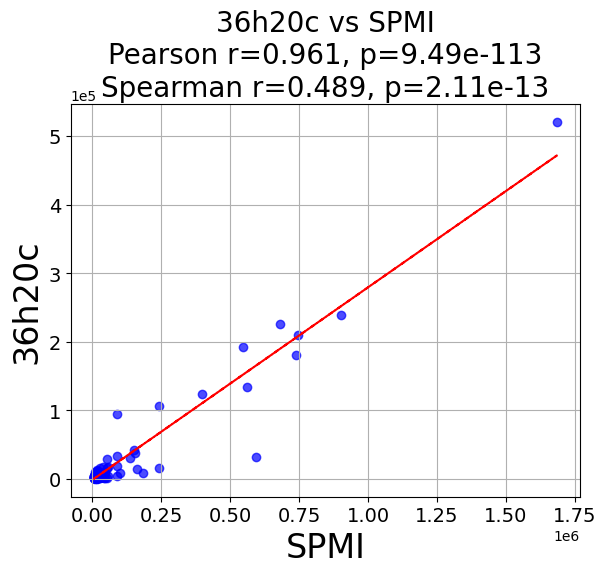

Plot saved successfully at: C:\Users\labuser\Downloads\Moein\UK DRI\new_aligned_samples\Sanity_check\Writing\Response to Nat Comm reviewers Dec 2024\SPMI_vs_36h20c_correlation_plot_200_genes.png


In [41]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr

# Load the data from the CSV file
file_path = 'C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Pearaon_correlation_36h20c_top_200_DEGs_ssGSEA_vs_SPMI_samples.csv'
df = pd.read_csv(file_path)

# Ensure the data is correctly loaded
print(df.head())

# Extract gene expression values for group1 and group2
group1 = df.iloc[:, 1]
group2 = df.iloc[:, 2]

# Calculate Pearson correlation coefficient and p-value
pearson_corr, pearson_pval = pearsonr(group1, group2)

# Calculate Spearman correlation coefficient and p-value
spearman_corr, spearman_pval = spearmanr(group1, group2)

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Scatter plot
ax.scatter(group1, group2, alpha=0.7, color='blue')

# Fit a linear regression line
m, b = np.polyfit(group1, group2, 1)
ax.plot(group1, m * group1 + b, color='red', linestyle='--')

# Set title with correlation values and p-values
ax.set_title(
    f"36h20c vs SPMI\nPearson r={pearson_corr:.3f}, p={pearson_pval:.2e}\n"
    f"Spearman r={spearman_corr:.3f}, p={spearman_pval:.2e}",
    fontsize=20
)

# Set labels and font sizes
ax.set_xlabel("SPMI", fontsize=24)
ax.set_ylabel("36h20c", fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=14)

# Set scientific notation for both axes
ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Add grid for better visualization
ax.grid(True)

# Define the output path
output_dir = r"C:\Users\labuser\Downloads\Moein\UK DRI\new_aligned_samples\Sanity_check\Writing\Response to Nat Comm reviewers Dec 2024"
output_file = os.path.join(output_dir, "SPMI_vs_36h20c_correlation_plot_200_genes.png")

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Save the plot
plt.tight_layout()
plt.savefig(output_file, dpi=300)  # High resolution for publication
plt.show()

print(f"Plot saved successfully at: {output_file}")


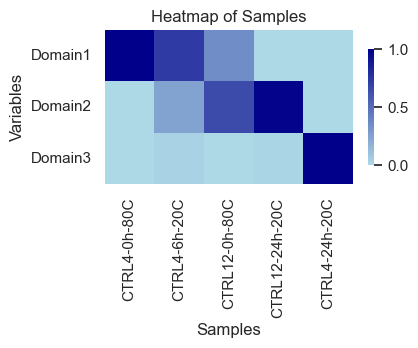

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Load the CSV file
file_path = 'C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/snRNAseq_object_average_expression_for_ML_prediction.csv'
data = pd.read_csv(file_path, index_col=0)  # Assuming the first column is the index (sample names)

# Transpose the data to make the heatmap horizontal
data = data.T

# Define a custom colormap
cmap = LinearSegmentedColormap.from_list(
    "Custom_Blue", ["#add8e6", "#00008B"], N=256
)

# Create the heatmap with a custom blue color gradient
plt.figure(figsize=(4, 2))  # Adjust figure size as needed
sns.heatmap(data, annot=False, cmap=cmap, vmin=0, vmax=1, cbar_kws={"shrink": .75})
plt.title('Heatmap of Samples')
plt.xlabel('Samples')  # Labels switched due to transposition
plt.ylabel('Variables')  # Labels switched due to transposition

# Save the plot as an image file
plt.savefig(
    'C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/snRNAseq_object_average_expression_for_ML_prediction_heatmap.png',
    format='png',
    dpi=300,
    bbox_inches="tight"  # Ensures the full figure is saved
)
# Display the plot
plt.show()


Original column names:
['Unnamed: 0', 'Read Counts', 'PMI', 'Sex', 'Age', 'RIN', 'Group']
Renamed column names:
['Samples', 'Read Counts', 'PMI', 'Sex', 'Age', 'RIN', 'Group']
Pearson correlation (PMI vs. Read Counts): -0.28, p-value: 6.106e-02
Spearman correlation (PMI vs. Read Counts): -0.31, p-value: 3.987e-02
Pearson correlation (Sex vs. Read Counts): -0.23, p-value: 1.328e-01
Spearman correlation (Sex vs. Read Counts): -0.29, p-value: 5.840e-02
Pearson correlation (Age vs. Read Counts): -0.12, p-value: 4.239e-01
Spearman correlation (Age vs. Read Counts): -0.16, p-value: 2.991e-01
Pearson correlation (RIN vs. Read Counts): -0.05, p-value: 7.542e-01
Spearman correlation (RIN vs. Read Counts): -0.06, p-value: 6.996e-01
Plot saved to: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024\Response to reviewer- R4Q6-new-partC.png


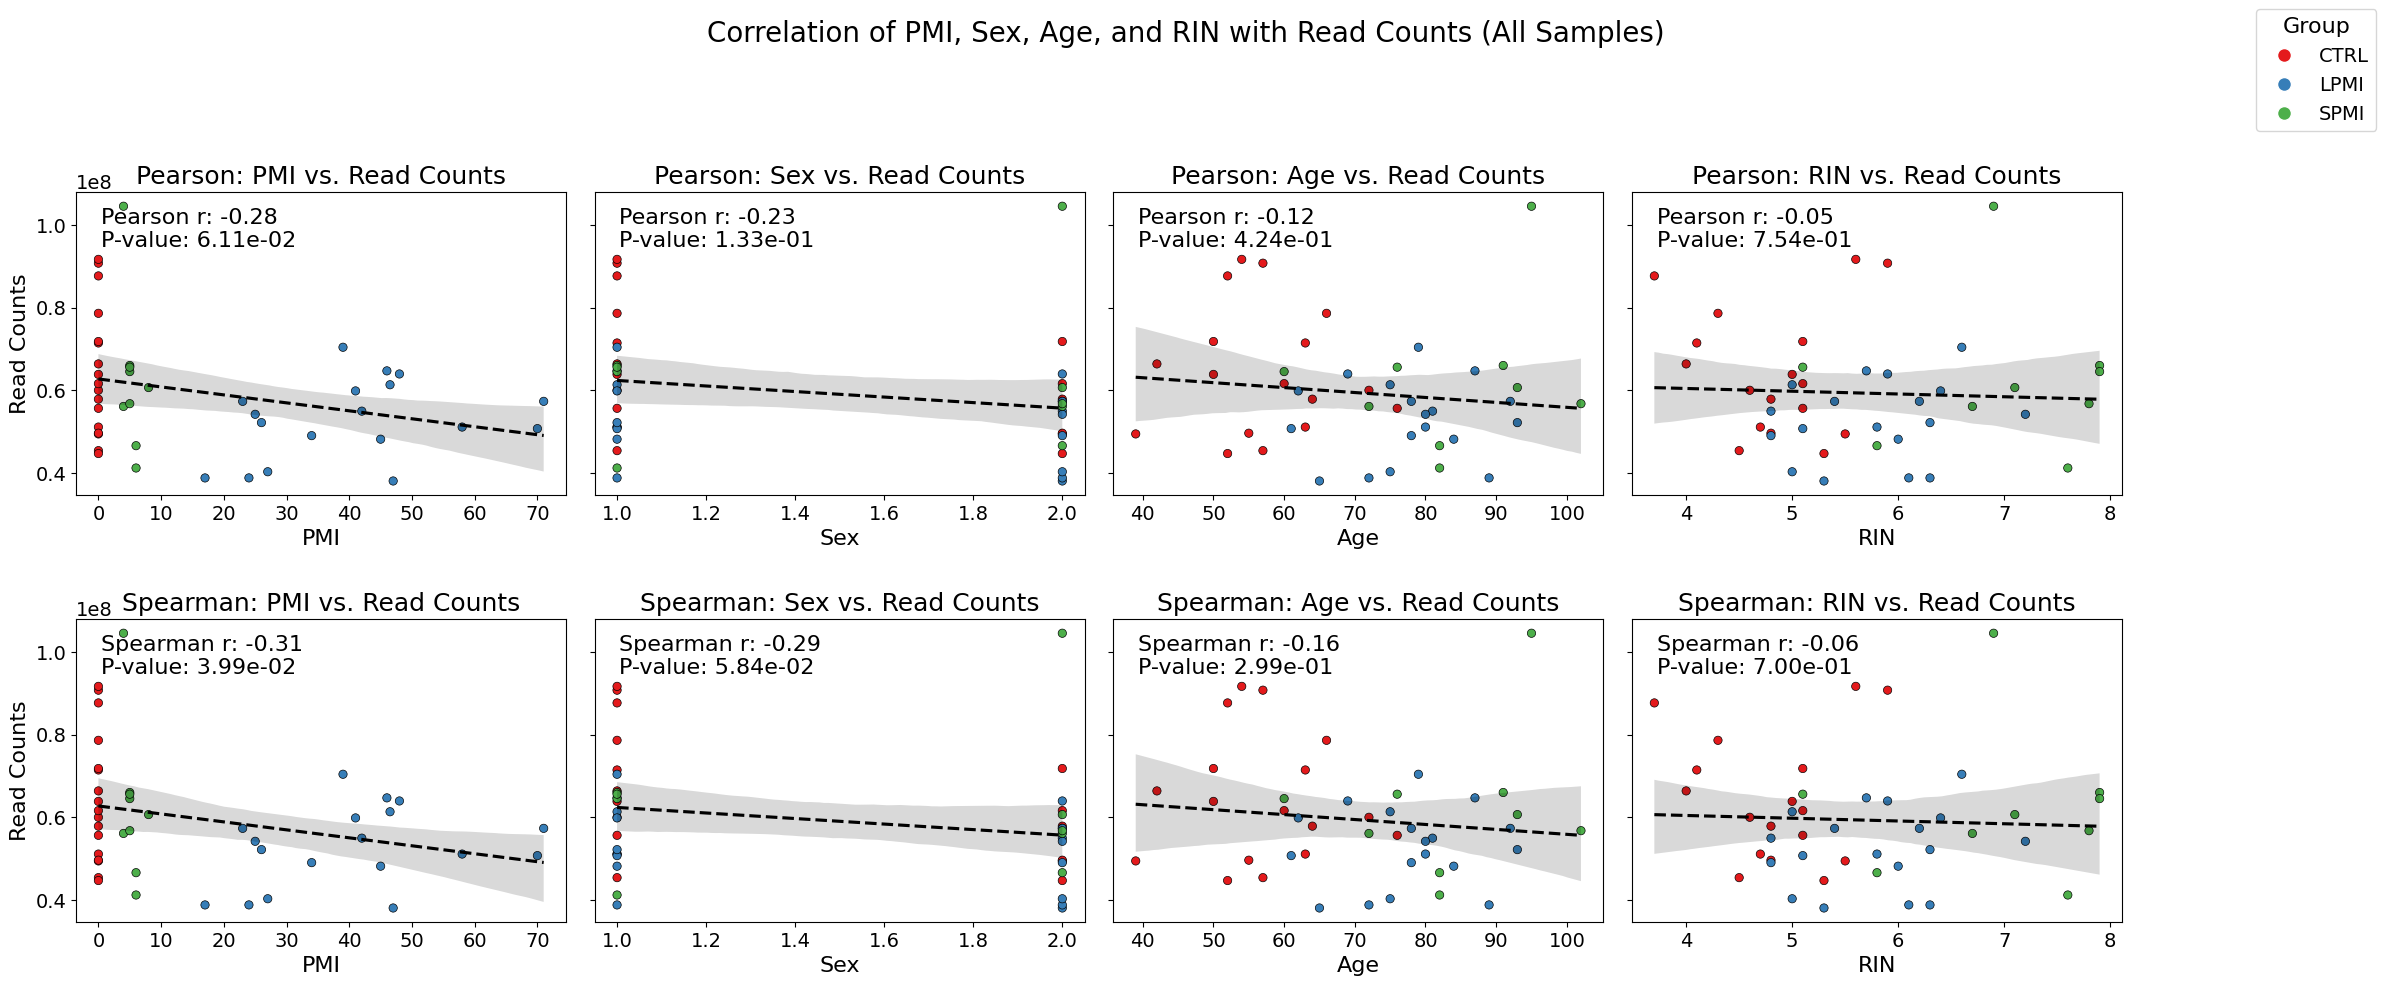

In [7]:
#### Reviewer 4 question 6. Thi sectin is done based Jo's comment in which I need to have a Perason Correlation and Spear,an correlation for exploring the correlations of read counts of the samples
#### with the sex, age, PMI and RIN values. 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
import os
import matplotlib.lines as mlines

# ----------------------------
# Increase font sizes globally
# ----------------------------
plt.rcParams.update({
    'font.size': 16,       # General font size
    'axes.titlesize': 18,  # Title font size
    'axes.labelsize': 16,  # Axis label font size
    'xtick.labelsize': 14, # X-axis tick label size
    'ytick.labelsize': 14, # Y-axis tick label size
    'legend.fontsize': 14, # Legend font size
    'figure.titlesize': 20 # Suptitle font size
})

# ----------------------------
# Step 1: Load Data and Preprocess
# ----------------------------

# File path for the Excel file
file_path = r'C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/correlations/LPMI_SPMI_control_PMI_Age_RIN_Sex_vs_reads_correlation.xlsx'

# Set output directory to the specified location
output_directory = r'C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024'
output_file = os.path.join(output_directory, "Response to reviewer- R4Q6-new-partC.png")

# Load the dataset
data = pd.read_excel(file_path)

# Print original column names
print("Original column names:")
print(data.columns.tolist())

# Strip whitespace from column names
data.columns = data.columns.str.strip()

# Rename the first column to "Samples" if it's "Unnamed: 0"
if data.columns[0] == 'Unnamed: 0':
    data.rename(columns={'Unnamed: 0': 'Samples'}, inplace=True)

# Print the renamed column names
print("Renamed column names:")
print(data.columns.tolist())

# Define expected columns
expected_columns = ["Samples", "Read Counts", "PMI", "Sex", "Age", "RIN", "Group"]
for col in expected_columns:
    if col not in data.columns:
        raise KeyError(f"Missing expected column: {col}")

# Convert numeric columns to float
numeric_columns = ["Read Counts", "PMI", "Age", "RIN"]
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Map the 'Sex' column to numeric values (e.g., Male = 1, Female = 2)
data["Sex"] = data["Sex"].map({"Male": 1, "Female": 2})

# ----------------------------
# Step 2: Define Analysis Parameters
# ----------------------------

# Variables for correlation analysis
variables = ["PMI", "Sex", "Age", "RIN"]

# Define correlation methods: Pearson and Spearman
correlation_methods = {
    "Pearson": pearsonr,
    "Spearman": spearmanr
}

# ----------------------------
# Step 3: Compute Correlations and Plot (All Samples Combined)
# ----------------------------

# Create subplots: 2 rows (for Pearson and Spearman) x 4 columns (one per variable)
fig, axes = plt.subplots(2, 4, figsize=(24, 10), sharey=True)

# Loop over each variable
for i, variable in enumerate(variables):
    # Extract x and y values for the variable and Read Counts
    x_values = data[variable]
    y_values = data["Read Counts"]
    
    for j, (corr_name, corr_func) in enumerate(correlation_methods.items()):
        # Filter valid (non-NA) values
        valid = x_values.notna() & y_values.notna()
        if valid.sum() == 0:
            continue
        
        # Compute correlation and p-value on valid data
        corr, p_val = corr_func(x_values[valid], y_values[valid])
        print(f"{corr_name} correlation ({variable} vs. Read Counts): {corr:.2f}, p-value: {p_val:.3e}")
        
        # Select the appropriate subplot axis
        ax = axes[j, i]
        
        # Create scatter plot with points colored by "Group"
        sns.scatterplot(ax=ax, x=x_values, y=y_values, hue=data["Group"], 
                        palette="Set1", edgecolor='black', legend=False)
        # Add a regression line (dashed)
        sns.regplot(ax=ax, x=x_values, y=y_values, scatter=False, color='black', 
                    line_kws={'linestyle': 'dashed'})
        
        # Set subplot title and axis labels
        ax.set_title(f"{corr_name}: {variable} vs. Read Counts")
        ax.set_xlabel(variable)
        if i == 0:
            ax.set_ylabel("Read Counts")
        else:
            ax.set_ylabel("")
        
        # Annotate subplot with correlation coefficient and p-value
        ax.text(0.05, 0.95, f"{corr_name} r: {corr:.2f}\nP-value: {p_val:.2e}",
                transform=ax.transAxes, verticalalignment='top')

# ----------------------------
# Step 4: Add a Common Legend for Group Colors
# ----------------------------

# Determine unique groups and get a color palette from Set1
unique_groups = sorted(data["Group"].unique())
palette = sns.color_palette("Set1", n_colors=len(unique_groups))

# Create legend handles manually
handles = [mlines.Line2D([], [], marker='o', color='w', markerfacecolor=palette[i], 
                         markersize=10, label=unique_groups[i]) for i in range(len(unique_groups))]

# Add the common legend to the figure (placed inside the plot, e.g., upper right)
fig.legend(handles=handles, loc="upper right", title="Group", title_fontsize=16)

# Set a common title for all subplots
plt.suptitle("Correlation of PMI, Sex, Age, and RIN with Read Counts (All Samples)")

plt.tight_layout(rect=[0, 0, 0.9, 0.93])

# Save the figure in the specified directory
plt.savefig(output_file, dpi=300, bbox_inches='tight')
print(f"Plot saved to: {output_file}")

plt.show()


C:\Users\labuser\AppData\Local\Temp\ipykernel_6748\1528653763.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
C:\Users\labuser\AppData\Local\Temp\ipykernel_6748\1528653763.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\labuser\AppData\Local\Temp\ipykernel_6748\1528653763.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\labuser\AppData\Local\Temp\ipykernel_6748\1528653763.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
C:\Users\labuser\AppData\Local\Temp\ipykernel_6748\1528653763.py:40: FutureWarning: 

Passing `palette` without as

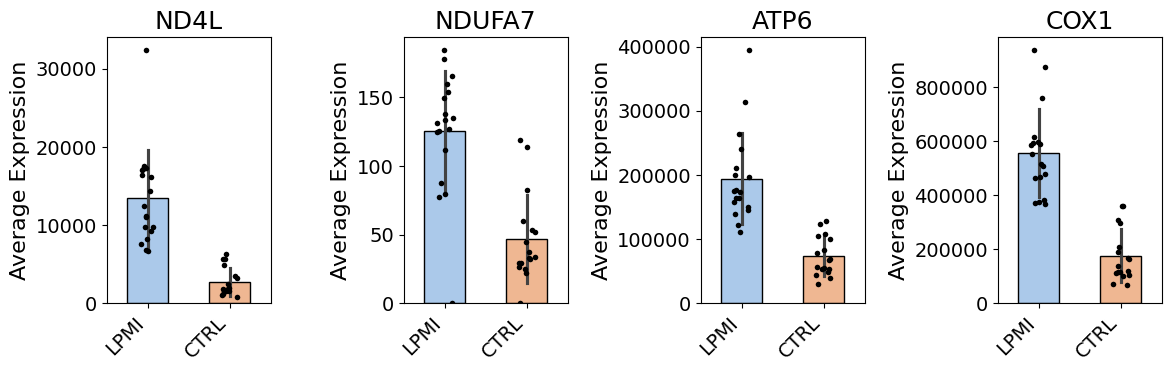

Saved plot to: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/Grouped_Gene_Expression_LPMI_vs_CTRL_individual_scales.png


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set up the directory and input file path
directory = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/"
file_path = os.path.join(directory, "test.xlsx")

# Load the Excel file
raw_df = pd.read_excel(file_path, header=None)

# Extract metadata
group_row = raw_df.iloc[0, 1:].values  # First row (group info), skip first column
sample_names = raw_df.iloc[1, 1:].values  # Second row (sample names), skip first column
gene_rows = raw_df.iloc[2:, :]  # Third row onwards = gene expression data

# Rename columns
gene_rows.columns = ['Gene'] + list(sample_names)

# Convert to long format
long_df = gene_rows.melt(id_vars='Gene', var_name='Sample', value_name='Expression')

# Map group info to samples
sample_to_group = dict(zip(sample_names, group_row))
long_df['Group'] = long_df['Sample'].map(sample_to_group)

# Unique genes to plot
genes = long_df['Gene'].unique()

# Set up side-by-side subplots with independent Y-axes
fig, axes = plt.subplots(1, 4, figsize=(12, 4), sharey=False)

# Plot each gene
for idx, gene in enumerate(genes):
    ax = axes[idx]
    gene_df = long_df[long_df['Gene'] == gene]

    # Barplot (mean ± SD)
    sns.barplot(
        data=gene_df,
        x='Group', y='Expression',
        estimator='mean', ci='sd',
        palette='pastel', edgecolor='black',
        ax=ax, width=0.5
    )

    # Overlay individual dots
    sns.stripplot(
        data=gene_df,
        x='Group', y='Expression',
        color='black', size=4, jitter=True,
        ax=ax
    )

    ax.set_title(f'{gene}')
    ax.set_xlabel('')
    ax.set_ylabel('Average Expression')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Final adjustments and save
plt.tight_layout()
output_file = os.path.join(directory, "Grouped_Gene_Expression_LPMI_vs_CTRL_individual_scales.png")
plt.savefig(output_file, dpi=300)
plt.show()

print(f"Saved plot to: {output_file}")


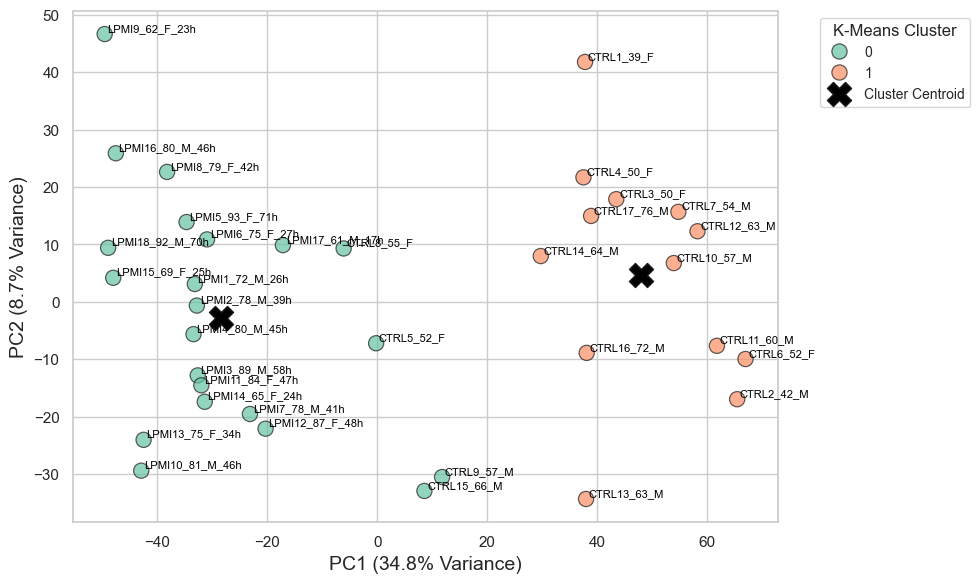

K-Means clustered PCA plot saved at: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/KMeans_Clustered_PCA_Plot.png


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

def main():
    # Define file paths
    directory = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/"
    expression_data_path = os.path.join(directory, "LPMI_CTRL_DESeq2_normalized_counts_covaraite_considered_for_revised_fig1C.csv")
    metadata_path = os.path.join(directory, "LPMI_CTRL_DESeq2_normalized_counts_covaraite_considered_metadata_for_revised_fig1C.csv")

    # ===========================
    # Step 1: Load and Prepare Data
    # ===========================
    expression_data = pd.read_csv(expression_data_path, index_col=0).transpose()
    metadata = pd.read_csv(metadata_path)

    # Merge Expression Data with Metadata
    merged_data = expression_data.merge(metadata, left_index=True, right_on="SampleID")

    # Keep only numeric data for PCA
    X = merged_data.drop(['SampleID', 'Group'], axis=1).values

    # ===========================
    # Step 2: Perform PCA
    # ===========================
    pca = PCA(n_components=2, random_state=42)
    principal_components = pca.fit_transform(X)

    # Create a DataFrame for PCA results
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    pca_df['Group'] = merged_data['Group']
    pca_df['SampleID'] = merged_data['SampleID']

    # ===========================
    # Step 3: K-Means Clustering (k=2)
    # ===========================
    kmeans = KMeans(n_clusters=2, random_state=42)
    pca_df['Cluster'] = kmeans.fit_predict(principal_components)

    # ===========================
    # Step 4: Visualize PCA with K-Means Clusters
    # ===========================
    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")

    # Scatter plot colored by K-Means clusters
    scatter = sns.scatterplot(
        data=pca_df,
        x='PC1', y='PC2',
        hue='Cluster', palette='Set2', s=120, edgecolor='k', alpha=0.7
    )

    # Annotate points with SampleIDs
    for idx, row in pca_df.iterrows():
        plt.text(x=row['PC1'] + 0.5, y=row['PC2'] + 0.5, s=row['SampleID'], fontdict=dict(color='black', size=8))

    # Compute and plot centroids for each cluster
    centroids = pca_df.groupby('Cluster')[['PC1', 'PC2']].mean()
    plt.scatter(
        centroids['PC1'], centroids['PC2'],
        s=300, c='black', label='Cluster Centroid', marker='X', edgecolor='k'
    )

    # Adjust labels
    plt.xlabel(f'PC1 ({np.round(pca.explained_variance_ratio_[0] * 100, 1)}% Variance)', fontsize=14)
    plt.ylabel(f'PC2 ({np.round(pca.explained_variance_ratio_[1] * 100, 1)}% Variance)', fontsize=14)
    plt.legend(title='K-Means Cluster', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

    # Save plot
    output_file = os.path.join(directory, "KMeans_Clustered_PCA_Plot.png")
    plt.tight_layout()
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    plt.show()

    print(f"K-Means clustered PCA plot saved at: {output_file}")

if __name__ == "__main__":
    main()


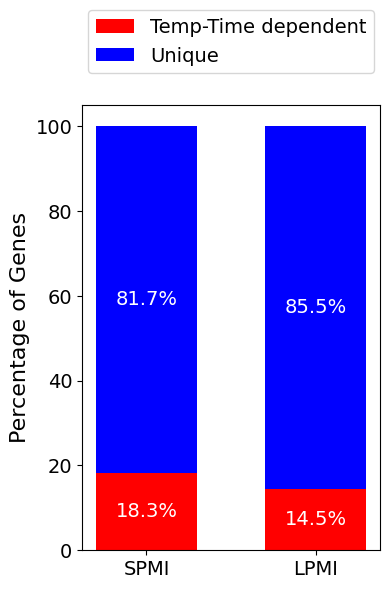

Stacked bar plot saved at: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/Response to reviewer 1 minor question 2 section B.png


In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------
# Step 1: Read the Excel File
# ----------------------------
directory = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/"
file_name = "Union_of_surgery_derived_DEG_and_SPMI_LPMI_DEGs_bar_plot.xlsx"
file_path = os.path.join(directory, file_name)

# Read the Excel file (assumes data is in the first sheet)
df = pd.read_excel(file_path)

# ----------------------------
# Step 2: Extract Gene Lists from Columns
# ----------------------------
genes_col1 = set(df.iloc[:, 0].dropna().astype(str))
genes_col2 = set(df.iloc[:, 1].dropna().astype(str))
genes_col3 = set(df.iloc[:, 2].dropna().astype(str))

# ----------------------------
# Step 3: Compute Common and Unique Percentages (Two Categories)
# ----------------------------
def compute_percentages_two_categories(set1, set2):
    """Compute percentage of common genes and unique genes (symmetric difference) based on the union."""
    common = set1.intersection(set2)
    unique = set1.symmetric_difference(set2)
    union_total = set1.union(set2)
    total = len(union_total) if len(union_total) > 0 else 1
    pct_common = len(common) / total * 100
    pct_unique = len(unique) / total * 100
    return pct_common, pct_unique

# For Column 1 vs Column 2 (annotate as SPMI)
pct_common_12, pct_unique_12 = compute_percentages_two_categories(genes_col1, genes_col2)

# For Column 1 vs Column 3 (annotate as LPMI)
pct_common_13, pct_unique_13 = compute_percentages_two_categories(genes_col1, genes_col3)

# ----------------------------
# Step 4: Prepare Data for Plotting
# ----------------------------
# Create a DataFrame with two comparisons and two categories:
# "Temp-Time dependent" (for common genes) and "Unique" (for unique genes)
plot_data = pd.DataFrame({
    'Comparison': ['SPMI', 'LPMI'],
    'Temp-Time dependent': [pct_common_12, pct_common_13],
    'Unique': [pct_unique_12, pct_unique_13]
})

# Melt the DataFrame to long format for stacked bar plotting
plot_data_long = plot_data.melt(id_vars='Comparison', 
                                value_vars=['Temp-Time dependent', 'Unique'],
                                var_name='Category', value_name='Percentage')

# ----------------------------
# Step 5: Create a Stacked Bar Plot
# ----------------------------
# Set a narrower figure size (width reduced)
fig, ax = plt.subplots(figsize=(4, 6))

# Define the x positions and bar width
comparisons = plot_data['Comparison']
x = np.arange(len(comparisons))
bar_width = 0.6

# Define colors: "Temp-Time dependent" as red and "Unique" as blue
colors = {'Temp-Time dependent': 'red', 'Unique': 'blue'}

bottom = np.zeros(len(comparisons))
for cat in ['Temp-Time dependent', 'Unique']:
    cat_values = plot_data_long[plot_data_long['Category'] == cat]['Percentage'].values
    bars = ax.bar(x, cat_values, bar_width, bottom=bottom, color=colors[cat], label=cat)
    
    # Annotate each bar segment with its percentage value
    for i, bar in enumerate(bars):
        height = bar.get_height()
        if height > 0:
            ax.text(x[i], bottom[i] + height/2, f"{height:.1f}%", ha='center', va='center', color='white', fontsize=14)
    bottom += cat_values

# Customize x-axis and labels with increased font sizes
ax.set_xticks(x)
ax.set_xticklabels(comparisons, fontsize=14)
ax.set_ylabel("Percentage of Genes", fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.legend(loc="lower center", bbox_to_anchor=(0.5, 1.05), fontsize=14, title_fontsize=14)


plt.tight_layout()

# Save the figure
output_file = os.path.join(directory, "Response to reviewer 1 minor question 2 section B.png")
plt.savefig(output_file, dpi=300, bbox_inches='tight')
plt.show()

print(f"Stacked bar plot saved at: {output_file}")


Loading the data...
Bar plot saved to: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024\Reviewer 1- minor question 3 TTRUTH_Average_Expression_PMIs_Barplot.png


<Figure size 600x600 with 0 Axes>

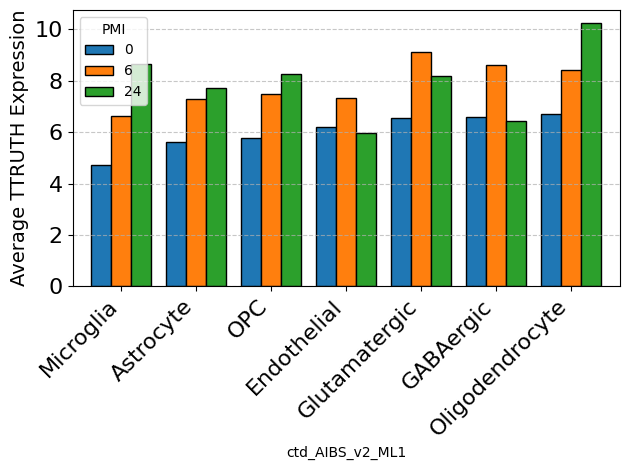

In [28]:
#### Drawing a bar plot for the TTRUTH gene for the PMI = 0, 6 and 24 in one bar plot. The idea for this plot is to show that at 6 hours at 20 degress Neuronal populations are the main responder 
#### by up regulating the expression of TTRUTH genes. Then at later time points we need to show that mature OLs become the main responders elative to the other times. 
#### In our previous steps by calculating the average expression of top 50 TTRUTH genes and scaling them and normalizing their value
#### to the total number of cells that expression those genes we have effectively negated the impact of cell number on the final results. 

import pandas as pd
import matplotlib.pyplot as plt
import os

# Input file path
input_file = "C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/snRNAseq_object_metadata_umap_TTRUTH_genes_sum_scaled_info.csv"

# Output file path (if you want to save the plot)
output_plot_file = os.path.join(
    os.path.dirname(input_file), "Reviewer 1- minor question 3 TTRUTH_Average_Expression_PMIs_Barplot.png"
)

# Load the data
print("Loading the data...")
data = pd.read_csv(input_file, index_col=0)

# Group the data by cell type and PMI, calculating the mean of "TTRUTH_Sum"
grouped = data.groupby(["ctd_AIBS_v2_ML1", "PMI"])["TTRUTH_Sum"].mean().reset_index()

# Pivot the grouped data so that each cell type has a column for each PMI
pivot_table = grouped.pivot(index="ctd_AIBS_v2_ML1", columns="PMI", values="TTRUTH_Sum")

# Sort the cell types by the mean expression at PMI 0 (or any PMI you choose)
pivot_table = pivot_table.sort_values(by=0)

# Create the grouped bar plot
plt.figure(figsize=(6, 6))
pivot_table.plot(kind="bar", edgecolor="black", width=0.8)

# Customize the plot
plt.ylabel("Average TTRUTH Expression", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=16)
plt.yticks(fontsize=16)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add a legend title
plt.legend(title="PMI")

# Save the plot as a PNG file if desired
plt.tight_layout()
plt.savefig(output_plot_file, dpi=300)
print(f"Bar plot saved to: {output_plot_file}")

# Show the plot
plt.show()



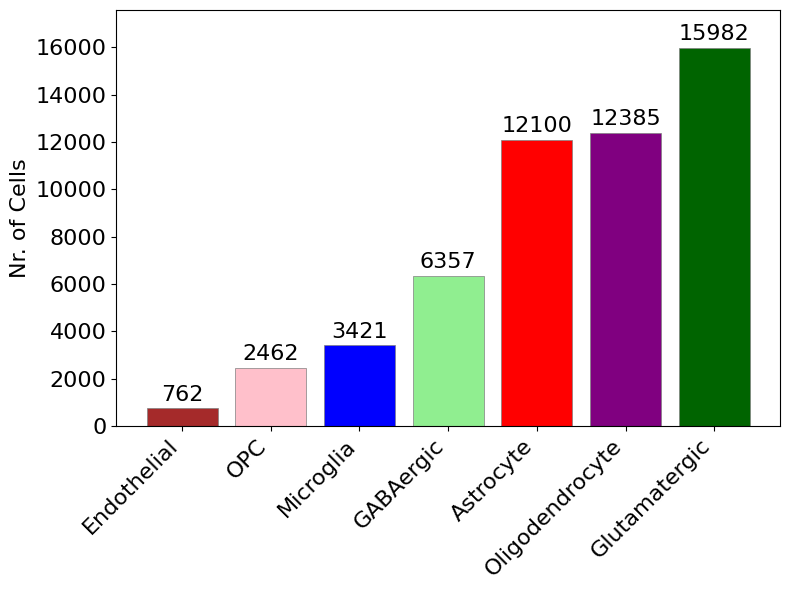

Plot saved at: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/cell_counts_major_cell_type_snRNASeqdata_R1QM3_new.png


In [26]:
### Bar plot to get the number of cells per cell types
import matplotlib.pyplot as plt

# Data
cell_types = ['OPC', 'GABAergic', 'Microglia', 'Endothelial', 'Glutamatergic', 'Astrocyte', 'Oligodendrocyte']
counts = [2462, 6357, 3421, 762, 15982, 12100, 12385]

# Define custom colors for each cell type
celltype_colors = {
    'OPC': 'pink',
    'GABAergic': 'lightgreen',
    'Microglia': 'blue',
    'Endothelial': 'brown',
    'Glutamatergic': 'darkgreen',
    'Astrocyte': 'red',
    'Oligodendrocyte': 'purple'
}

# Sort the data by counts in ascending order
sorted_data = sorted(zip(counts, cell_types))
sorted_counts, sorted_cell_types = zip(*sorted_data)

# Assign colors based on the sorted order
sorted_colors = [celltype_colors[cell] for cell in sorted_cell_types]

# Create the bar plot
plt.figure(figsize=(8, 6))  # Adjusted figure size for better readability
plt.bar(sorted_cell_types, sorted_counts, color=sorted_colors, edgecolor='grey', linewidth=0.5)  # Lighten bar edges

# Increase y-axis limit for better visibility
plt.ylim(0, max(sorted_counts) * 1.1)  # Add 10% extra space above the highest bar

# Add labels and title
plt.ylabel('Nr. of Cells', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=16)  # Rotate x-axis labels
plt.yticks(fontsize=16)

# Annotate bar values
for i, count in enumerate(sorted_counts):
    plt.text(i, count + (max(sorted_counts) * 0.02), str(count), ha='center', fontsize=16)  # Position numbers slightly above bars

# Save the plot
output_path = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/cell_counts_major_cell_type_snRNASeqdata_R1QM3_new.png"
plt.tight_layout()
plt.savefig(output_path, dpi=300)  # Save with high resolution (300 dpi)

# Show the plot
plt.show()

print(f"Plot saved at: {output_path}")


Loading TTRUTH data...


C:\Users\labuser\AppData\Local\Temp\ipykernel_9996\3369769531.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(sorted_cell_types, rotation=45, ha="right", fontsize=16)


Combined plot saved at: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/Reviewer1_MinorQuestion3_A&B.png


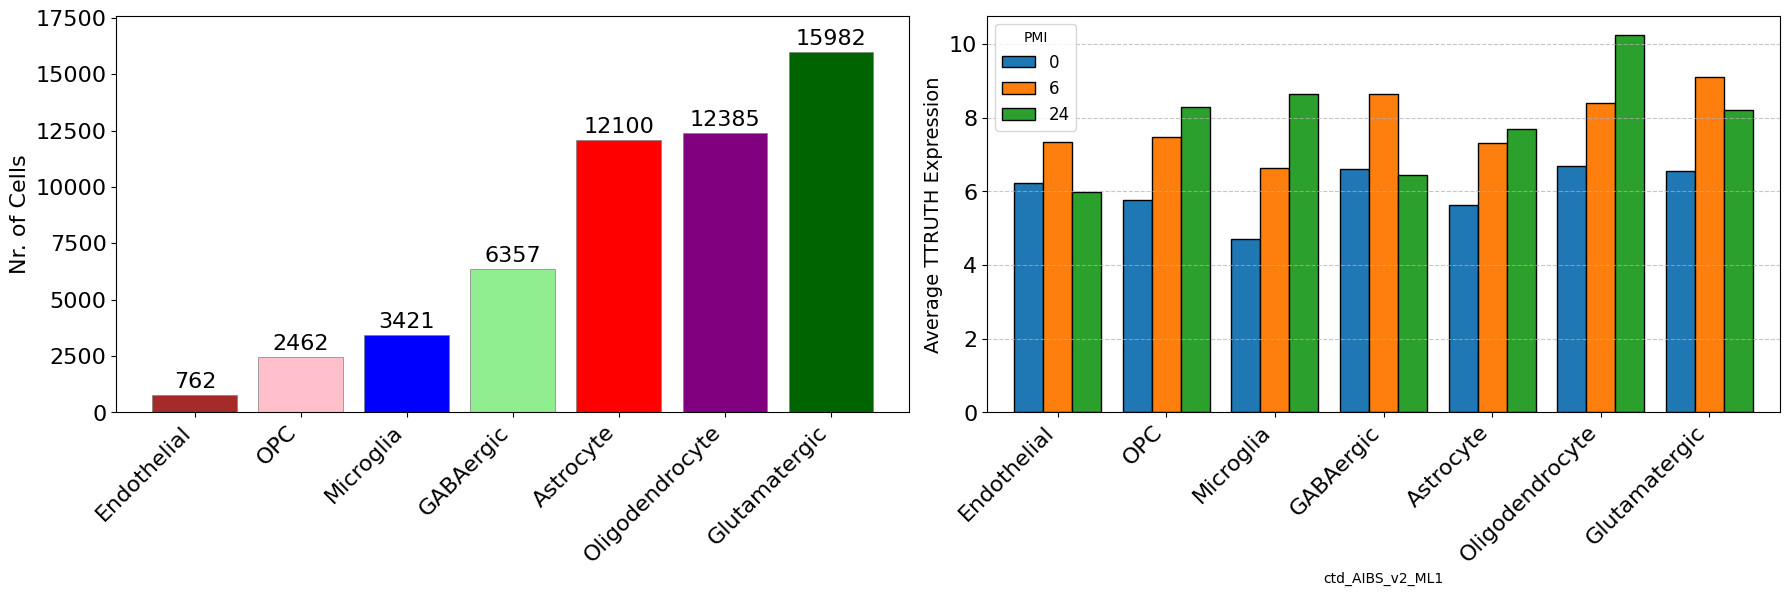

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# ============================
# Common Cell Order from Cell Counts Data
# ============================
# Data for cell counts
cell_types = ['OPC', 'GABAergic', 'Microglia', 'Endothelial', 'Glutamatergic', 'Astrocyte', 'Oligodendrocyte']
counts = [2462, 6357, 3421, 762, 15982, 12100, 12385]

# Define custom colors for each cell type
celltype_colors = {
    'OPC': 'pink',
    'GABAergic': 'lightgreen',
    'Microglia': 'blue',
    'Endothelial': 'brown',
    'Glutamatergic': 'darkgreen',
    'Astrocyte': 'red',
    'Oligodendrocyte': 'purple'
}

# Sort the cell types by counts in ascending order
sorted_data = sorted(zip(counts, cell_types))
sorted_counts, sorted_cell_types = zip(*sorted_data)
sorted_cell_types = list(sorted_cell_types)  # common order for both plots

# ============================
# Function 1: TTRUTH Expression Bar Plot (Now Right Panel)
# ============================
# Input file path for TTRUTH data
input_file = "C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/snRNAseq_object_metadata_umap_TTRUTH_genes_sum_scaled_info.csv"

print("Loading TTRUTH data...")
data = pd.read_csv(input_file, index_col=0)

# Group the data by cell type and PMI, calculating the mean of "TTRUTH_Sum"
grouped = data.groupby(["ctd_AIBS_v2_ML1", "PMI"])["TTRUTH_Sum"].mean().reset_index()

# Pivot the grouped data so that each cell type has a column for each PMI (e.g., 0, 6, 24)
pivot_table = grouped.pivot(index="ctd_AIBS_v2_ML1", columns="PMI", values="TTRUTH_Sum")

# Reindex the pivot_table so that the cell types follow the sorted order from the cell counts data
pivot_table = pivot_table.reindex(sorted_cell_types)

# ============================
# Create a figure with two subplots side by side
# ============================
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# --- Plot 1: Cell Counts (Left Panel) ---
axs[0].bar(sorted_cell_types, sorted_counts, color=[celltype_colors[cell] for cell in sorted_cell_types],
           edgecolor='grey', linewidth=0.5)
axs[0].set_ylim(0, max(sorted_counts) * 1.1)
axs[0].set_ylabel("Nr. of Cells", fontsize=16)
axs[0].set_xticklabels(sorted_cell_types, rotation=45, ha="right", fontsize=16)
axs[0].tick_params(axis='y', labelsize=16)
for i, count in enumerate(sorted_counts):
    axs[0].text(i, count + max(sorted_counts) * 0.02, str(count), ha='center', fontsize=16)

# --- Plot 2: TTRUTH Expression (Right Panel) ---
pivot_table.plot(kind="bar", edgecolor="black", width=0.8, ax=axs[1])
axs[1].set_ylabel("Average TTRUTH Expression", fontsize=14)
axs[1].set_xticklabels(pivot_table.index, rotation=45, ha="right", fontsize=16)
axs[1].tick_params(axis='y', labelsize=16)
axs[1].grid(axis="y", linestyle="--", alpha=0.7)
axs[1].legend(title="PMI", fontsize=12)

# ============================
# Save the merged plot
# ============================
merged_output_path = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/Reviewer1_MinorQuestion3_A&B.png"
plt.tight_layout()
plt.savefig(merged_output_path, dpi=300)
print(f"Combined plot saved at: {merged_output_path}")

# Show the combined plot
plt.show()


PCA plot saved at: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024\LPMI_DESeq2_normalized_counts_covaraite_considered_for_Cause_of_death_PCA_plot.png


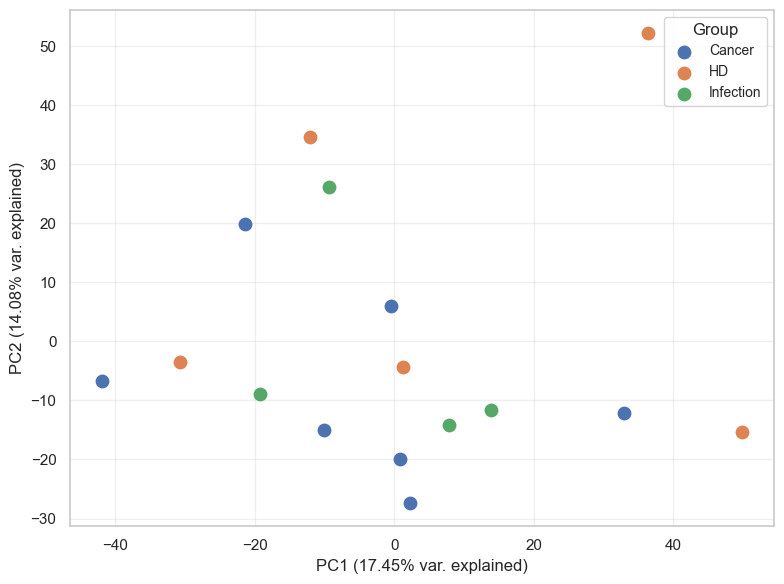

In [10]:
#### Make a PCA for the LPMI samples to know if the cause of death could force the samples to cluster into specific domain or not. This is for reviewer 2 question 2

import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# -----------------------------------------------------------------------------
# 1) File Paths
# -----------------------------------------------------------------------------
file_dir = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024"
exp_file = os.path.join(file_dir, "LPMI_DESeq2_normalized_counts_covaraite_considered_for_Cause_of_death_PCA.csv")
meta_file = os.path.join(file_dir, "LPMI_DESeq2_normalized_counts_covaraite_considered_for_Cause_of_death_PCA_metadata.csv")

# -----------------------------------------------------------------------------
# 2) Load Expression and Metadata
# -----------------------------------------------------------------------------
# Read expression data (genes as rows, samples as columns)
exp_df = pd.read_csv(exp_file, index_col=0)  # index_col=0 means the first column is gene names

# Read metadata (each row is a sample, with a "Group" column)
meta_df = pd.read_csv(meta_file, index_col=0)  
# Ensure the index of meta_df corresponds to the columns of exp_df.
# If the metadata file uses a different column for sample names, adjust accordingly, e.g.:
# meta_df.set_index('sample_column_name', inplace=True)

# -----------------------------------------------------------------------------
# 3) Prepare Data for PCA
# -----------------------------------------------------------------------------
# Transpose exp_df so rows = samples, columns = genes (PCA expects samples x features)
X = exp_df.T

# Keep only samples that appear in both the expression data and metadata
common_samples = X.index.intersection(meta_df.index)
X = X.loc[common_samples]
meta_df = meta_df.loc[common_samples]

# -----------------------------------------------------------------------------
# 4) Run PCA (2 Components) Using scikit-learn
# -----------------------------------------------------------------------------
pca = PCA(n_components=2)
pca_coords = pca.fit_transform(X)  # shape = (number_of_samples, 2)

# Create a DataFrame with PC1, PC2, and group info
pca_df = pd.DataFrame(pca_coords, columns=['PC1', 'PC2'], index=common_samples)
pca_df['Group'] = meta_df['Group']

# Calculate the explained variance for labeling axes
var_exp = pca.explained_variance_ratio_ * 100  # in percent

# -----------------------------------------------------------------------------
# 5) Plot the PCA
# -----------------------------------------------------------------------------
plt.figure(figsize=(8, 6))

# Plot each group with a unique color
groups = pca_df['Group'].unique()
for g in groups:
    subset = pca_df[pca_df['Group'] == g]
    plt.scatter(subset['PC1'], subset['PC2'], label=g, s=80)

plt.xlabel(f"PC1 ({var_exp[0]:.2f}% var. explained)", fontsize=12)
plt.ylabel(f"PC2 ({var_exp[1]:.2f}% var. explained)", fontsize=12)
plt.legend(title="Group", fontsize=10)
plt.grid(True, alpha=0.3)

# Save the plot if desired
output_plot = os.path.join(file_dir, "LPMI_DESeq2_normalized_counts_covaraite_considered_for_Cause_of_death_PCA_plot.png")
plt.tight_layout()
plt.savefig(output_plot, dpi=300)
print(f"PCA plot saved at: {output_plot}")

# Show the plot
plt.show()


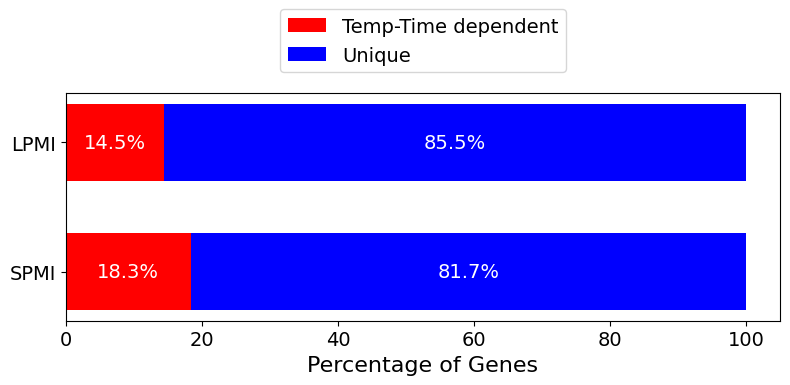

Horizontal stacked bar plot saved at: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/Response to reviewer 1 minor question 2 section B_horizontal.png


In [37]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------
# Step 1: Read the Excel File
# ----------------------------
directory = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/"
file_name = "Union_of_surgery_derived_DEG_and_SPMI_LPMI_DEGs_bar_plot.xlsx"
file_path = os.path.join(directory, file_name)

# Read the Excel file (assumes data is in the first sheet)
df = pd.read_excel(file_path)

# ----------------------------
# Step 2: Extract Gene Lists from Columns
# ----------------------------
genes_col1 = set(df.iloc[:, 0].dropna().astype(str))
genes_col2 = set(df.iloc[:, 1].dropna().astype(str))
genes_col3 = set(df.iloc[:, 2].dropna().astype(str))

# ----------------------------
# Step 3: Compute Common and Unique Percentages (Two Categories)
# ----------------------------
def compute_percentages_two_categories(set1, set2):
    """Compute percentage of common genes and unique genes (symmetric difference) based on the union."""
    common = set1.intersection(set2)
    unique = set1.symmetric_difference(set2)
    union_total = set1.union(set2)
    total = len(union_total) if len(union_total) > 0 else 1
    pct_common = len(common) / total * 100
    pct_unique = len(unique) / total * 100
    return pct_common, pct_unique

# For Column 1 vs Column 2 (annotate as SPMI)
pct_common_12, pct_unique_12 = compute_percentages_two_categories(genes_col1, genes_col2)

# For Column 1 vs Column 3 (annotate as LPMI)
pct_common_13, pct_unique_13 = compute_percentages_two_categories(genes_col1, genes_col3)

# ----------------------------
# Step 4: Prepare Data for Plotting
# ----------------------------
# Create a DataFrame with two comparisons and two categories:
# "Temp-Time dependent" (for common genes) and "Unique" (for unique genes)
plot_data = pd.DataFrame({
    'Comparison': ['SPMI', 'LPMI'],
    'Temp-Time dependent': [pct_common_12, pct_common_13],
    'Unique': [pct_unique_12, pct_unique_13]
})

# Melt the DataFrame to long format for stacked bar plotting
plot_data_long = plot_data.melt(id_vars='Comparison', 
                                value_vars=['Temp-Time dependent', 'Unique'],
                                var_name='Category', value_name='Percentage')

# ----------------------------
# Step 5: Create a Horizontal Stacked Bar Plot
# ----------------------------
fig, ax = plt.subplots(figsize=(8, 4))

# Define the y positions and bar height
comparisons = plot_data['Comparison']
y = np.arange(len(comparisons))
bar_height = 0.6

# Define colors: "Temp-Time dependent" as red and "Unique" as blue
colors = {'Temp-Time dependent': 'red', 'Unique': 'blue'}

# Initialize the left offset for stacking
left = np.zeros(len(comparisons))

for cat in ['Temp-Time dependent', 'Unique']:
    # Extract the values for the current category in the order of comparisons
    cat_values = plot_data_long[plot_data_long['Category'] == cat]['Percentage'].values
    bars = ax.barh(y, cat_values, bar_height, left=left, color=colors[cat], label=cat)
    
    # Annotate each bar segment with its percentage value
    for i, bar in enumerate(bars):
        width = bar.get_width()
        if width > 0:
            ax.text(left[i] + width/2, y[i], f"{width:.1f}%", 
                    ha='center', va='center', color='white', fontsize=14)
    left += cat_values

# Customize y-axis and labels with increased font sizes
ax.set_yticks(y)
ax.set_yticklabels(comparisons, fontsize=14)
ax.set_xlabel("Percentage of Genes", fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.legend(loc="lower center", bbox_to_anchor=(0.5, 1.05), fontsize=14, title_fontsize=14)

plt.tight_layout()

# Save the figure
output_file = os.path.join(directory, "Response to reviewer 1 minor question 2 section B_horizontal.png")
plt.savefig(output_file, dpi=300, bbox_inches='tight')
plt.show()

print(f"Horizontal stacked bar plot saved at: {output_file}")


C:\Users\labuser\AppData\Local\Programs\Python\Python310\lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
C:\Users\labuser\AppData\Local\Programs\Python\Python310\lib\site-packages\upsetplot\plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object 

<Figure size 1000x800 with 0 Axes>

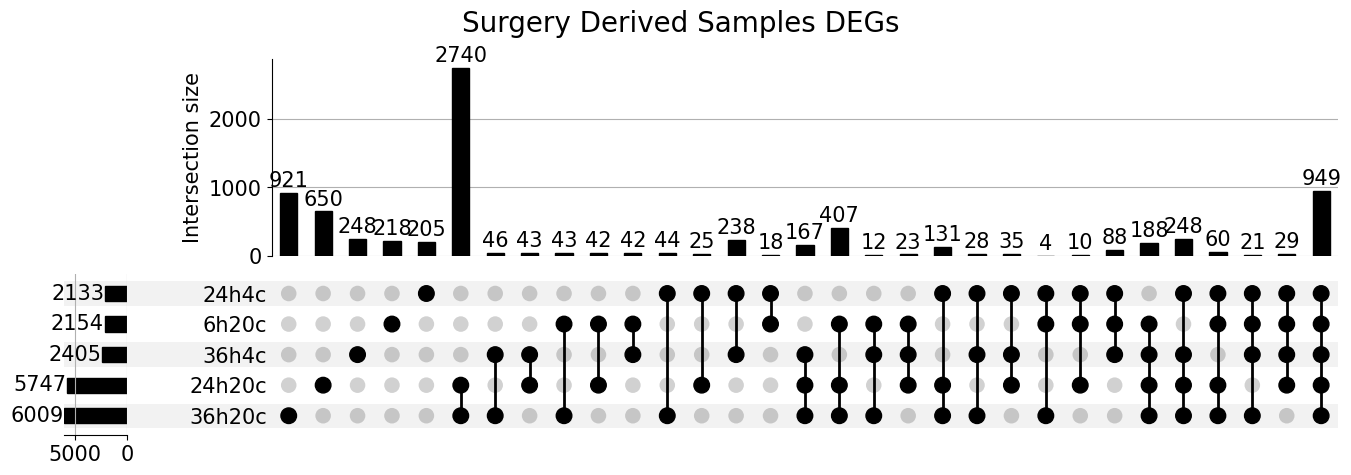

UpSet plot saved at: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024\Surgery_DEGs_UpSet_new_plot.png


In [42]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_indicators

# Increase default font size for all text in the plot
plt.rcParams.update({'font.size': 15})

# =============================================================================
# 1) Load the Data (surgery_test.xlsx only)
# =============================================================================
file_dir = r"C:\Users\labuser\Downloads\Moein\UK DRI\new_aligned_samples\new_DEG_analysis_new_aligned_samples"
surgery_file = os.path.join(file_dir, "surgery_test.xlsx")
surgery_df = pd.read_excel(surgery_file, header=0)

# =============================================================================
# 2) Build a Membership DataFrame for the Five Surgery Columns
# =============================================================================
membership = {}
for col in surgery_df.columns:
    membership[col] = set(surgery_df[col].dropna().astype(str))

all_genes = set().union(*membership.values())
membership_df = pd.DataFrame(index=list(all_genes))
for col in surgery_df.columns:
    membership_df[col] = membership_df.index.isin(membership[col])

# =============================================================================
# 3) Prepare Data for UpSet Plot Using from_indicators
# =============================================================================
data_overall = from_indicators(membership_df)
data_overall = data_overall.groupby(level=list(range(data_overall.index.nlevels))).sum()

# =============================================================================
# 4) Create the UpSet Plot
# =============================================================================
fig = plt.figure(figsize=(10, 8))
upset = UpSet(data_overall, show_counts=True)
upset.plot()  # Plot the UpSet plot (no ax parameter is supported)
plt.suptitle("Surgery Derived Samples DEGs", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for the suptitle

# =============================================================================
# 5) Save the Figure
# =============================================================================
target_dir = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024"
os.makedirs(target_dir, exist_ok=True)
output_file = os.path.join(target_dir, "Surgery_DEGs_UpSet_new_plot.png")
plt.savefig(output_file, dpi=300, bbox_inches='tight')
plt.show()

print(f"UpSet plot saved at: {output_file}")


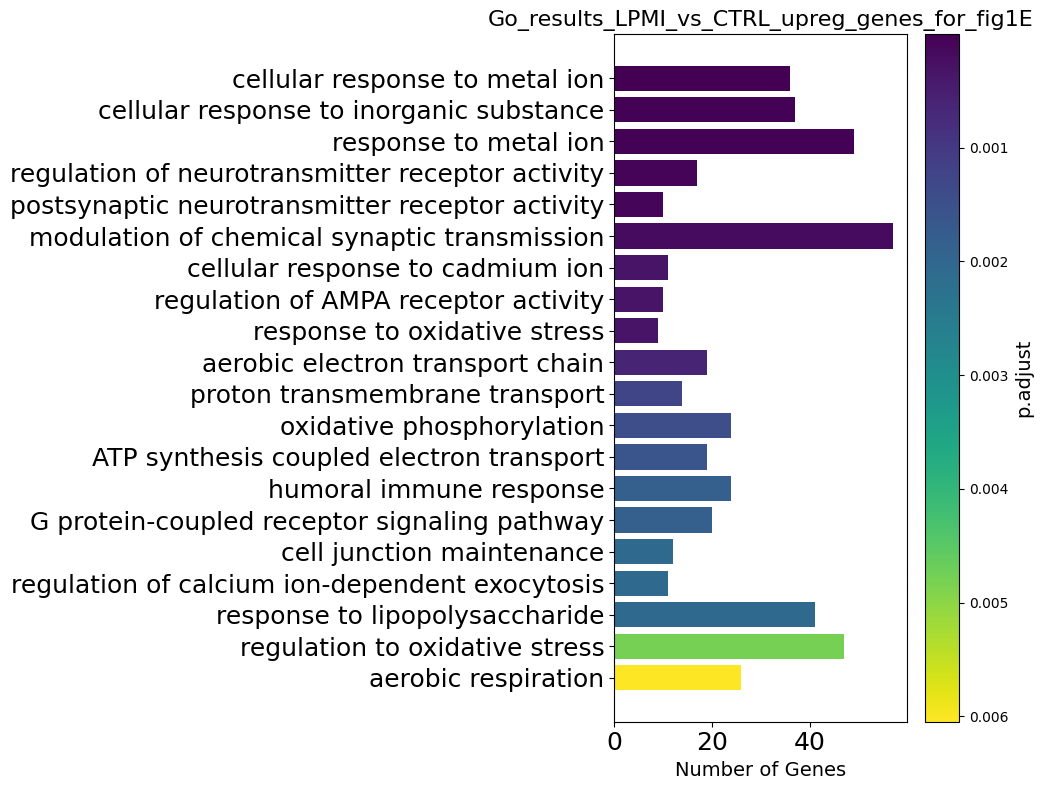

Plot saved at: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024\Go_results_LPMI_vs_CTRL_upreg_genes_for_fig1E.png


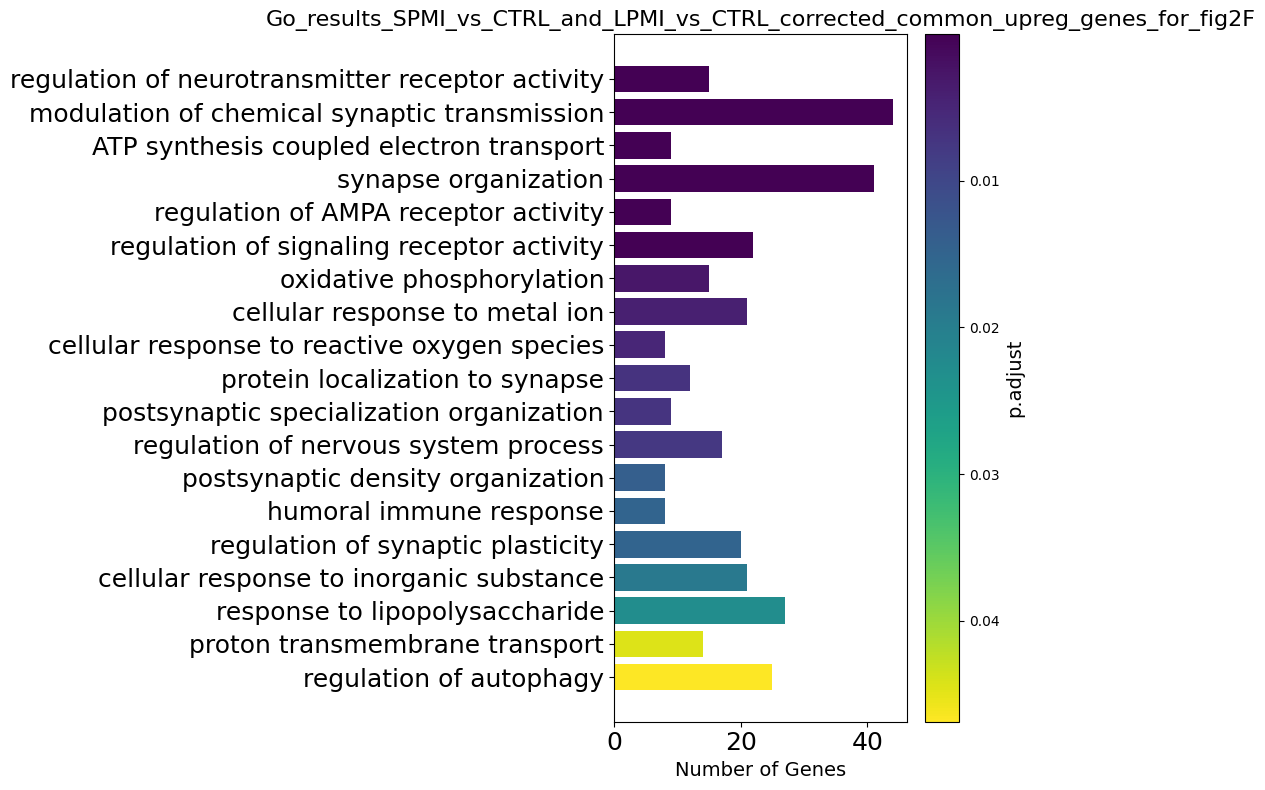

Plot saved at: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024\Go_results_SPMI_vs_CTRL_and_LPMI_vs_CTRL_corrected_common_upreg_genes_for_fig2F.png


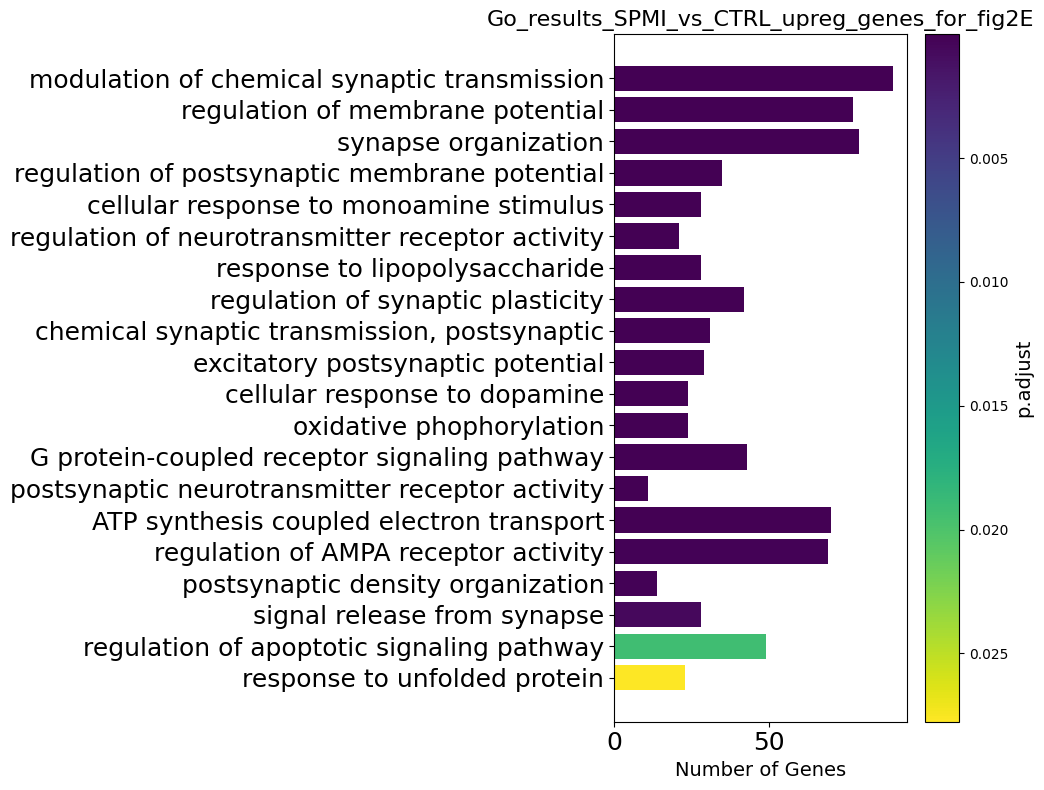

Plot saved at: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024\Go_results_SPMI_vs_CTRL_upreg_genes_for_fig2E.png


In [11]:
#### This section is done after correcting the DEGs between LPMI vs CTRL and SPMI vs CTRL for the age, sex. 
#### Even though the terms are quite similar between this analysis and previuos one I decoded to use new color pallete. 
####I did GO analysis using cluster profiler and then now I need to plot the results here
#### insteda of using the direct output of the cluterprofiler plot. 
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# Define the base directory and file names (assuming .xlsx extension)
base_dir = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024"
file_names = [
    "Go_results_LPMI_vs_CTRL_upreg_genes_for_fig1E.xlsx",
    "Go_results_SPMI_vs_CTRL_and_LPMI_vs_CTRL_corrected_common_upreg_genes_for_fig2F.xlsx",
    "Go_results_SPMI_vs_CTRL_upreg_genes_for_fig2E.xlsx"
]

for file in file_names:
    file_path = os.path.join(base_dir, file)
    
    # Read the Excel file into a DataFrame
    df = pd.read_excel(file_path)
    
    # Rename columns to standard names: "term", "p_adjust", "gene_number"
    # Assumes first column: term names, second: p.adjust, third: gene number
    df.columns = ["term", "p_adjust", "gene_number"]
    
    # Sort the dataframe by p.adjust (lowest to highest) and then reverse the order
    # so the term with the lowest p.adjust is at the top.
    df = df.sort_values("p_adjust", ascending=True).iloc[::-1]
    
    # Create a normalization object for the p.adjust values for colormap mapping
    norm = mpl.colors.Normalize(vmin=df["p_adjust"].min(), vmax=df["p_adjust"].max())
    cmap = mpl.cm.viridis  # Choose a colormap
    colors = cmap(norm(df["p_adjust"]))
    
    # Create the horizontal bar plot
    fig, ax = plt.subplots(figsize=(10, 8))
    bars = ax.barh(df["term"], df["gene_number"], color=colors)
    ax.set_xlabel("Number of Genes", fontsize=14)
    ax.set_title(file.replace(".xlsx", ""), fontsize=16)
    
    # Increase the font size on the Y axis
    ax.tick_params(axis='y', labelsize=18)

    # Increase font size of x-axis tick labels
    ax.tick_params(axis='x', labelsize=18)
    
    # Create a colorbar for the p.adjust values and invert its direction
    sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("p.adjust", fontsize=14)
    cbar.ax.invert_yaxis()  # Invert the colorbar so lower values are at the top
    
    plt.tight_layout()
    
    # Save the plot as a PNG file in the same directory (using the same file name with .png extension)
    output_file = os.path.join(base_dir, file.replace(".xlsx", ".png"))
    plt.savefig(output_file, dpi=300, bbox_inches="tight")
    plt.show()
    
    print(f"Plot saved at: {output_file}")



In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# Define the base directory and file names (assuming .xlsx extension)
base_dir = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024"
file_names = [
    "Go_results_LPMI_vs_CTRL_upreg_genes_for_fig1E.xlsx",
    "Go_results_SPMI_vs_CTRL_and_LPMI_vs_CTRL_corrected_common_upreg_genes_for_fig2F.xlsx",
    "Go_results_SPMI_vs_CTRL_upreg_genes_for_fig2E.xlsx"
]

# Set a consistent figure size (width and height)
fig_size = (5, 8)

for file in file_names:
    file_path = os.path.join(base_dir, file)
    
    # Read the Excel file into a DataFrame
    df = pd.read_excel(file_path)
    
    # Rename columns to standard names: "term", "p_adjust", "gene_number"
    # Assumes first column: term names, second: p.adjust, third: gene number
    df.columns = ["term", "p_adjust", "gene_number"]
    
    # Sort the dataframe by p.adjust (lowest to highest) and then reverse the order 
    # so that the term with the lowest p.adjust is at the top.
    df = df.sort_values("p_adjust", ascending=True).iloc[::-1]
    
    # Create a normalization object for the p.adjust values for colormap mapping
    norm = mpl.colors.Normalize(vmin=df["p_adjust"].min(), vmax=df["p_adjust"].max())
    cmap = mpl.cm.viridis  # Choose a colormap
    colors = cmap(norm(df["p_adjust"]))
    
    # Create the horizontal bar plot with a consistent size
    fig, ax = plt.subplots(figsize=fig_size)
    bars = ax.barh(df["term"], df["gene_number"], color=colors)
    ax.set_xlabel("Number of Genes", fontsize=14)
    ax.set_title(file.replace(".xlsx", ""), fontsize=16)
    
    # Remove term names by clearing y-axis tick labels
    ax.set_yticklabels([])
    
    # Increase font size of x-axis tick labels
    ax.tick_params(axis='x', labelsize=18)
    
    # Create a colorbar for the p.adjust values and invert its direction
    sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("p.adjust", fontsize=14)
    cbar.ax.invert_yaxis()  # Lower p.adjust values at the top of the colorbar
    
    plt.tight_layout()
    
    # Save the plot as a new PNG file, appending '_no_term_name' to the filename
    output_file = os.path.join(base_dir, file.replace(".xlsx", "_no_term_name.png"))
    plt.savefig(output_file, dpi=300, bbox_inches="tight")
    plt.close()
    
    print(f"Plot saved at: {output_file}")


Plot saved at: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024\Go_results_LPMI_vs_CTRL_upreg_genes_for_fig1E_no_term_name.png
Plot saved at: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024\Go_results_SPMI_vs_CTRL_and_LPMI_vs_CTRL_corrected_common_upreg_genes_for_fig2F_no_term_name.png
Plot saved at: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024\Go_results_SPMI_vs_CTRL_upreg_genes_for_fig2E_no_term_name.png


Data loaded. Columns: ['Unnamed: 0', 'PC1', 'PC2', 'Group', 'SampleID', 'cluster']
First few rows:
    Unnamed: 0         PC1        PC2 Group SampleID  cluster
0           1 -131.126207 -56.796052  SPMI    SPMI3        2
1           2 -108.805003  18.348876  SPMI    SPMI1        2
2           3 -148.775802 -99.691510  SPMI    SPMI6        2
3           4  -78.665557  -9.053296  SPMI    SPMI7        2
4           5 -125.097755  26.855573  SPMI    SPMI9        2
Plot saved at: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024\SPMI_CTRL_PCA_with_clusters_no_term_labels.png


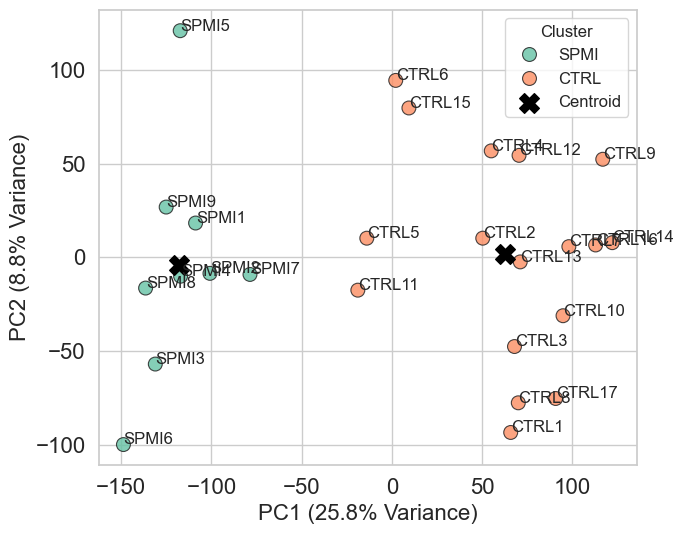

In [15]:
#### New PCA plot for SPMI vs CTRL samples after correcting for age, sex and RIN. This plot goes to figure 2C
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def main():
    # Define the base directory and file name
    base_dir = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024"
    file_name = "SPMI_vs_CTRL_normalized_counts_Age_Sex_RIN_correction_PC_values.csv"
    file_path = os.path.join(base_dir, file_name)
    
    # Load the CSV file
    df = pd.read_csv(file_path)
    print("Data loaded. Columns:", df.columns.tolist())
    print("First few rows:\n", df.head())
    
    # Ensure 'cluster' is treated as a categorical variable and map clusters:
    df['cluster'] = df['cluster'].astype(str)
    # Map cluster "1" to "CTRL" and cluster "2" to "SPMI"
    df['cluster'] = df['cluster'].replace({"1": "CTRL", "2": "SPMI"})
    
    # Compute the centroids for each cluster using the mean of PC1 and PC2
    centroids = df.groupby('cluster')[['PC1', 'PC2']].mean().reset_index()
    
    # Create the scatter plot
    plt.figure(figsize=(7, 5.5))
    sns.set(style="whitegrid")
    
    # Scatter plot: color points by the mapped 'cluster' values
    scatter = sns.scatterplot(
        data=df,
        x='PC1',
        y='PC2',
        hue='cluster',
        palette='Set2',
        s=100,
        edgecolor='k',
        alpha=0.8
    )
    
    # Annotate each sample with its SampleID with increased font size
    for idx, row in df.iterrows():
        plt.text(row['PC1'] + 0.1, row['PC2'] + 0.1, row['SampleID'], fontsize=12)
    
    # Overlay the cluster centroids as black 'X' markers
    plt.scatter(
        centroids['PC1'],
        centroids['PC2'],
        c='black',
        marker='X',
        s=200,
        label='Centroid'
    )
    
    # Set axis labels with increased font size
    plt.xlabel("PC1 (25.8% Variance)", fontsize=16)
    plt.ylabel("PC2 (8.8% Variance)", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    # Show legend with specified font sizes
    plt.legend(title="Cluster", fontsize=12, title_fontsize=12)
    
    plt.tight_layout()
    
    # Save the figure in the same directory with an updated file name
    output_file = os.path.join(base_dir, "SPMI_vs_CTRL_normalized_counts_Age_Sex_RIN_correction_PCA_plot_figure2C.png")
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    print("Plot saved at:", output_file)
    
    plt.show()

if __name__ == "__main__":
    main()


Data loaded. Columns: ['SampleID', 'PC1', 'PC2', 'Group', 'cluster']
First few rows:
   SampleID        PC1        PC2 Group  cluster
0    LPMI1 -73.590177 -28.294082  LPMI        1
1   LPMI10 -94.056150  72.232676  LPMI        1
2   LPMI11 -64.535600  29.631291  LPMI        1
3   LPMI12 -49.863331  85.266788  LPMI        1
4   LPMI13 -91.992462  52.328920  LPMI        1
Plot saved at: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024\LPMI_vs_CTRL_normalized_counts_Age_Sex_RIN_correction_PCA_plot_figure1C.png


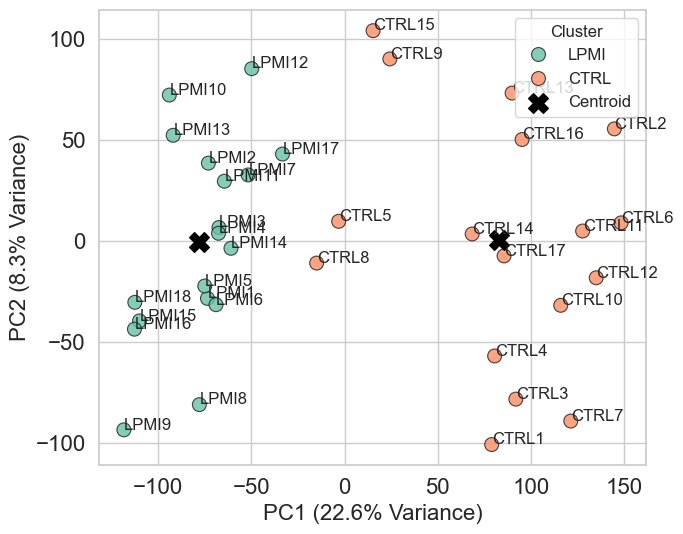

In [17]:
#### New PCA plot for LPMI vs CTRL samples after correcting for age, sex and RIN. This plot goes to figure 1C
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def main():
    # Define the base directory and file name
    base_dir = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024"
    file_name = "LPMI_vs_CTRL_normalized_counts_Age_Sex_RIN_correction_PC_values.csv"
    file_path = os.path.join(base_dir, file_name)
    
    # Load the CSV file
    df = pd.read_csv(file_path)
    print("Data loaded. Columns:", df.columns.tolist())
    print("First few rows:\n", df.head())
    
    # Ensure 'cluster' is treated as a categorical variable and map clusters:
    df['cluster'] = df['cluster'].astype(str)
    # Map cluster "1" to "CTRL" and cluster "2" to "SPMI"
    df['cluster'] = df['cluster'].replace({"2": "CTRL", "1": "LPMI"})
    
    # Compute the centroids for each cluster using the mean of PC1 and PC2
    centroids = df.groupby('cluster')[['PC1', 'PC2']].mean().reset_index()
    
    # Create the scatter plot
    plt.figure(figsize=(7, 5.5))
    sns.set(style="whitegrid")
    
    # Scatter plot: color points by the mapped 'cluster' values
    scatter = sns.scatterplot(
        data=df,
        x='PC1',
        y='PC2',
        hue='cluster',
        palette='Set2',
        s=100,
        edgecolor='k',
        alpha=0.8
    )
    
    # Annotate each sample with its SampleID with increased font size
    for idx, row in df.iterrows():
        plt.text(row['PC1'] + 0.1, row['PC2'] + 0.1, row['SampleID'], fontsize=12)
    
    # Overlay the cluster centroids as black 'X' markers
    plt.scatter(
        centroids['PC1'],
        centroids['PC2'],
        c='black',
        marker='X',
        s=200,
        label='Centroid'
    )
    
    # Set axis labels with increased font size
    plt.xlabel("PC1 (22.6% Variance)", fontsize=16)
    plt.ylabel("PC2 (8.3% Variance)", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    # Show legend with specified font sizes
    plt.legend(title="Cluster", fontsize=12, title_fontsize=12)
    
    plt.tight_layout()
    
    # Save the figure in the same directory with an updated file name
    output_file = os.path.join(base_dir, "LPMI_vs_CTRL_normalized_counts_Age_Sex_RIN_correction_PCA_plot_figure1C.png")
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    print("Plot saved at:", output_file)
    
    plt.show()

if __name__ == "__main__":
    main()


Data loaded. Columns: ['Unnamed: 0', 'PC1', 'PC2', 'Group', 'SampleID', 'cluster']
First few rows:
    Unnamed: 0         PC1        PC2   Group     SampleID  cluster
0           1  -28.385442  70.536002  36h_4c   36h_4C_S12        1
1           2  105.811487 -14.196036  36h_RT  36h_20C_S12        3
2           3   -4.633769  37.002493  24h_4c   24h_4C_S12        1
3           4  152.983895 -65.413401  24h_RT  24h_20C_S12        3
4           5 -112.363928 -69.619146   6h_4c    6h_4C_S12        2
Plot saved at: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024\CTRL_samples_for_Domian_PCA_Age_Sex_RIN_corrected_PCA_plot_figure3B.png


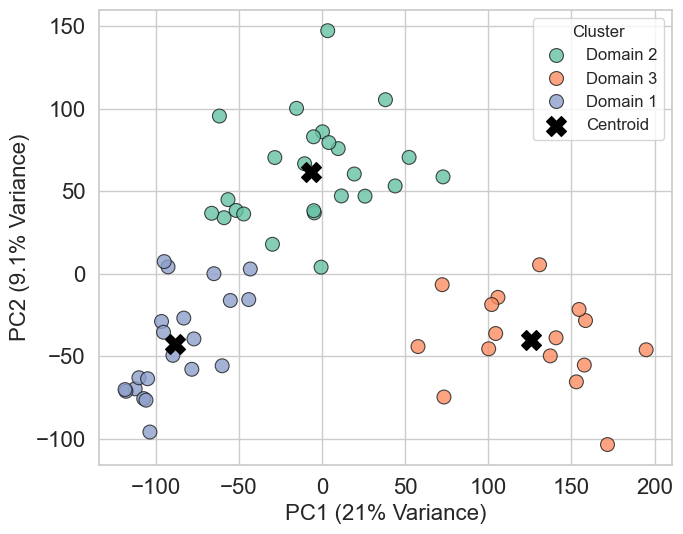

In [24]:
### This section belong to new figure 3B based on the normalized values of CTRL samples
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def main():
    # Define the base directory and file name
    base_dir = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024"
    file_name = "CTRL_samples_for_Domian_PCA_Age_Sex_RIN_corrected_PC_values.csv"
    file_path = os.path.join(base_dir, file_name)
    
    # Load the CSV file
    df = pd.read_csv(file_path)
    print("Data loaded. Columns:", df.columns.tolist())
    print("First few rows:\n", df.head())
    
    # Ensure 'cluster' is treated as a categorical variable and map clusters accordingly:
    df['cluster'] = df['cluster'].astype(str)
    # Map cluster "2" -> "Domain 2", "3" -> "Domain 3", "1" -> "Domain 1"
    df['cluster'] = df['cluster'].replace({"2": "Domain 1", "3": "Domain 3", "1": "Domain 2"})
    
    # Compute the centroids for each cluster using the mean of PC1 and PC2
    centroids = df.groupby('cluster')[['PC1', 'PC2']].mean().reset_index()
    
    # Create the scatter plot
    plt.figure(figsize=(7, 5.5))
    sns.set(style="whitegrid")
    
    # Scatter plot: color points by the mapped 'cluster' values (no sample labels)
    scatter = sns.scatterplot(
        data=df,
        x='PC1',
        y='PC2',
        hue='cluster',
        palette='Set2',
        s=100,
        edgecolor='k',
        alpha=0.8
    )
    
    # Overlay the cluster centroids as black 'X' markers
    plt.scatter(
        centroids['PC1'],
        centroids['PC2'],
        c='black',
        marker='X',
        s=200,
        label='Centroid'
    )
    
    # Set axis labels with increased font size
    plt.xlabel("PC1 (21% Variance)", fontsize=16)
    plt.ylabel("PC2 (9.1% Variance)", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    # Show legend with specified font sizes
    plt.legend(title="Cluster", fontsize=12, title_fontsize=12)
    
    plt.tight_layout()
    
    # Save the figure in the same directory with an updated file name
    output_file = os.path.join(base_dir, "CTRL_samples_for_Domian_PCA_Age_Sex_RIN_corrected_PCA_plot_figure3B.png")
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    print("Plot saved at:", output_file)
    
    plt.show()

if __name__ == "__main__":
    main()



Data loaded. Columns: ['Unnamed: 0', 'PC1', 'PC2', 'Group', 'SampleID', 'cluster']
First few rows:
    Unnamed: 0         PC1        PC2   Group     SampleID  cluster
0           1  -28.385442  70.536002  36h_4c   36h_4C_S12        1
1           2  105.811487 -14.196036  36h_RT  36h_20C_S12        3
2           3   -4.633769  37.002493  24h_4c   24h_4C_S12        1
3           4  152.983895 -65.413401  24h_RT  24h_20C_S12        3
4           5 -112.363928 -69.619146   6h_4c    6h_4C_S12        2
Counts by Cluster and Group:
     cluster   Group  Count
0   Domain 1  0h_80c      8
1   Domain 1  24h_4c      3
2   Domain 1  36h_4c      1
3   Domain 1   6h_4c      6
4   Domain 1   6h_RT      3
5   Domain 2  0h_80c      1
6   Domain 2  24h_4c      6
7   Domain 2  24h_RT      1
8   Domain 2  36h_4c      8
9   Domain 2   6h_4c      3
10  Domain 2   6h_RT      6
11  Domain 3  24h_RT      8
12  Domain 3  36h_RT      8
Plot saved at: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sa

<Figure size 200x600 with 0 Axes>

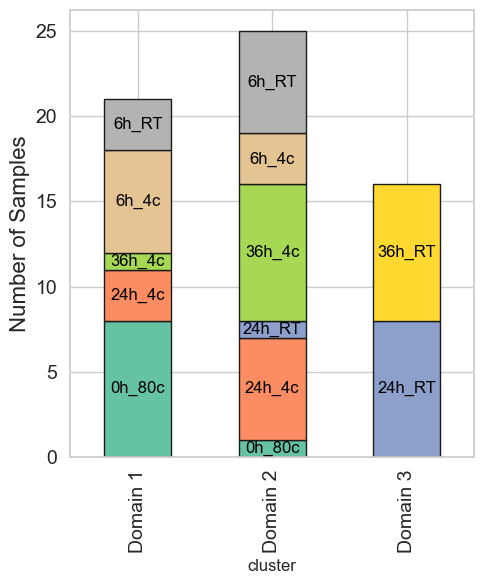

In [33]:
### Making a stacked bar plot so that I know how many samples per group exist in each cluster/domain
import pandas as pd
import matplotlib.pyplot as plt
import os

def main():
    # Define the file path for the CSV file
    base_dir = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024"
    file_name = "CTRL_samples_for_Domian_PCA_Age_Sex_RIN_corrected_PC_values.csv"
    file_path = os.path.join(base_dir, file_name)
    
    # Load the CSV file
    df = pd.read_csv(file_path)
    print("Data loaded. Columns:", df.columns.tolist())
    print("First few rows:\n", df.head())
    
    # Ensure 'cluster' is treated as a categorical variable and map clusters accordingly:
    df['cluster'] = df['cluster'].astype(str)
    # Map clusters: "2" -> "Domain 1", "1" -> "Domain 2", "3" -> "Domain 3"
    df['cluster'] = df['cluster'].replace({"2": "Domain 1", "1": "Domain 2", "3": "Domain 3"})
    
    # Group the data by 'cluster' and 'Group' and count the number of samples in each combination
    counts_df = df.groupby(['cluster', 'Group']).size().reset_index(name='Count')
    print("Counts by Cluster and Group:")
    print(counts_df)
    
    # Pivot the data so that rows are clusters and columns are Groups
    pivot_df = counts_df.pivot(index='cluster', columns='Group', values='Count').fillna(0)
    
    # Set desired domain order
    desired_order = ["Domain 1", "Domain 2", "Domain 3"]
    pivot_df = pivot_df.reindex(desired_order)
    
    # Create a stacked bar plot
    plt.figure(figsize=(2, 6))
    ax = pivot_df.plot(kind='bar', stacked=True, figsize=(5, 6), colormap='Set2', edgecolor='k', legend=False)
    
    # Set axis labels with increased font size
    ax.set_ylabel("Number of Samples", fontsize=16)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    
    # Annotate each stack segment with the Group name
    for i, cluster in enumerate(pivot_df.index):
        cumulative = 0
        for group in pivot_df.columns:
            count = pivot_df.loc[cluster, group]
            if count > 0:
                y_center = cumulative + count / 2.0
                ax.text(i, y_center, str(group), ha='center', va='center', fontsize=12, color='black')
                cumulative += count

    plt.tight_layout()
    
    # Save the plot in the same directory as the input file
    output_file = os.path.join(base_dir, "CTRL_samples_for_Domian_PCA_Age_Sex_RIN_corrected_PCA_stacked_bar_plot.png")
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    print("Plot saved at:", output_file)
    
    plt.show()

if __name__ == "__main__":
    main()



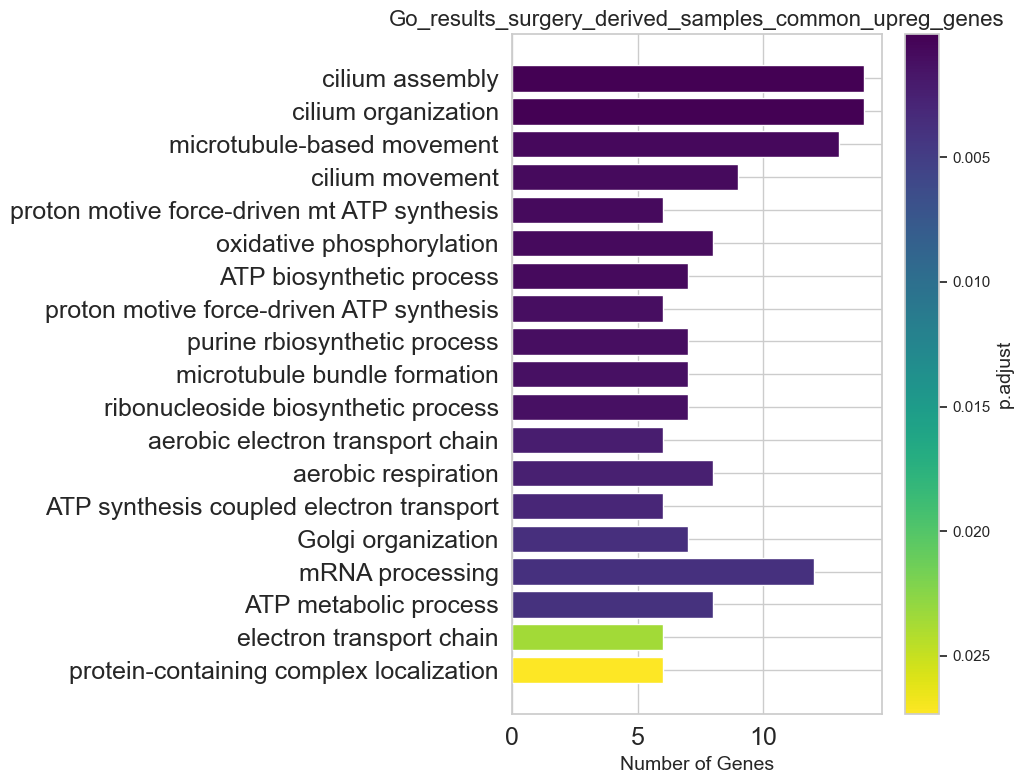

Plot saved at: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024\Go_results_surgery_derived_samples_common_upreg_genes.png


In [36]:
#### This section is done after correcting the DEGs between for the surgery derived samples comparisons for the RIN values. This belong to figure 3D
#### Even though the terms are quite similar between this analysis and previuos one I decided to use new color pallete. 
####I did GO analysis using cluster profiler and then now I need to plot the results here
#### instead of using the direct output of the cluterprofiler plot. 
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

def main():
    # Define the base directory and input file name
    base_dir = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024"
    input_file = "Go_results_surgery_derived_samples_common_upreg_genes.xlsx"
    input_path = os.path.join(base_dir, input_file)
    
    # Read the Excel file from the first sheet
    df = pd.read_excel(input_path, sheet_name=0)
    
    # Rename columns to standard names: "term", "p_adjust", "gene_number"
    # (Assumes that the first three columns of the file are, in order:
    # the term name, the p.adjust, and the gene count.)
    df.columns = ["term", "p_adjust", "gene_number"] + list(df.columns[3:])
    
    # Sort the DataFrame by p.adjust (ascending) and then reverse the order,
    # so that the term with the lowest p.adjust is at the top.
    df = df.sort_values("p_adjust", ascending=True).iloc[::-1]
    
    # Create a normalization object for the p.adjust values and choose a colormap.
    norm = mpl.colors.Normalize(vmin=df["p_adjust"].min(), vmax=df["p_adjust"].max())
    cmap = mpl.cm.viridis
    colors = cmap(norm(df["p_adjust"]))
    
    # Create the horizontal bar plot
    fig, ax = plt.subplots(figsize=(10, 8))
    bars = ax.barh(df["term"], df["gene_number"], color=colors)
    ax.set_xlabel("Number of Genes", fontsize=14)
    ax.set_title(input_file.replace(".xlsx", ""), fontsize=16)
    
    # Increase font size for both x- and y-axis ticks
    ax.tick_params(axis='x', labelsize=18)
    ax.tick_params(axis='y', labelsize=18)
    
    # Create a colorbar for the p.adjust values and invert its direction
    sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("p.adjust", fontsize=14)
    cbar.ax.invert_yaxis()  # Invert the colorbar so that lower values are at the top
    
    plt.tight_layout()
    
    # Save the plot as a PNG file in the same directory.
    output_file = os.path.join(base_dir, input_file.replace(".xlsx", ".png"))
    plt.savefig(output_file, dpi=300, bbox_inches="tight")
    plt.show()
    
    print("Plot saved at:", output_file)

if __name__ == "__main__":
    main()




Data loaded. Columns: ['symbol', 'log2FoldChange', 'padj']
First few rows:
               symbol  log2FoldChange          padj
0  ENSG00000277947.1       -7.094807  7.055444e-03
1  ENSG00000241790.2       -7.082120  8.085835e-08
2  ENSG00000291236.1       -6.979273  1.478620e-02
3  ENSG00000258488.2       -6.905329  1.032324e-02
4  ENSG00000232299.1       -6.435470  1.089997e-01
Volcano plot saved as: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024\LPMI_vs_CTRL_age_sex_RIN_corrected_DEGs_for_volcano_Volcano_plot.png


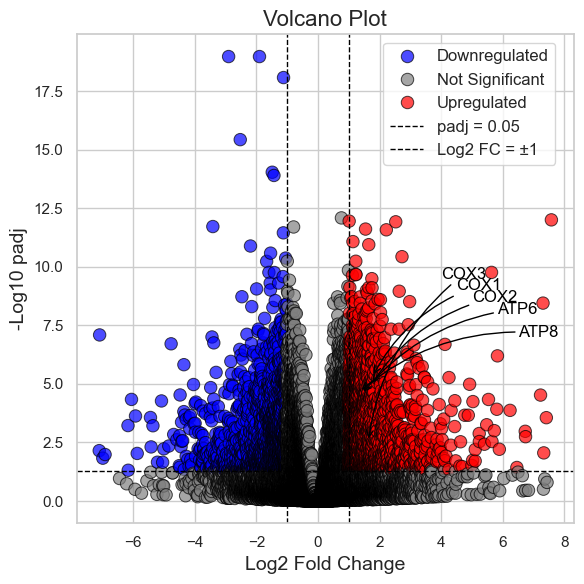

In [57]:
#### Making a volcano plot for the LPMI vs CTRL (new DEGs corrected for age, sex and RIN). This is for figure 1D:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def main():
    # Define the base directory and input file name
    base_dir = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024"
    input_file = "LPMI_vs_CTRL_age_sex_RIN_corrected_DEGs_for_volcano.xlsx"
    input_path = os.path.join(base_dir, input_file)
    
    # Define output file name based on the input file name:
    output_file = os.path.join(base_dir, input_file.replace(".xlsx", "_Volcano_plot.png"))
    
    # Read the Excel file from the first sheet
    df = pd.read_excel(input_path, sheet_name=0)
    print("Data loaded. Columns:", df.columns.tolist())
    print("First few rows:\n", df.head())
    
    # Ensure the columns have the expected names: symbol, log2FoldChange, padj
    # Optionally rename if needed:
    # df.columns = ["symbol", "log2FoldChange", "padj"]
    
    # Replace any zero padj values with a very small number to avoid errors with log10.
    df['padj'] = df['padj'].replace(0, 1e-10)
    
    # Define significance thresholds:
    padj_threshold = 0.05
    log2fc_threshold = 1
    
    # Calculate -log10(padj) for plotting
    df['-log10_padj'] = -np.log10(df['padj'])
    
    # Assign colors based on significance:
    df['Color'] = 'Not Significant'
    df.loc[(df['padj'] < padj_threshold) & (df['log2FoldChange'] > log2fc_threshold), 'Color'] = 'Upregulated'
    df.loc[(df['padj'] < padj_threshold) & (df['log2FoldChange'] < -log2fc_threshold), 'Color'] = 'Downregulated'
    
    # Define a color palette
    color_palette = {
        'Not Significant': 'gray',
        'Upregulated': 'red',
        'Downregulated': 'blue'
    }
    
    # Create volcano plot
    plt.figure(figsize=(6, 6))
    sns.set(style="whitegrid")
    
    sns.scatterplot(
        data=df,
        x='log2FoldChange',
        y='-log10_padj',
        hue='Color',
        palette=color_palette,
        edgecolor='black',
        alpha=0.7,
        s=80
    )
    
    # Add threshold lines for padj and log2FoldChange
    plt.axhline(-np.log10(padj_threshold), linestyle='--', color='black', linewidth=1, label="padj = 0.05")
    plt.axvline(log2fc_threshold, linestyle='--', color='black', linewidth=1, label="Log2 FC = ±1")
    plt.axvline(-log2fc_threshold, linestyle='--', color='black', linewidth=1)
    
    # Set axis labels and title
    plt.xlabel("Log2 Fold Change", fontsize=14)
    plt.ylabel("-Log10 padj", fontsize=14)
    plt.title("Volcano Plot", fontsize=16)
    plt.grid(True)
    
    # Place the legend inside the plot (upper left, adjusted upward)
    plt.legend(fontsize=12, title_fontsize=13, loc="upper left", bbox_to_anchor=(0.60, 1.00))
    
    # --- Annotate Specific Transcript IDs Using Defined Coordinates ---
    # Define a mapping: transcript ID -> (annotation label, x annotation coordinate, y annotation coordinate)
    mapping_coords = {
        "ENSG00000228253.1": ("ATP8", 6.5, 7.0),
        "ENSG00000198899.2": ("ATP6", 5.8, 8.0),
        "ENSG00000198804.2": ("COX1", 4.5, 9.0),
        "ENSG00000198712.1": ("COX2", 5.0, 8.5),
        "ENSG00000198938.2": ("COX3", 4.0, 9.5)
    }
    
    for transcript, (annot_label, x_annot, y_annot) in mapping_coords.items():
        if transcript in df["symbol"].values:
            # Retrieve the data point for this transcript (for arrow tail)
            gene_row = df[df["symbol"] == transcript].iloc[0]
            x = gene_row["log2FoldChange"]
            y = gene_row["-log10_padj"]
            
            plt.annotate(
                annot_label,
                xy=(x, y),
                xytext=(x_annot, y_annot),
                textcoords="data",
                arrowprops=dict(
                    arrowstyle="->",
                    color="black",
                    lw=1,
                    shrinkA=0,
                    shrinkB=0,
                    connectionstyle="arc3,rad=0.2"
                ),
                fontsize=12,
                color="black"
            )
        else:
            print(f"{transcript} not found in dataset.")
    
    plt.tight_layout()
    
    # Save the volcano plot as a PNG file
    plt.savefig(output_file, dpi=300, bbox_inches="tight")
    print("Volcano plot saved as:", output_file)
    
    plt.show()

if __name__ == "__main__":
    main()

Data loaded. Columns: ['symbol', 'log2FoldChange', 'padj']
First few rows:
               symbol  log2FoldChange          padj
0  ENSG00000276085.1       -9.595831  1.868300e-03
1  ENSG00000291301.1       -9.527065  1.893273e-01
2  ENSG00000241790.2       -9.441086  7.108247e-12
3  ENSG00000274615.1       -8.861917  1.660552e-05
4  ENSG00000288000.1       -8.805528  1.398064e-04
Volcano plot saved as: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024\SPMI_vs_CTRL_age_sex_RIN_corrected_DEGs_for_volcano_Volcano_plot.png


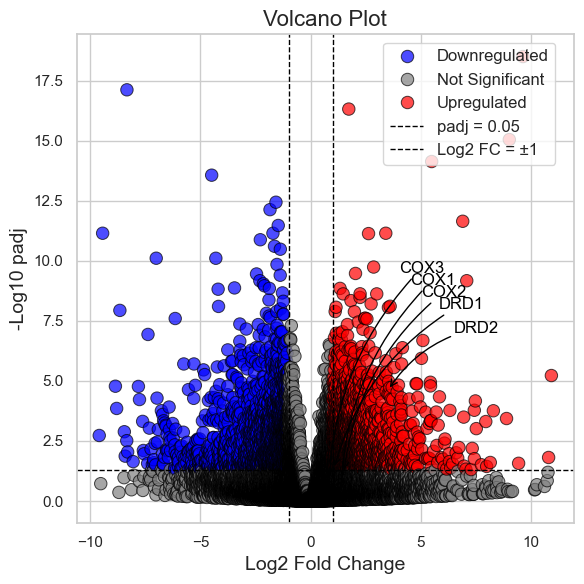

In [56]:
#### Making a volcano plot for the SPMI vs CTRL (new DEGs corrected for age, sex and RIN). This is for figure 2D:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def main():
    # Define the base directory and input file name
    base_dir = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024"
    input_file = "SPMI_vs_CTRL_age_sex_RIN_corrected_DEGs_for_volcano.xlsx"
    input_path = os.path.join(base_dir, input_file)
    
    # Define output file name based on the input file name:
    output_file = os.path.join(base_dir, input_file.replace(".xlsx", "_Volcano_plot.png"))
    
    # Read the Excel file from the first sheet
    df = pd.read_excel(input_path, sheet_name=0)
    print("Data loaded. Columns:", df.columns.tolist())
    print("First few rows:\n", df.head())
    
    # Ensure the columns have the expected names: symbol, log2FoldChange, padj
    # Optionally rename if needed:
    # df.columns = ["symbol", "log2FoldChange", "padj"]
    
    # Replace any zero padj values with a very small number to avoid errors with log10.
    df['padj'] = df['padj'].replace(0, 1e-10)
    
    # Define significance thresholds:
    padj_threshold = 0.05
    log2fc_threshold = 1
    
    # Calculate -log10(padj) for plotting
    df['-log10_padj'] = -np.log10(df['padj'])
    
    # Assign colors based on significance:
    df['Color'] = 'Not Significant'
    df.loc[(df['padj'] < padj_threshold) & (df['log2FoldChange'] > log2fc_threshold), 'Color'] = 'Upregulated'
    df.loc[(df['padj'] < padj_threshold) & (df['log2FoldChange'] < -log2fc_threshold), 'Color'] = 'Downregulated'
    
    # Define a color palette
    color_palette = {
        'Not Significant': 'gray',
        'Upregulated': 'red',
        'Downregulated': 'blue'
    }
    
    # Create volcano plot
    plt.figure(figsize=(6, 6))
    sns.set(style="whitegrid")
    
    sns.scatterplot(
        data=df,
        x='log2FoldChange',
        y='-log10_padj',
        hue='Color',
        palette=color_palette,
        edgecolor='black',
        alpha=0.7,
        s=80
    )
    
    # Add threshold lines for padj and log2FoldChange
    plt.axhline(-np.log10(padj_threshold), linestyle='--', color='black', linewidth=1, label="padj = 0.05")
    plt.axvline(log2fc_threshold, linestyle='--', color='black', linewidth=1, label="Log2 FC = ±1")
    plt.axvline(-log2fc_threshold, linestyle='--', color='black', linewidth=1)
    
    # Set axis labels and title
    plt.xlabel("Log2 Fold Change", fontsize=14)
    plt.ylabel("-Log10 padj", fontsize=14)
    plt.title("Volcano Plot", fontsize=16)
    plt.grid(True)
    
    # Place the legend inside the plot (upper left, adjusted upward)
    plt.legend(fontsize=12, title_fontsize=13, loc="upper left", bbox_to_anchor=(0.60, 1.00))
    
    # --- Annotate Specific Transcript IDs Using Defined Coordinates ---
    # Define a mapping: transcript ID -> (annotation label, x annotation coordinate, y annotation coordinate)
    mapping_coords = {
        "ENSG00000149295.14": ("DRD2", 6.5, 7.0),
        "ENSG00000184845.4": ("DRD1", 5.8, 8.0),
        "ENSG00000198804.2": ("COX1", 4.5, 9.0),
        "ENSG00000198712.1": ("COX2", 5.0, 8.5),
        "ENSG00000198938.2": ("COX3", 4.0, 9.5)
    }
    
    for transcript, (annot_label, x_annot, y_annot) in mapping_coords.items():
        if transcript in df["symbol"].values:
            # Retrieve the data point for this transcript (for arrow tail)
            gene_row = df[df["symbol"] == transcript].iloc[0]
            x = gene_row["log2FoldChange"]
            y = gene_row["-log10_padj"]
            
            plt.annotate(
                annot_label,
                xy=(x, y),
                xytext=(x_annot, y_annot),
                textcoords="data",
                arrowprops=dict(
                    arrowstyle="->",
                    color="black",
                    lw=1,
                    shrinkA=0,
                    shrinkB=0,
                    connectionstyle="arc3,rad=0.2"
                ),
                fontsize=12,
                color="black"
            )
        else:
            print(f"{transcript} not found in dataset.")
    
    plt.tight_layout()
    
    # Save the volcano plot as a PNG file
    plt.savefig(output_file, dpi=300, bbox_inches="tight")
    print("Volcano plot saved as:", output_file)
    
    plt.show()

if __name__ == "__main__":
    main()

Expression matrix shape: (26, 62703) (samples x genes)
Metadata shape: (26, 5) (samples x variables)
PC1 explains 41.25% of variance
Age      0
Group    0
PC1      0
dtype: int64

Regression Results for PC1:
     Variable  Coefficient  Std. Error       p-value
0       const    46.674271   20.681633  3.382605e-02
1         Age    -0.278422    0.352715  4.379589e-01
2  Group_SPMI   -81.472478   12.166703  7.860369e-07


C:\Users\labuser\AppData\Local\Temp\ipykernel_24396\1277503432.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=meta_df["Group"], y=meta_df["PC1"], palette="coolwarm", width=0.6, showcaps=False)


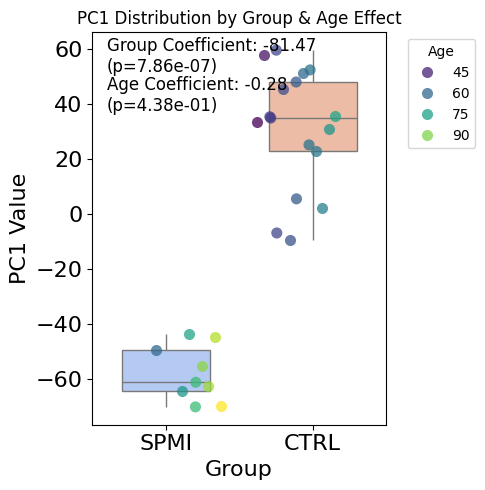

In [5]:
### This section is ffor reviewer1 mnain question 2 foor the regression analysis of SPMI vs CTRL with the flipped values on the PC1 to make it compartiable with new figure 2C o fthe main manuscript:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# =============================================================================
# 1) Load Data
# =============================================================================
file_dir = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/"

# Load the expression matrix and metadata
expr_df = pd.read_csv(file_dir + "SPMI_CTRL_DESeq2_normalized_counts_covaraite_considered_for_revised_fig2C.csv", index_col=0)
meta_df = pd.read_csv(file_dir + "SPMI_CTRL_DESeq2_normalized_counts_covaraite_considered_metadata_for_revised_PCA_R1QM1.csv", index_col=0)

# =============================================================================
# 2) Transpose the expression matrix if necessary
# =============================================================================
if expr_df.shape[0] > expr_df.shape[1]:
    expr_df = expr_df.T

print(f"Expression matrix shape: {expr_df.shape} (samples x genes)")
print(f"Metadata shape: {meta_df.shape} (samples x variables)")

# =============================================================================
# 3) Ensure alignment of metadata and expression data
# =============================================================================
meta_df = meta_df.reindex(expr_df.index)
assert expr_df.index.equals(meta_df.index), "Sample names in expression and metadata do not match!"

# =============================================================================
# 4) Perform PCA (Only Extract PC1)
# =============================================================================
pca = PCA(n_components=1)  # Extracting only PC1
pca_scores = pca.fit_transform(expr_df)

# Add PC1 to the metadata
meta_df['PC1'] = pca_scores[:, 0]

# Flip the sign of PC1 for CTRL and SPMI samples
meta_df.loc[meta_df['Group'].isin(['CTRL', 'SPMI']), 'PC1'] *= -1

explained_variance = pca.explained_variance_ratio_[0] * 100
print(f"PC1 explains {explained_variance:.2f}% of variance")


# =============================================================================
# 5) Handle Missing or Non-Numeric Data
# =============================================================================
print(meta_df[['Age', 'Group', 'PC1']].isnull().sum())  # Check for missing values
meta_df = meta_df.dropna(subset=['Age', 'Group', 'PC1'])  # Drop missing values

# Ensure all columns are numeric
meta_df['Age'] = pd.to_numeric(meta_df['Age'], errors='coerce')
meta_df['PC1'] = pd.to_numeric(meta_df['PC1'], errors='coerce')

# =============================================================================
# 6) Prepare Data for Regression
# =============================================================================
# Independent variables (predictors)
X = meta_df[['Age', 'Group']]
X = pd.get_dummies(X, columns=['Group'], drop_first=True)  # One-hot encode 'Group'

# Add a constant for the intercept
X = sm.add_constant(X)

# Dependent variable
y_pc1 = meta_df['PC1']

# Convert to numeric if necessary
X = X.astype(float)
y_pc1 = y_pc1.astype(float)

# =============================================================================
# 7) Fit Regression Model (PC1 Only)
# =============================================================================
model_pc1 = sm.OLS(y_pc1, X).fit()

# Extract coefficients and p-values for Age and Group
group_coeff = model_pc1.params['Group_SPMI']
age_coeff = model_pc1.params['Age']
group_pval = model_pc1.pvalues['Group_SPMI']
age_pval = model_pc1.pvalues['Age']

# =============================================================================
# 8) Print Regression Results Instead of Saving
# =============================================================================
pc1_results = pd.DataFrame({
    "Variable": model_pc1.params.index,
    "Coefficient": model_pc1.params.values,
    "Std. Error": model_pc1.bse.values,
    "p-value": model_pc1.pvalues.values,
})

# Display results instead of saving
print("\nRegression Results for PC1:")
print(pc1_results)

# =============================================================================
# 9) Generate Annotated Figure (Group + Age Effect) Without Saving
# =============================================================================
plt.figure(figsize=(5, 5))

# Boxplot for Group Effect
sns.boxplot(x=meta_df["Group"], y=meta_df["PC1"], palette="coolwarm", width=0.6, showcaps=False)

# Scatter plot overlay (jittered points to show Age distribution)
sns.stripplot(x=meta_df["Group"], y=meta_df["PC1"], hue=meta_df["Age"], palette="viridis", dodge=True, jitter=True, size=8, alpha=0.75)

# Add title and labels
plt.title("PC1 Distribution by Group & Age Effect")
plt.xlabel("Group", fontsize=16)
plt.ylabel("PC1 Value", fontsize=16)

# Increase font size for X and Y axis numbers
plt.xticks(fontsize=16)  # Increase font size of X-axis numbers
plt.yticks(fontsize=16)  # Increase font size of Y-axis numbers

# Add annotations for coefficients and p-values on the right side
plt.annotate(
    f"Group Coefficient: {group_coeff:.2f}\n(p={group_pval:.2e})", 
    xy=(0.05, 0.9),  # <-- left side
    xycoords="axes fraction", 
    fontsize=12, 
    color="black",
    ha="left"  # Align text to the left
)

plt.annotate(
    f"Age Coefficient: {age_coeff:.2f}\n(p={age_pval:.2e})", 
    xy=(0.05, 0.8),  # <-- left side
    xycoords="axes fraction", 
    fontsize=12, 
    color="black",
    ha="left"
)

# Add legend for Age color
plt.legend(title="Age", bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot to file
plt.savefig(file_dir + "SPMI_vs_CTRL_PC1_Group_Age_Effect_updated_R1Q2.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.tight_layout()
plt.show()


Expression matrix shape: (26, 62703) (samples x genes)
Metadata shape: (26, 5) (samples x variables)
PC1 explains 41.25% of variance
RIN      0
Group    0
PC1      0
dtype: int64

Regression Results for PC1 (Exploring RIN):
     Variable  Coefficient  Std. Error   p-value
0       const    38.073986   25.660615  0.151450
1         RIN    -1.515491    5.225889  0.774417
2  Group_SPMI   -85.592115   13.718378  0.000002


C:\Users\labuser\AppData\Local\Temp\ipykernel_24396\2105699341.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=meta_df["Group"], y=meta_df["PC1"], palette="coolwarm", width=0.6, showcaps=False)


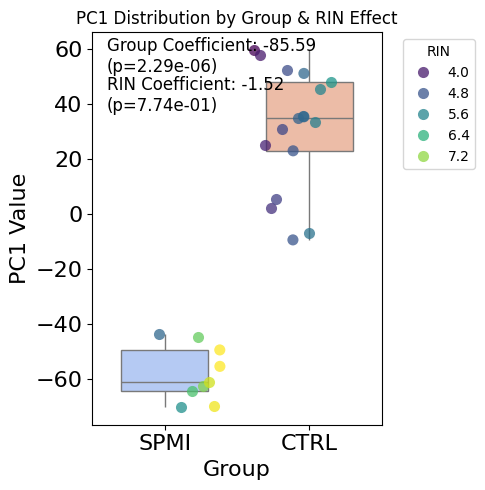

In [9]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# =============================================================================
# 1) Load Data
# =============================================================================
file_dir = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/"

# Load the expression matrix and metadata
expr_df = pd.read_csv(file_dir + "SPMI_CTRL_DESeq2_normalized_counts_covaraite_considered_for_revised_fig2C.csv", index_col=0)
meta_df = pd.read_csv(file_dir + "SPMI_CTRL_DESeq2_normalized_counts_covaraite_considered_metadata_for_revised_PCA_R1QM1.csv", index_col=0)

# =============================================================================
# 2) Transpose the expression matrix if necessary
# =============================================================================
if expr_df.shape[0] > expr_df.shape[1]:
    expr_df = expr_df.T

print(f"Expression matrix shape: {expr_df.shape} (samples x genes)")
print(f"Metadata shape: {meta_df.shape} (samples x variables)")

# =============================================================================
# 3) Ensure alignment of metadata and expression data
# =============================================================================
meta_df = meta_df.reindex(expr_df.index)
assert expr_df.index.equals(meta_df.index), "Sample names in expression and metadata do not match!"

# =============================================================================
# 4) Perform PCA (Only Extract PC1)
# =============================================================================
pca = PCA(n_components=1)  # Extracting only PC1
pca_scores = pca.fit_transform(expr_df)

# Add PC1 to the metadata
meta_df['PC1'] = pca_scores[:, 0]

# Flip the sign of PC1 for CTRL and SPMI samples
meta_df.loc[meta_df['Group'].isin(['CTRL', 'SPMI']), 'PC1'] *= -1

explained_variance = pca.explained_variance_ratio_[0] * 100
print(f"PC1 explains {explained_variance:.2f}% of variance")

# =============================================================================
# 5) Handle Missing or Non-Numeric Data
# =============================================================================
print(meta_df[['RIN', 'Group', 'PC1']].isnull().sum())  # Check for missing values
meta_df = meta_df.dropna(subset=['RIN', 'Group', 'PC1'])  # Drop missing values

# Ensure all columns are numeric
meta_df['RIN'] = pd.to_numeric(meta_df['RIN'], errors='coerce')
meta_df['PC1'] = pd.to_numeric(meta_df['PC1'], errors='coerce')

# =============================================================================
# 6) Prepare Data for Regression
# =============================================================================
# Independent variables (predictors)
X = meta_df[['RIN', 'Group']]
X = pd.get_dummies(X, columns=['Group'], drop_first=True)  # One-hot encode 'Group'

# Add a constant for the intercept
X = sm.add_constant(X)

# Dependent variable
y_pc1 = meta_df['PC1']

# Convert to numeric if necessary
X = X.astype(float)
y_pc1 = y_pc1.astype(float)

# =============================================================================
# 7) Fit Regression Model (PC1 Only)
# =============================================================================
model_pc1 = sm.OLS(y_pc1, X).fit()

# Extract coefficients and p-values for RIN and Group
group_coeff = model_pc1.params['Group_SPMI']
rin_coeff = model_pc1.params['RIN']
group_pval = model_pc1.pvalues['Group_SPMI']
rin_pval = model_pc1.pvalues['RIN']

# =============================================================================
# 8) Print Regression Results Instead of Saving
# =============================================================================
pc1_results = pd.DataFrame({
    "Variable": model_pc1.params.index,
    "Coefficient": model_pc1.params.values,
    "Std. Error": model_pc1.bse.values,
    "p-value": model_pc1.pvalues.values,
})

print("\nRegression Results for PC1 (Exploring RIN):")
print(pc1_results)

# =============================================================================
# 9) Generate Annotated Figure (Group + RIN Effect) Without Saving
# =============================================================================
plt.figure(figsize=(5, 5))

# Boxplot for Group Effect
sns.boxplot(x=meta_df["Group"], y=meta_df["PC1"], palette="coolwarm", width=0.6, showcaps=False)

# Scatter plot overlay (jittered points to show RIN distribution)
sns.stripplot(x=meta_df["Group"], y=meta_df["PC1"], hue=meta_df["RIN"], palette="viridis", dodge=True, jitter=True, size=8, alpha=0.75)

# Add title and labels
plt.title("PC1 Distribution by Group & RIN Effect")
plt.xlabel("Group", fontsize=16)
plt.ylabel("PC1 Value", fontsize=16)

# Increase font size for X and Y axis numbers
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Add annotations for coefficients and p-values, placed on the upper left
plt.annotate(
    f"Group Coefficient: {group_coeff:.2f}\n(p={group_pval:.2e})", 
    xy=(0.05, 0.9),        # Position on the left side
    xycoords="axes fraction", 
    fontsize=12, 
    color="black",
    ha="left"
)

plt.annotate(
    f"RIN Coefficient: {rin_coeff:.2f}\n(p={rin_pval:.2e})", 
    xy=(0.05, 0.8),        # Position on the left side
    xycoords="axes fraction", 
    fontsize=12, 
    color="black",
    ha="left"
)

# Add legend for RIN color
plt.legend(title="RIN", bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot to file
plt.savefig(file_dir + "SPMI_vs_CTRL_PC1_Group_RIN_Effect_updated_R1Q2.png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()


C:\Users\labuser\AppData\Local\Programs\Python\Python310\lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
C:\Users\labuser\AppData\Local\Programs\Python\Python310\lib\site-packages\upsetplot\plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object 

<Figure size 1000x800 with 0 Axes>

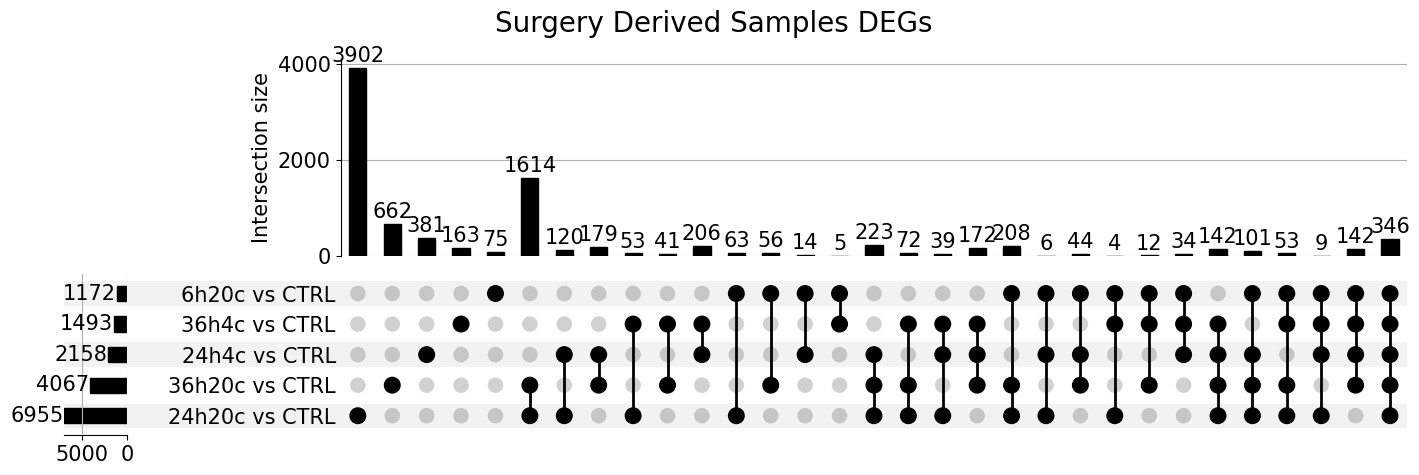

UpSet plot saved at: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024\Surgery_derived_samples_DEGs_RIN_corrected_new_upset_plot.png


In [11]:
### Making a new upset plot for the updated DEGs for the surgey derived samples after RIN correction
import os
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_indicators

# Increase default font size for all text in the plot
plt.rcParams.update({'font.size': 15})

# =============================================================================
# 1) Load the Data (surgery_test.xlsx only)
# =============================================================================
file_dir = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/"
surgery_file = os.path.join(file_dir, "Surgery_derived_samples_DEGs_RIN_corrected_for_upset.xlsx")
surgery_df = pd.read_excel(surgery_file, header=0)

# =============================================================================
# 2) Build a Membership DataFrame for the Five Surgery Columns
# =============================================================================
membership = {}
for col in surgery_df.columns:
    membership[col] = set(surgery_df[col].dropna().astype(str))

all_genes = set().union(*membership.values())
membership_df = pd.DataFrame(index=list(all_genes))
for col in surgery_df.columns:
    membership_df[col] = membership_df.index.isin(membership[col])

# =============================================================================
# 3) Prepare Data for UpSet Plot Using from_indicators
# =============================================================================
data_overall = from_indicators(membership_df)
data_overall = data_overall.groupby(level=list(range(data_overall.index.nlevels))).sum()

# =============================================================================
# 4) Create the UpSet Plot
# =============================================================================
fig = plt.figure(figsize=(10, 8))
upset = UpSet(data_overall, show_counts=True)
upset.plot()  # Plot the UpSet plot (no ax parameter is supported)
plt.suptitle("Surgery Derived Samples DEGs", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for the suptitle

# =============================================================================
# 5) Save the Figure
# =============================================================================
target_dir = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024"
os.makedirs(target_dir, exist_ok=True)
output_file = os.path.join(target_dir, "Surgery_derived_samples_DEGs_RIN_corrected_new_upset_plot.png")
plt.savefig(output_file, dpi=300, bbox_inches='tight')
plt.show()

print(f"UpSet plot saved at: {output_file}")


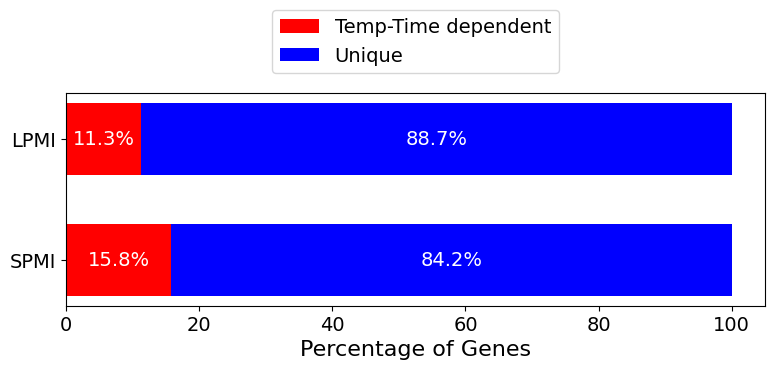

Horizontal stacked bar plot saved at: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/Response to reviewer 1 minor question 2 section B_horizontal_new_plot.png


In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------
# Step 1: Read the Excel File
# ----------------------------
directory = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/"
file_name = "Union_of_surgery_derived_DEG_and_SPMI_LPMI_new_corrected_DEGs_bar_plot.xlsx"
file_path = os.path.join(directory, file_name)

# Read the Excel file (assumes data is in the first sheet)
df = pd.read_excel(file_path)

# ----------------------------
# Step 2: Extract Gene Lists from Columns
# ----------------------------
genes_col1 = set(df.iloc[:, 0].dropna().astype(str))
genes_col2 = set(df.iloc[:, 1].dropna().astype(str))
genes_col3 = set(df.iloc[:, 2].dropna().astype(str))

# ----------------------------
# Step 3: Compute Common and Unique Percentages (Two Categories)
# ----------------------------
def compute_percentages_two_categories(set1, set2):
    """Compute percentage of common genes and unique genes (symmetric difference) based on the union."""
    common = set1.intersection(set2)
    unique = set1.symmetric_difference(set2)
    union_total = set1.union(set2)
    total = len(union_total) if len(union_total) > 0 else 1
    pct_common = len(common) / total * 100
    pct_unique = len(unique) / total * 100
    return pct_common, pct_unique

# For Column 1 vs Column 2 (annotate as SPMI)
pct_common_12, pct_unique_12 = compute_percentages_two_categories(genes_col1, genes_col2)

# For Column 1 vs Column 3 (annotate as LPMI)
pct_common_13, pct_unique_13 = compute_percentages_two_categories(genes_col1, genes_col3)

# ----------------------------
# Step 4: Prepare Data for Plotting
# ----------------------------
# Create a DataFrame with two comparisons and two categories:
# "Temp-Time dependent" (for common genes) and "Unique" (for unique genes)
plot_data = pd.DataFrame({
    'Comparison': ['SPMI', 'LPMI'],
    'Temp-Time dependent': [pct_common_12, pct_common_13],
    'Unique': [pct_unique_12, pct_unique_13]
})

# Melt the DataFrame to long format for stacked bar plotting
plot_data_long = plot_data.melt(id_vars='Comparison', 
                                value_vars=['Temp-Time dependent', 'Unique'],
                                var_name='Category', value_name='Percentage')

# ----------------------------
# Step 5: Create a Horizontal Stacked Bar Plot
# ----------------------------
fig, ax = plt.subplots(figsize=(8, 4))

# Define the y positions and bar height
comparisons = plot_data['Comparison']
y = np.arange(len(comparisons))
bar_height = 0.6

# Define colors: "Temp-Time dependent" as red and "Unique" as blue
colors = {'Temp-Time dependent': 'red', 'Unique': 'blue'}

# Initialize the left offset for stacking
left = np.zeros(len(comparisons))

for cat in ['Temp-Time dependent', 'Unique']:
    # Extract the values for the current category in the order of comparisons
    cat_values = plot_data_long[plot_data_long['Category'] == cat]['Percentage'].values
    bars = ax.barh(y, cat_values, bar_height, left=left, color=colors[cat], label=cat)
    
    # Annotate each bar segment with its percentage value
    for i, bar in enumerate(bars):
        width = bar.get_width()
        if width > 0:
            ax.text(left[i] + width/2, y[i], f"{width:.1f}%", 
                    ha='center', va='center', color='white', fontsize=14)
    left += cat_values

# Customize y-axis and labels with increased font sizes
ax.set_yticks(y)
ax.set_yticklabels(comparisons, fontsize=14)
ax.set_xlabel("Percentage of Genes", fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.legend(loc="lower center", bbox_to_anchor=(0.5, 1.05), fontsize=14, title_fontsize=14)

plt.tight_layout()

# Save the figure
output_file = os.path.join(directory, "Response to reviewer 1 minor question 2 section B_horizontal_new_plot.png")
plt.savefig(output_file, dpi=300, bbox_inches='tight')
plt.show()

print(f"Horizontal stacked bar plot saved at: {output_file}")


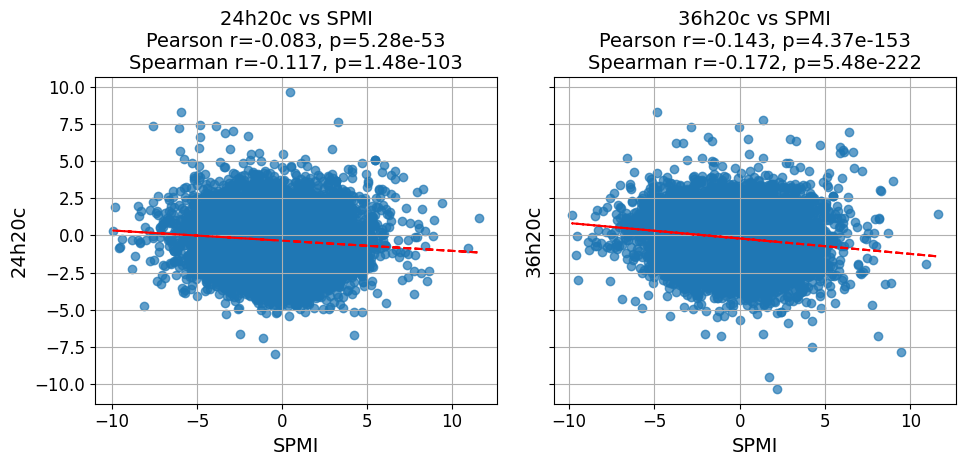

Correlation plots saved successfully at C:\Users\labuser\Downloads\Moein\UK DRI\new_aligned_samples\Sanity_check\Writing\Response to Nat Comm reviewers Dec 2024\SPMI_vs_24h20c_and_SPMI_vs_36h20c_log2FC_correlation_plots.png.


In [19]:
### This is the updated section for the question 23 from reviewer 4. Originally I had used the fold chang of the genes to check the correlation. In the following part I need to consider basal expression
#### which is derived from DESEq2. 
#### This section addresses question 23 from reviewer 4 in which the reviewer is asking why we used 200 genes for the figure 3E and not whole transcriptome. 
#### My goal is to show that using the whole transcriptome; i.e. correlating the whole transcriptomic of the 24h20c and 36h20c with the LPMI and HPMI does not
#### give us strong correlation and instead we need to focus on a smaller gene sets.  

#### SPMI vs 24h20c and 36h20c correlation analysis

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr


import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.size': 18,            # Default font size
    'axes.titlesize': 18,       # Plot title
    'axes.labelsize': 18,       # X and Y labels
    'xtick.labelsize': 16,      # X tick labels
    'ytick.labelsize': 16,      # Y tick labels
    'legend.fontsize': 14,      # Legend text
    'figure.titlesize': 22      # Figure title (if used)
})


# Define the paths to the input files
file1_path_24h = r"C:\Users\labuser\Downloads\Moein\UK DRI\new_aligned_samples\Sanity_check\Writing\Response to Nat Comm reviewers Dec 2024\24h20c_vs_CTRL_corrected_all_captured_transcripts.xlsx"
file1_path_36h = r"C:\Users\labuser\Downloads\Moein\UK DRI\new_aligned_samples\Sanity_check\Writing\Response to Nat Comm reviewers Dec 2024\36h20c_vs_CTRL_corrected_all_captured_transcripts.xlsx"
file2_path = r"C:\Users\labuser\Downloads\Moein\UK DRI\new_aligned_samples\Sanity_check\Writing\Response to Nat Comm reviewers Dec 2024\SPMI_vs_CTRL_corrected_all_captured_transcripts.xlsx"
plot_output_path = r"C:\Users\labuser\Downloads\Moein\UK DRI\new_aligned_samples\Sanity_check\Writing\Response to Nat Comm reviewers Dec 2024\SPMI_vs_24h20c_and_SPMI_vs_36h20c_log2FC_correlation_plots.png"

# Ensure the output directory exists
os.makedirs(os.path.dirname(plot_output_path), exist_ok=True)

def process_and_plot(file1_path, file2_path, suffix, ax):
    # Read the Excel files
    df1 = pd.read_excel(file1_path)
    df2 = pd.read_excel(file2_path)

    # Clean "ID" column to remove suffixes like ".x"
    df1["ID"] = df1["ID"].astype(str).str.split(".").str[0]
    df2["ID"] = df2["ID"].astype(str).str.split(".").str[0]

    # Merge on ID
    merged_df = pd.merge(df1, df2, on="ID", suffixes=(f"_{suffix}", "_SPMI"))

    # Extract log2FoldChange values from both
    output_df = merged_df[["ID", f"log2FoldChange_SPMI", f"log2FoldChange_{suffix}"]]
    output_df.columns = ["ID", "SPMI", suffix]

    # Drop rows with missing values
    output_df = output_df.dropna()

    # Calculate Pearson and Spearman correlations
    pearson_corr, pearson_pval = pearsonr(output_df["SPMI"], output_df[suffix])
    spearman_corr, spearman_pval = spearmanr(output_df["SPMI"], output_df[suffix])

    # Scatter plot
    ax.scatter(output_df["SPMI"], output_df[suffix], alpha=0.7)
    m, b = np.polyfit(output_df["SPMI"], output_df[suffix], 1)
    ax.plot(output_df["SPMI"], m * output_df["SPMI"] + b, color='red', linestyle='--')
    ax.set_title(f"{suffix} vs SPMI\nPearson r={pearson_corr:.3f}, p={pearson_pval:.2e}\nSpearman r={spearman_corr:.3f}, p={spearman_pval:.2e}", fontsize=14)
    ax.set_xlabel("SPMI", fontsize=14)
    ax.set_ylabel(f"{suffix}", fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.grid(True)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Generate the correlation plots
process_and_plot(file1_path_24h, file2_path, "24h20c", axes[0])
process_and_plot(file1_path_36h, file2_path, "36h20c", axes[1])

# Finalize layout and save
plt.tight_layout()
plt.savefig(plot_output_path, dpi=300)
plt.show()

print(f"Correlation plots saved successfully at {plot_output_path}.")




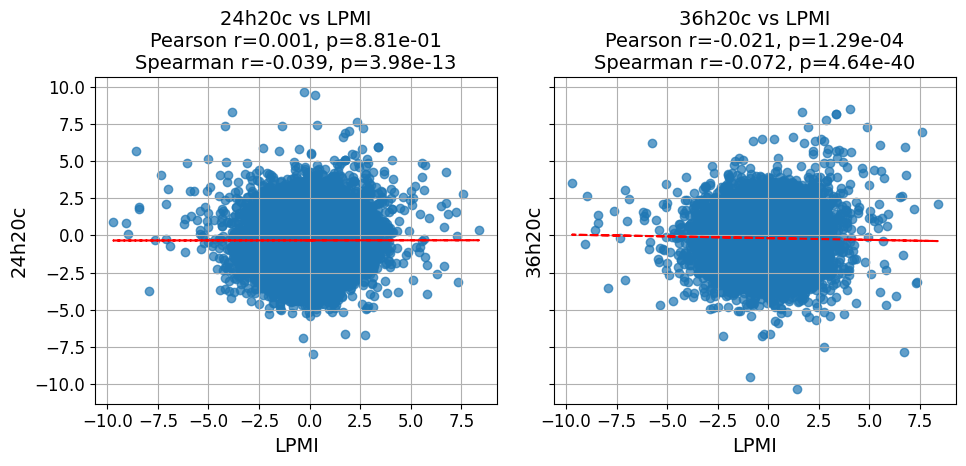

Correlation plots saved successfully at C:\Users\labuser\Downloads\Moein\UK DRI\new_aligned_samples\Sanity_check\Writing\Response to Nat Comm reviewers Dec 2024\LPMI_vs_24h20c_and_LPMI_vs_36h20c_log2FC_correlation_plots.png.


In [21]:
### This is the updated section for the question 23 from reviewer 4. Originally I had used the fold chang of the genes to check the correlation. In the following part I need to consider basal expression
#### which is derived from DESEq2. 
#### This section addresses question 23 from reviewer 4 in which the reviewer is asking why we used 200 genes for the figure 3E and not whole transcriptome. 
#### My goal is to show that using the whole transcriptome; i.e. correlating the whole transcriptomic of the 24h20c and 36h20c with the LPMI and SPMI does not
#### give us strong correlation and instead we need to focus on a smaller gene sets.  

#### SPMI vs 24h20c and 36h20c correlation analysis

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr

plt.rcParams.update({
    'font.size': 18,            # Default font size
    'axes.titlesize': 18,       # Plot title
    'axes.labelsize': 18,       # X and Y labels
    'xtick.labelsize': 16,      # X tick labels
    'ytick.labelsize': 16,      # Y tick labels
    'legend.fontsize': 14,      # Legend text
    'figure.titlesize': 22      # Figure title (if used)
})

# Define the paths to the input files
file1_path_24h = r"C:\Users\labuser\Downloads\Moein\UK DRI\new_aligned_samples\Sanity_check\Writing\Response to Nat Comm reviewers Dec 2024\24h20c_vs_CTRL_corrected_all_captured_transcripts.xlsx"
file1_path_36h = r"C:\Users\labuser\Downloads\Moein\UK DRI\new_aligned_samples\Sanity_check\Writing\Response to Nat Comm reviewers Dec 2024\36h20c_vs_CTRL_corrected_all_captured_transcripts.xlsx"
file2_path = r"C:\Users\labuser\Downloads\Moein\UK DRI\new_aligned_samples\Sanity_check\Writing\Response to Nat Comm reviewers Dec 2024\LPMI_vs_CTRL_corrected_all_captured_transcripts.xlsx"
plot_output_path = r"C:\Users\labuser\Downloads\Moein\UK DRI\new_aligned_samples\Sanity_check\Writing\Response to Nat Comm reviewers Dec 2024\LPMI_vs_24h20c_and_LPMI_vs_36h20c_log2FC_correlation_plots.png"

# Ensure the output directory exists
os.makedirs(os.path.dirname(plot_output_path), exist_ok=True)

def process_and_plot(file1_path, file2_path, suffix, ax):
    # Read the Excel files
    df1 = pd.read_excel(file1_path)
    df2 = pd.read_excel(file2_path)

    # Clean "ID" column to remove suffixes like ".x"
    df1["ID"] = df1["ID"].astype(str).str.split(".").str[0]
    df2["ID"] = df2["ID"].astype(str).str.split(".").str[0]

    # Merge on ID
    merged_df = pd.merge(df1, df2, on="ID", suffixes=(f"_{suffix}", "_LPMI"))

    # Extract log2FoldChange values from both
    output_df = merged_df[["ID", f"log2FoldChange_LPMI", f"log2FoldChange_{suffix}"]]
    output_df.columns = ["ID", "LPMI", suffix]

    # Drop rows with missing values
    output_df = output_df.dropna()

    # Calculate Pearson and Spearman correlations
    pearson_corr, pearson_pval = pearsonr(output_df["LPMI"], output_df[suffix])
    spearman_corr, spearman_pval = spearmanr(output_df["LPMI"], output_df[suffix])

    # Scatter plot
    ax.scatter(output_df["LPMI"], output_df[suffix], alpha=0.7)
    m, b = np.polyfit(output_df["LPMI"], output_df[suffix], 1)
    ax.plot(output_df["LPMI"], m * output_df["LPMI"] + b, color='red', linestyle='--')
    ax.set_title(f"{suffix} vs LPMI\nPearson r={pearson_corr:.3f}, p={pearson_pval:.2e}\nSpearman r={spearman_corr:.3f}, p={spearman_pval:.2e}", fontsize=14)
    ax.set_xlabel("LPMI", fontsize=14)
    ax.set_ylabel(f"{suffix}", fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.grid(True)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Generate the correlation plots
process_and_plot(file1_path_24h, file2_path, "24h20c", axes[0])
process_and_plot(file1_path_36h, file2_path, "36h20c", axes[1])

# Finalize layout and save
plt.tight_layout()
plt.savefig(plot_output_path, dpi=300)
plt.show()

print(f"Correlation plots saved successfully at {plot_output_path}.")





In [22]:
#### This is for reviewer 4 question 26 to find if any random 200 genes within 3000 genes gives me the sam eclustering results or not. Here I select the genes and then in R calculate the PC values. 
import pandas as pd
import os

# 1) Set base directory and file paths
base_dir = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024"
ctrl_file   = os.path.join(base_dir, "CTRL_samples_for_Domian_PCA_Age_Sex_RIN_corrected_normalized_counts.xlsx")
ml_file     = os.path.join(base_dir, "ML_3000_annotated.xlsx")
output_file = os.path.join(base_dir, "Reviewer4_Q26_selected_200_transcripts_normalized_counts.xlsx")

# 2) Read ML file and clean IDs
ml_df = pd.read_excel(ml_file)
ml_df['query_clean'] = ml_df['query'].astype(str).str.split('.').str[0]

# 3) Randomly select 200 transcripts
transcripts = ml_df['query_clean'].dropna().unique()
if len(transcripts) < 200:
    raise ValueError("Less than 200 unique transcripts available.")
selected = pd.Series(transcripts).sample(n=200, random_state=42).tolist()

# 4) Read CTRL normalized counts and clean IDs
ctrl_df = pd.read_excel(ctrl_file)
first_col = ctrl_df.columns[0]
ctrl_df['TranscriptID'] = ctrl_df[first_col].astype(str).str.split('.').str[0]

# 5) Filter for the selected transcripts
filtered = ctrl_df[ctrl_df['TranscriptID'].isin(selected)].copy()

# 6) Save the filtered DataFrame
filtered.to_excel(output_file, index=False)

print(f"Extracted {len(filtered)} transcripts to:\n{output_file}")


Extracted 101 transcripts to:
C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024\Reviewer4_Q26_selected_200_transcripts_normalized_counts.xlsx


Data loaded. Columns: ['Unnamed: 0', 'PC1', 'PC2', 'Group', 'SampleID', 'cluster']
First few rows:
    Unnamed: 0       PC1       PC2   Group     SampleID  cluster
0           1  2.000394  2.731226  36h_4c   36h_4C_S12        3
1           2 -7.297455 -1.816105  36h_RT  36h_20C_S12        1
2           3 -0.527811  3.136726  24h_4c   24h_4C_S12        3
3           4 -7.505290 -4.628560  24h_RT  24h_20C_S12        1
4           5  6.573204 -2.837910   6h_4c    6h_4C_S12        2
Plot saved at: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024\CTRL_samples_for_Domian_PCA_Age_Sex_RIN_corrected_PCA_plot_figure3B.png


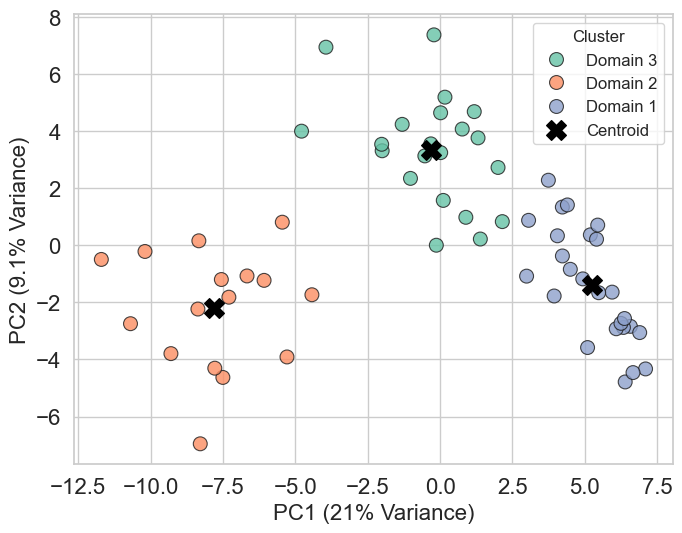

In [23]:
### This section belong to new figure 3B based on the normalized values of CTRL samples
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def main():
    # Define the base directory and file name
    base_dir = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024"
    file_name = "Reviewer4_Q26_selected_200_transcripts_normalized_counts_PCA_values.csv"
    file_path = os.path.join(base_dir, file_name)
    
    # Load the CSV file
    df = pd.read_csv(file_path)
    print("Data loaded. Columns:", df.columns.tolist())
    print("First few rows:\n", df.head())
    
    # Ensure 'cluster' is treated as a categorical variable and map clusters accordingly:
    df['cluster'] = df['cluster'].astype(str)
    # Map cluster "2" -> "Domain 2", "3" -> "Domain 3", "1" -> "Domain 1"
    df['cluster'] = df['cluster'].replace({"2": "Domain 1", "3": "Domain 3", "1": "Domain 2"})
    
    # Compute the centroids for each cluster using the mean of PC1 and PC2
    centroids = df.groupby('cluster')[['PC1', 'PC2']].mean().reset_index()
    
    # Create the scatter plot
    plt.figure(figsize=(7, 5.5))
    sns.set(style="whitegrid")
    
    # Scatter plot: color points by the mapped 'cluster' values (no sample labels)
    scatter = sns.scatterplot(
        data=df,
        x='PC1',
        y='PC2',
        hue='cluster',
        palette='Set2',
        s=100,
        edgecolor='k',
        alpha=0.8
    )
    
    # Overlay the cluster centroids as black 'X' markers
    plt.scatter(
        centroids['PC1'],
        centroids['PC2'],
        c='black',
        marker='X',
        s=200,
        label='Centroid'
    )
    
    # Set axis labels with increased font size
    plt.xlabel("PC1 (21% Variance)", fontsize=16)
    plt.ylabel("PC2 (9.1% Variance)", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    # Show legend with specified font sizes
    plt.legend(title="Cluster", fontsize=12, title_fontsize=12)
    
    plt.tight_layout()
    
    # Save the figure in the same directory with an updated file name
    output_file = os.path.join(base_dir, "CTRL_samples_for_Domian_PCA_Age_Sex_RIN_corrected_PCA_plot_figure3B.png")
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    print("Plot saved at:", output_file)
    
    plt.show()

if __name__ == "__main__":
    main()



Plot saved to: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024\Surgery_derived_samples_RIN_corrected_DEG_stacked_barplot.png


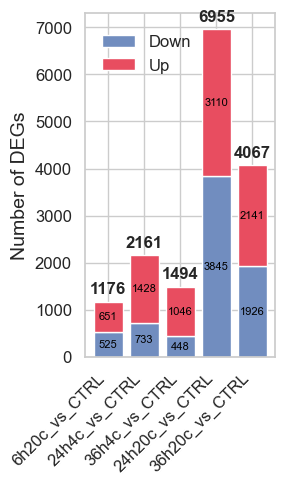

In [4]:
import os
import matplotlib.pyplot as plt

# Define your data
comparisons = [
    "6h20c_vs_CTRL",
    "24h4c_vs_CTRL",
    "36h4c_vs_CTRL",
    "24h20c_vs_CTRL",
    "36h20c_vs_CTRL"
]
down_counts = [525, 733, 448, 3845, 1926]
up_counts   = [651, 1428, 1046, 3110, 2141]

# Compute totals
totals = [d + u for d, u in zip(down_counts, up_counts)]

# Create the stacked bar plot
fig, ax = plt.subplots(figsize=(3, 5))

bars_down = ax.bar(comparisons, down_counts, label="Down", color="#718dbf")
bars_up   = ax.bar(comparisons, up_counts, bottom=down_counts, label="Up", color="#e84d60")

# Annotate each down‑regulated segment with smaller, black text
for bar, count in zip(bars_down, down_counts):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height / 2,
        str(count),
        ha="center",
        va="center",
        color="black",     # changed to black
        fontsize=8         # reduced font size
    )

# Annotate each up‑regulated segment with smaller, black text
for bar, count, down in zip(bars_up, up_counts, down_counts):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        down + height / 2,
        str(count),
        ha="center",
        va="center",
        color="black",     # changed to black
        fontsize=8         # reduced font size
    )

# Annotate totals on top of each bar (kept as before)
for i, total in enumerate(totals):
    x = bars_down[i].get_x() + bars_down[i].get_width() / 2
    ax.text(
        x,
        total + 100,   # offset above the bar
        str(total),
        ha="center",
        va="bottom",
        fontsize=12,
        fontweight="bold"
    )

# Formatting
ax.set_ylabel("Number of DEGs", fontsize=14)

# Move legend inside, shifted slightly to the left
ax.legend(
    loc='upper left',
    bbox_to_anchor=(0.01, 0.98),
    frameon=False,
    fontsize=12
)

plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save to the specified directory
output_dir  = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024"
output_file = os.path.join(output_dir, "Surgery_derived_samples_RIN_corrected_DEG_stacked_barplot.png")
plt.savefig(output_file, dpi=300, bbox_inches="tight")

print(f"Plot saved to: {output_file}")
plt.show()


Data loaded. Columns: ['SampleID', 'PC1', 'PC2', 'Group', 'cluster']
First few rows:
   SampleID        PC1        PC2 Group  cluster
0    LPMI1 -73.590177 -28.294082  LPMI        1
1   LPMI10 -94.056150  72.232676  LPMI        1
2   LPMI11 -64.535600  29.631291  LPMI        1
3   LPMI12 -49.863331  85.266788  LPMI        1
4   LPMI13 -91.992462  52.328920  LPMI        1
Plot saved at: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024\LPMI_vs_CTRL_normalized_counts_Age_Sex_RIN_correction_PCA_plot_figure1C_relocated_legend.png


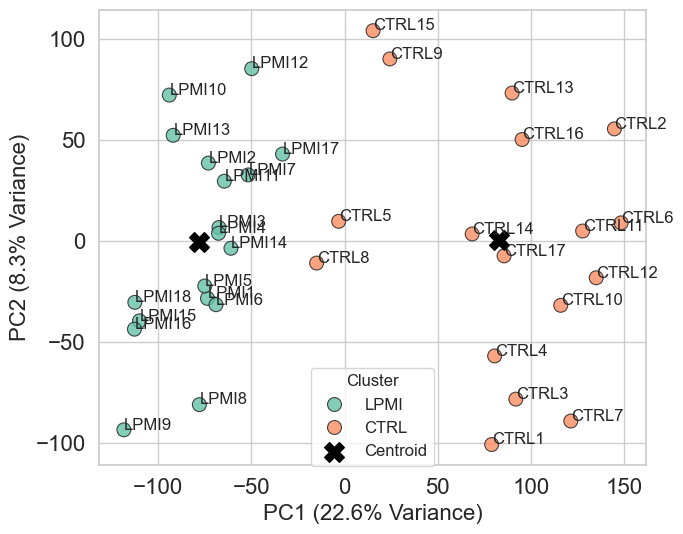

In [14]:
#### New PCA plot for LPMI vs CTRL samples after correcting for age, sex and RIN. This plot goes to figure 1C
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def main():
    # Define the base directory and file name
    base_dir = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024"
    file_name = "LPMI_vs_CTRL_normalized_counts_Age_Sex_RIN_correction_PC_values.csv"
    file_path = os.path.join(base_dir, file_name)
    
    # Load the CSV file
    df = pd.read_csv(file_path)
    print("Data loaded. Columns:", df.columns.tolist())
    print("First few rows:\n", df.head())
    
    # Ensure 'cluster' is treated as a categorical variable and map clusters:
    df['cluster'] = df['cluster'].astype(str)
    # Map cluster "1" to "CTRL" and cluster "2" to "SPMI"
    df['cluster'] = df['cluster'].replace({"2": "CTRL", "1": "LPMI"})
    
    # Compute the centroids for each cluster using the mean of PC1 and PC2
    centroids = df.groupby('cluster')[['PC1', 'PC2']].mean().reset_index()
    
    # Create the scatter plot
    plt.figure(figsize=(7, 5.5))
    sns.set(style="whitegrid")
    
    # Scatter plot: color points by the mapped 'cluster' values
    scatter = sns.scatterplot(
        data=df,
        x='PC1',
        y='PC2',
        hue='cluster',
        palette='Set2',
        s=100,
        edgecolor='k',
        alpha=0.8
    )
    
    # Annotate each sample with its SampleID with increased font size
    for idx, row in df.iterrows():
        plt.text(row['PC1'] + 0.1, row['PC2'] + 0.1, row['SampleID'], fontsize=12)
    
    # Overlay the cluster centroids as black 'X' markers
    plt.scatter(
        centroids['PC1'],
        centroids['PC2'],
        c='black',
        marker='X',
        s=200,
        label='Centroid'
    )
    
    # Set axis labels with increased font size
    plt.xlabel("PC1 (22.6% Variance)", fontsize=16)
    plt.ylabel("PC2 (8.3% Variance)", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    # Show legend with specified font sizes
    plt.legend(title="Cluster", fontsize=12, title_fontsize=12, loc='lower center', 
    bbox_to_anchor=(0.5, -0.02),# move it a bit below the plot if you like
    ncol=1  )
    
    plt.tight_layout()
    
    # Save the figure in the same directory with an updated file name
    output_file = os.path.join(base_dir, "LPMI_vs_CTRL_normalized_counts_Age_Sex_RIN_correction_PCA_plot_figure1C_relocated_legend.png")
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    print("Plot saved at:", output_file)
    
    plt.show()

if __name__ == "__main__":
    main()

Figure saved to: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024\CTRL_samples_for_Domian_PCA_Age_Sex_RIN_corrected_PCA_plot_figure3B_updated.png


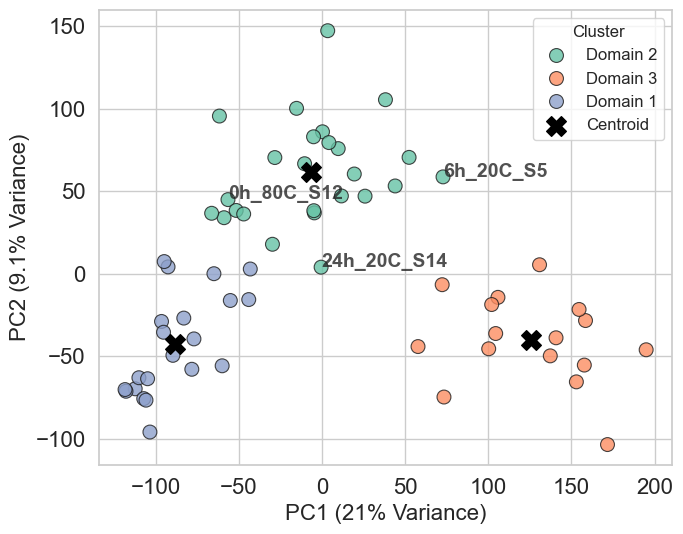

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def main():
    # Define the base directory and file name
    base_dir = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024"
    file_name = "CTRL_samples_for_Domian_PCA_Age_Sex_RIN_corrected_PC_values.csv"
    file_path = os.path.join(base_dir, file_name)
    
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Map clusters to human‐readable names
    df['cluster'] = df['cluster'].astype(str).replace({
        "2": "Domain 1",
        "3": "Domain 3",
        "1": "Domain 2"
    })
    
    # Compute centroids
    centroids = df.groupby('cluster')[['PC1', 'PC2']].mean().reset_index()
    
    # Which samples to label
    label_these = {"6h_20C_S5", "24h_20C_S14", "0h_80C_S12"}
    
    # Plot
    plt.figure(figsize=(7, 5.5))
    sns.set(style="whitegrid")
    sns.scatterplot(
        data=df,
        x='PC1', y='PC2',
        hue='cluster', palette='Set2',
        s=100, edgecolor='k', alpha=0.8
    )
    
    # Annotate the selected samples in bold, larger font
    for _, row in df.iterrows():
        if row['SampleID'] in label_these:
            plt.text(
                row['PC1'] + 0.1,
                row['PC2'] + 0.1,
                row['SampleID'],
                fontsize=14,          # <-- increased font size
                fontweight='bold',
                alpha=0.8
            )
    
    # Overlay centroids
    plt.scatter(
        centroids['PC1'],
        centroids['PC2'],
        c='black', marker='X', s=200,
        label='Centroid'
    )
    
    # Labels & legend
    plt.xlabel("PC1 (21% Variance)", fontsize=16)
    plt.ylabel("PC2 (9.1% Variance)", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(title="Cluster", fontsize=12, title_fontsize=12)
    
    plt.tight_layout()
    
    # — Save the figure — 
    out_name = "CTRL_samples_for_Domian_PCA_Age_Sex_RIN_corrected_PCA_plot_figure3B_updated.png"
    out_path = os.path.join(base_dir, out_name)
    plt.savefig(out_path, dpi=300, bbox_inches='tight')
    print(f"Figure saved to: {out_path}")
    
    plt.show()

if __name__ == "__main__":
    main()


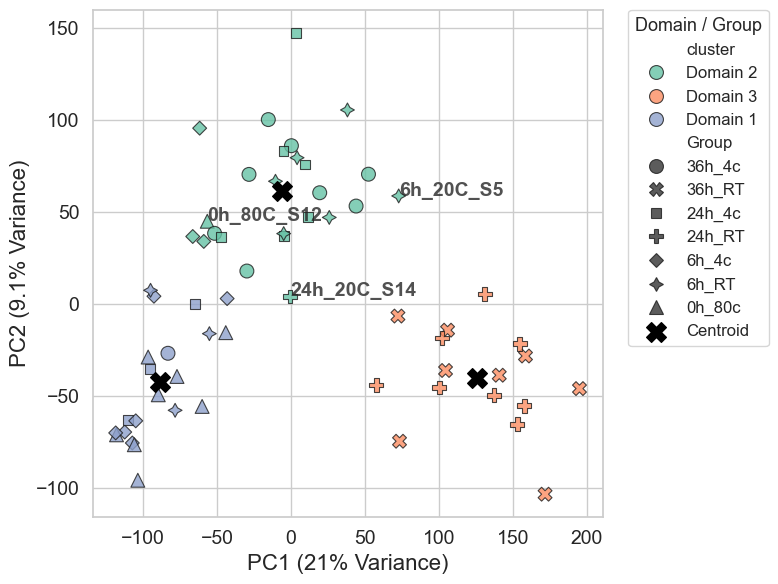

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# load
base_dir = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024"
fn       = "CTRL_samples_for_Domian_PCA_Age_Sex_RIN_corrected_PC_values.csv"
df       = pd.read_csv(os.path.join(base_dir, fn))

# relabel clusters to Domains
df['cluster'] = df['cluster'].astype(str).replace({
    "2": "Domain 1",
    "3": "Domain 3",
    "1": "Domain 2"
})

# centroid for each domain
centroids = df.groupby('cluster')[['PC1','PC2']].mean().reset_index()

# which samples to label
label_these = {"6h_20C_S5", "24h_20C_S14", "0h_80C_S12"}

plt.figure(figsize=(8,6))
sns.set(style="whitegrid")

# scatter: colour by cluster, shape by Group
sns.scatterplot(
    data=df,
    x='PC1', y='PC2',
    hue='cluster',
    style='Group',
    palette='Set2',
    s=100,
    edgecolor='k',
    alpha=0.8,
    markers=True
)

# annotate selected
for _, row in df.iterrows():
    if row['SampleID'] in label_these:
        plt.text(
            row['PC1'] + 0.1,
            row['PC2'] + 0.1,
            row['SampleID'],
            fontsize=14,
            fontweight='bold',
            alpha=0.8
        )

# centroids
plt.scatter(
    centroids['PC1'],
    centroids['PC2'],
    c='black', marker='X', s=200,
    label='Centroid'
)

plt.xlabel("PC1 (21% Variance)", fontsize=16)
plt.ylabel("PC2 (9.1% Variance)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# tighten legend: separate legends for hue and style
h,l = plt.gca().get_legend_handles_labels()
# legend entries come in pairs: first the hue-title, then each hue; then style-title, then each style
plt.legend(
    handles=h, labels=l,
    title="Domain / Group",
    bbox_to_anchor=(1.05,1),
    loc='upper left',
    borderaxespad=0.,
    fontsize=12,
    title_fontsize=13
)

plt.tight_layout()
plt.show()



=== LPMI ===
PMI Shapiro-Wilk p = 2.580e-01
Reads Shapiro-Wilk p = 5.071e-01

=== SPMI ===
PMI Shapiro-Wilk p = 8.261e-02
Reads Shapiro-Wilk p = 4.262e-02


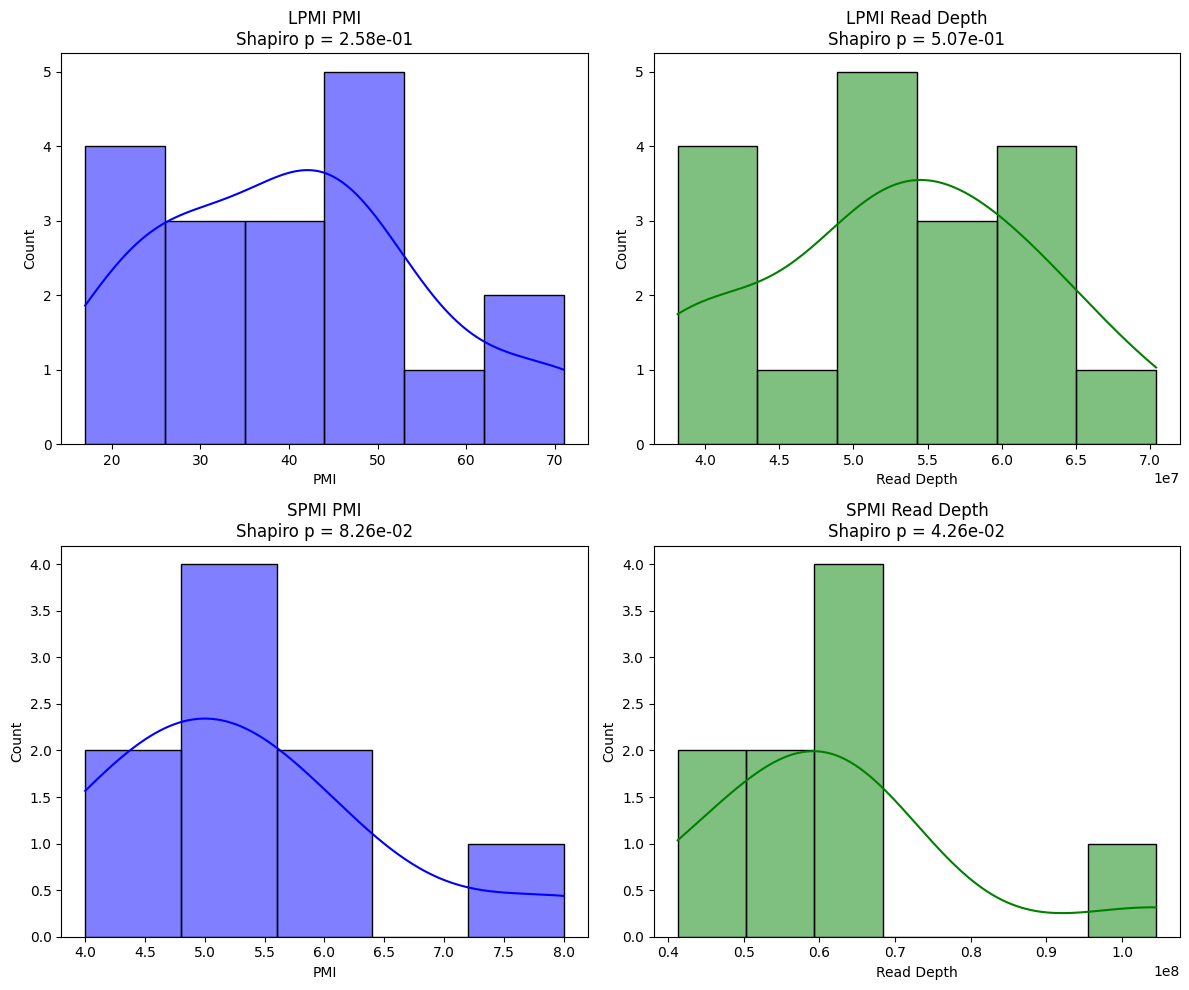

In [7]:
# ============================================================
# Normality Analysis: Combined Figure (LPMI + SPMI in one plot)
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import os

# ----------------------------
# File paths (LPMI and SPMI)
# ----------------------------
file_paths = {
    "LPMI": "C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/correlations/LPMI_vs_PMI_vs_reads_correlation_check_for_distribution.xlsx",
    "SPMI": "C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/correlations/SPMI_PMI_vs_reads_correlation_check_for_distribution.xlsx"
}

output_dir = "C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/Final_resubmission_files_Roun2_Sep_Oct_2025"
os.makedirs(output_dir, exist_ok=True)

# ----------------------------
# Load and test both datasets
# ----------------------------
results = {}

for dataset, file_path in file_paths.items():
    # Load Excel
    data = pd.read_excel(file_path)

    # Extract PMI and Read Counts
    pmi_values = data.iloc[:, 1]   # PMI
    read_counts = data.iloc[:, 2]  # Read Depth

    # Shapiro–Wilk tests
    shapiro_pmi_stat, shapiro_pmi_p = shapiro(pmi_values)
    shapiro_reads_stat, shapiro_reads_p = shapiro(read_counts)

    results[dataset] = {
        "PMI": (pmi_values, shapiro_pmi_p),
        "Reads": (read_counts, shapiro_reads_p)
    }

    print(f"\n=== {dataset} ===")
    print(f"PMI Shapiro-Wilk p = {shapiro_pmi_p:.3e}")
    print(f"Reads Shapiro-Wilk p = {shapiro_reads_p:.3e}")

# ----------------------------
# PLOT: Combined 2x2 panels
# ----------------------------
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# LPMI (top row)
sns.histplot(results["LPMI"]["PMI"][0], kde=True, color="blue", ax=axes[0, 0])
axes[0, 0].set_title(f"LPMI PMI\nShapiro p = {results['LPMI']['PMI'][1]:.2e}")
axes[0, 0].set_xlabel("PMI")

sns.histplot(results["LPMI"]["Reads"][0], kde=True, color="green", ax=axes[0, 1])
axes[0, 1].set_title(f"LPMI Read Depth\nShapiro p = {results['LPMI']['Reads'][1]:.2e}")
axes[0, 1].set_xlabel("Read Depth")

# SPMI (bottom row)
sns.histplot(results["SPMI"]["PMI"][0], kde=True, color="blue", ax=axes[1, 0])
axes[1, 0].set_title(f"SPMI PMI\nShapiro p = {results['SPMI']['PMI'][1]:.2e}")
axes[1, 0].set_xlabel("PMI")

sns.histplot(results["SPMI"]["Reads"][0], kde=True, color="green", ax=axes[1, 1])
axes[1, 1].set_title(f"SPMI Read Depth\nShapiro p = {results['SPMI']['Reads'][1]:.2e}")
axes[1, 1].set_xlabel("Read Depth")

plt.tight_layout()
plt.savefig(f"{output_dir}/LPMI_SPMI_PMI_ReadDepth_Histograms_with_Shapiro.png", dpi=300)
plt.show()


Plot saved to: C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/Final_resubmission_files_Roun2_Sep_Oct_2025\New_Supplementary_Figure_1.png


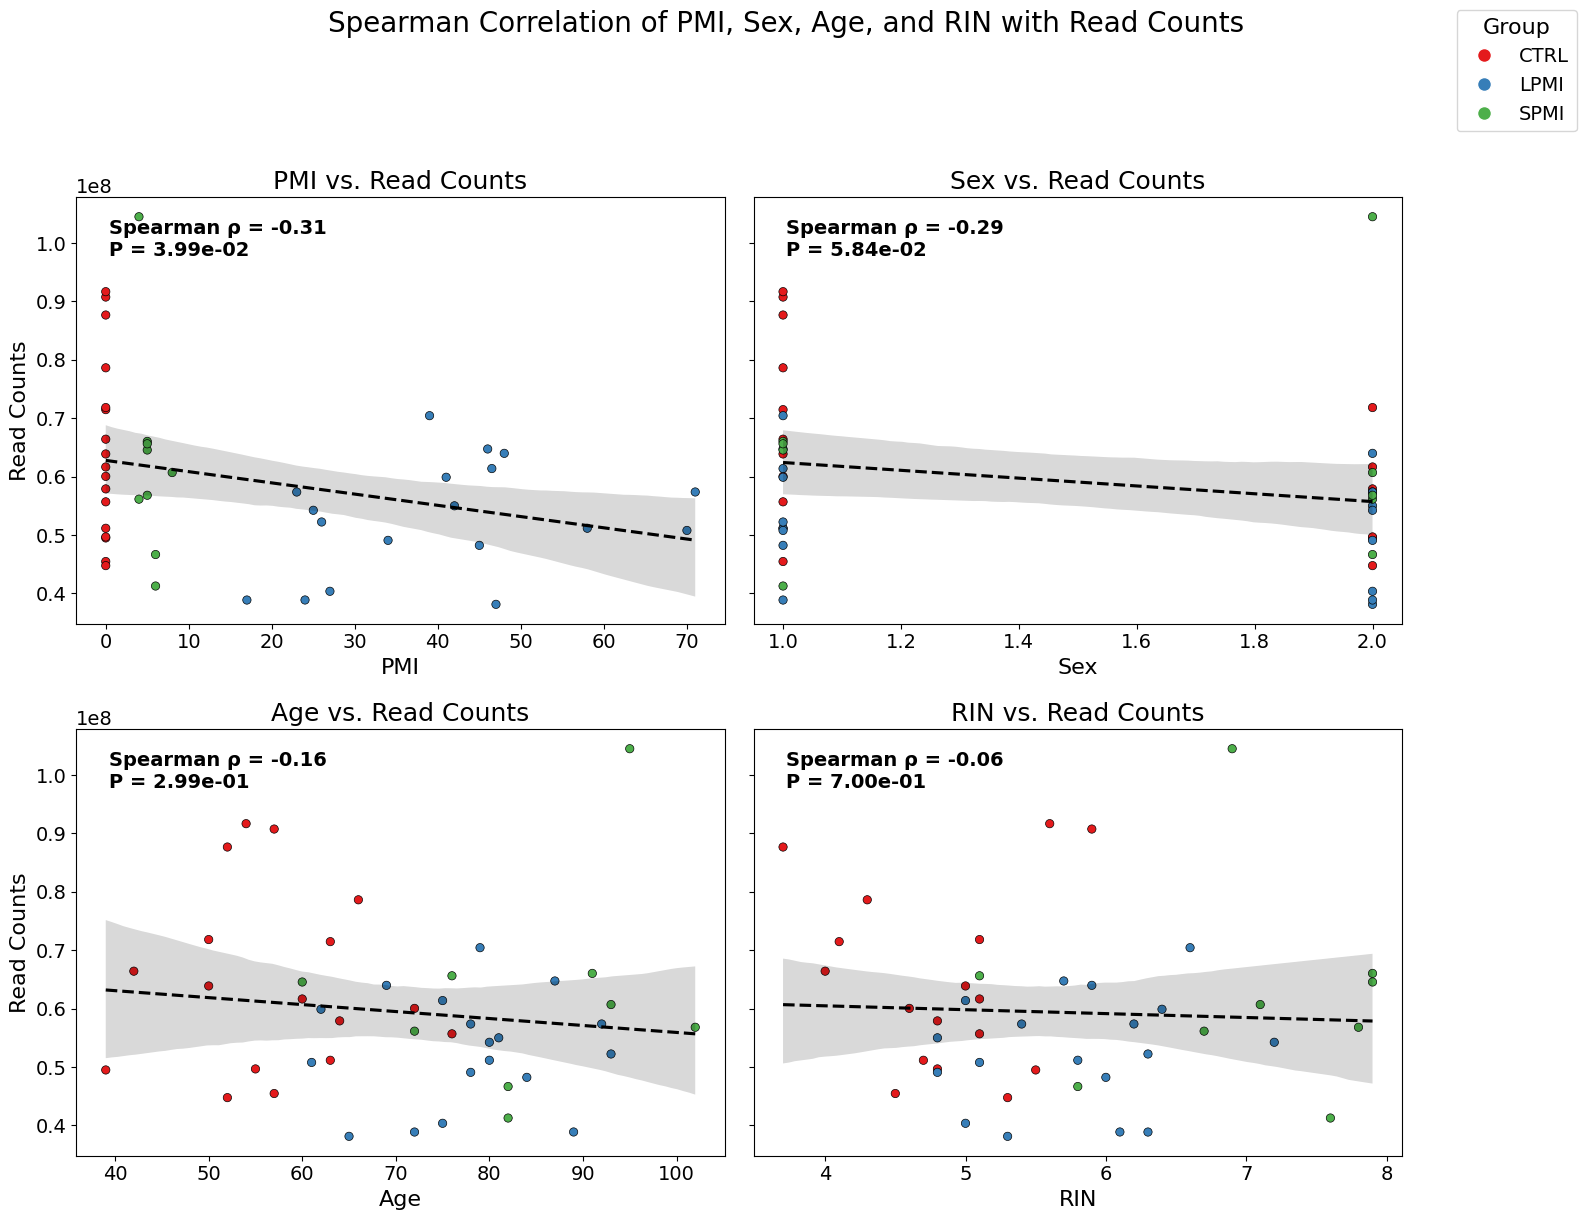

In [8]:
# ============================================================
# Spearman Correlation Analysis for Read Counts vs. PMI, Sex, Age, RIN
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
import os
import matplotlib.lines as mlines

# ----------------------------
# Increase font sizes globally
# ----------------------------
plt.rcParams.update({
    'font.size': 16,
    'axes.titlesize': 18,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'figure.titlesize': 20
})

# ----------------------------
# Step 1: Load Data
# ----------------------------
file_path = r'C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/correlations/LPMI_SPMI_control_PMI_Age_RIN_Sex_vs_reads_correlation.xlsx'

output_dir = r"C:/Users/labuser/Downloads/Moein/UK DRI/new_aligned_samples/Sanity_check/Writing/Response to Nat Comm reviewers Dec 2024/Final_resubmission_files_Roun2_Sep_Oct_2025"
output_file = os.path.join(output_dir, "New_Supplementary_Figure_1.png")

# Load dataset
data = pd.read_excel(file_path)
data.columns = data.columns.str.strip()  # remove whitespace

# Rename if needed
if data.columns[0] == 'Unnamed: 0':
    data.rename(columns={'Unnamed: 0': 'Samples'}, inplace=True)

# Ensure expected columns
expected_columns = ["Samples", "Read Counts", "PMI", "Sex", "Age", "RIN", "Group"]
for col in expected_columns:
    if col not in data.columns:
        raise KeyError(f"Missing expected column: {col}")

# Convert numerics
numeric_columns = ["Read Counts", "PMI", "Age", "RIN"]
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Encode Sex as numeric if needed
data["Sex"] = data["Sex"].map({"Male": 1, "Female": 2})

# ----------------------------
# Step 2: Define variables
# ----------------------------
variables = ["PMI", "Sex", "Age", "RIN"]

# ----------------------------
# Step 3: Compute Spearman Correlations and Plot
# ----------------------------
fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharey=True)

for i, variable in enumerate(variables):
    row, col = divmod(i, 2)
    ax = axes[row, col]

    x_values = data[variable]
    y_values = data["Read Counts"]

    # Filter valid values
    valid = x_values.notna() & y_values.notna()
    corr, p_val = spearmanr(x_values[valid], y_values[valid])

    # Scatterplot with regression line
    sns.scatterplot(ax=ax, x=x_values, y=y_values, hue=data["Group"],
                    palette="Set1", edgecolor="black", legend=False)
    sns.regplot(ax=ax, x=x_values, y=y_values, scatter=False, color="black", line_kws={'linestyle': 'dashed'})

    ax.set_title(f"{variable} vs. Read Counts")
    ax.set_xlabel(variable)
    if col == 0:
        ax.set_ylabel("Read Counts")
    else:
        ax.set_ylabel("")

    # Annotate with Spearman rho and p-value
    ax.text(0.05, 0.95, f"Spearman ρ = {corr:.2f}\nP = {p_val:.2e}",
            transform=ax.transAxes, verticalalignment="top", fontsize=14, fontweight="bold")

# ----------------------------
# Step 4: Add Common Legend
# ----------------------------
unique_groups = sorted(data["Group"].unique())
palette = sns.color_palette("Set1", n_colors=len(unique_groups))
handles = [mlines.Line2D([], [], marker='o', color='w', markerfacecolor=palette[i],
                         markersize=10, label=unique_groups[i]) for i in range(len(unique_groups))]

fig.legend(handles=handles, loc="upper right", title="Group", title_fontsize=16)

plt.suptitle("Spearman Correlation of PMI, Sex, Age, and RIN with Read Counts", y=1.02)

plt.tight_layout(rect=[0, 0, 0.9, 0.95])

# Save figure
plt.savefig(output_file, dpi=300, bbox_inches="tight")
print(f"Plot saved to: {output_file}")

plt.show()
